## 국세청 통계 데이터를 이용한 코로나 발생이후 100대 생활업종 변화
- [CheetSheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png)
- [Codetorial](https://codetorial.net/matplotlib/index.html)
- [파이썬으로 데이터시각화 하기](https://wikidocs.net/book/5011)
### 0. 데이터셋 설명(100대 생활업종 명세)
* [원본 데이터셋](https://stats.nts.go.kr/month/month.asp?type=notice&page=1)
        - 원본 데이터 셋은 위와 같음
            * 원본 데이터의 경우, 행은 업종(100+1)X(도,시)X(시,군,구)으로 구성되었고, 열은 그 중 사업자 수 를 포함하고 있음
            * 원본 데이터는 [그림0]과 같은 파일이 2년치, 즉 24개 존재
            * 처리하기 위한 엑셀 파일이 아닌 공무원들의 업무를 위한 엑셀파일이므로, 정형화되어있지 않았음
            * 또한 Column으로 사용할 업종에서, 같은 업종이 서로 다르게 저장된 5개 경우가 있어 처리에 힘이 들었음
![그림0](https://github.com/inhoinno/2021_BigData/blob/master/figures/0.origin.jpg?raw=true)

<br>
<br>
<br>        

        - 이전 원본 데이터를 Pandas 주피터 노트북 자동화를 이용하여 전처리한 모습
            * 원본 데이터를 전처리하고 (년도, 월별, 시도별) Mutliindex를 구성한 모습임
            * 각 원본데이터당 한개의 처리 데이터가 나오므로, 24개의 데이터를 생성함
![그림0. processed](https://github.com/inhoinno/2021_BigData/blob/master/figures/0.jpg?raw=true)

<br>
<br>
<br>     

        - [그림0. processed]과 같은 24개의 파일을 Pandas 주피터 노트북 자동화를 이용하여 전처리한 모습  
        - 24개의 사전처리된 데이터를 (년도, 월, 도시) X (합계를 포함한 101개 업종)으로 구성함
        - 결과적으로 19-20년 전국 시도별 100개 업종에 대한 한 개의 BigTable를 구성함
![그림0.1 bigtable](https://github.com/inhoinno/2021_BigData/blob/master/figures/0.bigtable.jpg?raw=true)
<br> 
            
* [최종 데이터 셋(github)](https://github.com/inhoinno/2021_BigData/blob/master/COVID_BigTable.csv)
    ![최종데이터 셋](https://github.com/inhoinno/2021_BigData/blob/master/figures/0.COVIDBigTable.jpg?raw=true)
    - 행: year,month,city로 구성된 433개 행
    - 열: 업종 전체를 포함한 101개 업종
    - 깃허브 : [github.com/inhoinno/2021_BigData](https://github.com/inhoinno/2021_BigData)
## 1. 지역별 사업자 현황
- 원그래프 Pie chart

[그림1.1 19-20 지역별 사업자 현황]![그림1.1](https://github.com/inhoinno/2021_BigData/blob/master/figures/1.png?raw=true)
    * [그림1.1]은 전체 지역별 사업자 현황을 보이고 있음. 사업자 현황 수는 지역별 인구수에 밀접한 연관관계를 가지는 것을 확인 할 수 있음
    * 대부분의 사업자(43.0%)가 수도권(서울 경기지역)에 있음을 알 수 있음
    * [그림1.2]는 19-20년 12월 기준 사업자 수 Top5개 지역의 수와 변화를 보여줌
    * 경기도가 가장 많고, 서울시가 그 뒤를 이었으며, 그 뒤로 부산, 경상남도, 경상북도 순이었음.
    * 1년대비 사업자 현황은 증가하였음
    
[그림1.2 19년 12월 기준 지역별 사업자 현황]![그림1.2](https://github.com/inhoinno/2021_BigData/blob/master/figures/1.1.png?raw=true)
[그림1.3 19-20 주요 지역별 사업자 현황]![그림1.3](https://github.com/inhoinno/2021_BigData/blob/master/figures/1.2.3.png?raw=true)
    * [그림1.3]은 [그림1.2]의 다른 버전으로, 파란색으로 증가한 부분이 2020년 12월의 사업자 증감 값임
    * 5개 지역 모두 전년도 대비 증가하였음
    
[그림1.4 19-20 주요 지역별 사업자 증감비교]![그림1.4](https://github.com/inhoinno/2021_BigData/blob/master/figures/1.2.png?raw=true)

## 2. 업종별 사업자 현황
[그림2.1 19-20 업종별 사업자 비교]![그림2.1](https://github.com/inhoinno/2021_BigData/blob/master/figures/2.png?raw=true)
    
    * 2019-20년 12월 평균 100개 업종 수를 보였음
    * Y축은 100개 업종중 10분위에 해당하는 업종을 보인것으로, 한식 전문점이 가장많은 수를 보였음
    * 그래프가 보인 모습은 지프의 법칙을 준수하는 Zipfian패턴으로 보임
    * 지프의 법칙(=파레토 법칙과 유사)은 자연에 나타나는 말들의 사용빈도를 보았을 때, 가장 많이 사용되는 단어가 그 다음으로 사용되는 단어의 약 2배, 그 다음은 약 3배인 특징을 말함
![지프의 법칙](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Zipf_distribution_CMF.png/405px-Zipf_distribution_CMF.png)

<br>
[그림2.2 19,20년 12월 Top 20 사업자 비교]![그림2.2](https://github.com/inhoinno/2021_BigData/blob/master/figures/2.1.1.png?raw=true)
    
    * [그림2.2]는 [그림2.1]중 Top20개 업종을 19년 12월, 20년 12월로 나누어 본 모습이다.
    * 19년에서 20년으로 갈 때, 통신 판매업(2번째)가 상당히 는 것을 확인할 수 있고, 이는 뒤에 한번 더 볼 예정이다
    
    
## 3. 지역별 주요 업종 비교
[그림3.1 19년 12월 지역별 Top20 업종 사업자 비교]![그림3.1](https://github.com/inhoinno/2021_BigData/blob/master/figures/3.png?raw=true)

    * [그림3.1] 2019년 12월 기준 Top20개 업종에 대한 지역별 비교이다
    * 한식전문점, 통신판매업의 경우 전체 지역 사업자 수 중 30%가량 차지하고 있는 것을 볼 수 있다.
    * 개인적으로 한가지 더 하고 싶었던 것이, 뒤에 후술하겠지만, 가장 아래 오는 업종이 그 도시에 가장 많은 업종으로 그리고 싶었는데, 그 부분은 해결하지 못했다

[그림3.3 19-20년 12월 경기-서울 지역 Top2 업종 사업자 비교]![그림3.3](https://github.com/inhoinno/2021_BigData/blob/master/figures/3.2.png?raw=true)
    
    * 경기도-서울 Top2업종에 대한 비교이다.
    * 경기도의 경우 통신 판매업이 2020년 한식 전문점을 추월하였고, 서울 특별시는 19년도의 차이를 더 벌린 것을 볼 수 있다.
    * 수도권의 경우, 가장 많은 업종은 한식전문점이 아닌 통신판매업으로 나타났다(전국 기준 한식 전문점) 
    * 통신판매업의 경우, 2020년 7월부터 군 장병 휴대전화 사용으로 업종 증가에 영향이 있을 것으로 추측된다. 만약 코로나가 통신판매업 사업자 수 증가에 영향이 있는, 인과관계가 성립한다
    
## 4. 코로나 전후의 사업자수 변화
[그림4. 19-20 전체 사업자수 동향]![그림4](https://github.com/inhoinno/2021_BigData/blob/master/figures/4.png?raw=true)3

    * 2019년 1월 부터 2020년 12월 까지 사업자 수 변화 추이를 보면, 2019년 11월-12월을 제외하고 전체 사업자 수는 증가하는 추세를 보였다.
    * 코로나가 전세계로 퍼진 11월,12월과 국내 확진자 발생이 있었던 2020년 2월의 경우 그 추세가 잠시 주춤했던 것을 확인할 수 있었다.
    * 경기도의 경우 통신 판매업이 2020년 한식 전문점을 추월하였고, 서울 특별시는 19년도의 차이를 더 벌린 것을 볼 수 있다.
    * 수도권의 경우, 가장 많은 업종은 한식전문점이 아닌 통신판매업으로 나타났다(전국 기준 한식 전문점) 
    

## 5. 코로나 이후 감소한 업종
[그림5.1 20년 감소한 25개 업종 사업자수 동향]![그림5.1](https://github.com/inhoinno/2021_BigData/blob/master/figures/5..png?raw=true)
    
    * [그림5.1]은 코로나이후 감소한 업종이다. 
    * 코로나 이후 뚜렷하게 감소한 업종은 호프전문점과 간이주점이었다. 
    * 또한 여행사도 감소추세를 보였다. 
    * 코로나로 인해 전체 사업자 수는 큰 영향을 받지 않은것으로 나타났지만, 코로나로 인해 몇 업종에서 뚜렷한 사업자 감소세를 보였다.
 
[그림5.2  20년 감소한 호프집, 주점 사업자수 동향]![그림5.2](https://github.com/inhoinno/2021_BigData/blob/master/figures/5.1.png?raw=true)
[그림5.1 20년 감소한 25개 업종 사업자수 동향]![그림5.1](https://github.com/inhoinno/2021_BigData/blob/master/figures/5..png?raw=true)


## 6. 코로나 이후 증가한 업종
[그림6.1 20년 1000개 이상 증가한 15개 업종 사업자수 동향]![그림6.1](https://github.com/inhoinno/2021_BigData/blob/master/figures/6.png?raw=true)
[그림6.2 20년 증가한 Top4 업종 사업자수 동향]![그림6.2](https://github.com/inhoinno/2021_BigData/blob/master/figures/6.1.png?raw=true)
[그림6.3 20년 1000개 이상 증가한 15개 업종 사업자수 동향(Violin plot)]![그림6.3](https://github.com/inhoinno/2021_BigData/blob/master/figures/6.2.png?raw=true)


## 7. 결론 : 코로나 1년이 자영업자에게 준 영향은 어떠한가?
코로나가 분명 자영업자에게 지대한 영향을 주었으나, 전체 사업자수 동향은 크게 연관이 없었고, 오히려 증가하는 결과를 보임 
증가하는 업종중 그 규모가 큰(2020년 1월 대비 1000개 이상 증가) 뚜렷한 증가 추세를 보인 15개 업종은 다음과 같음:

감소했거나, 년 초 보다 변동이 크지 않은 25개 업종은 다음과 같음:


코로나이후 증가한 업종은 분명 존재함. 코로나 사태가 특정 업종에게는 기회가 될 수 있으나, 반대로 다른 업종에서는 그렇지 않을 수 있음. 
허나 시대의 흐름에 따라 증가하는 업종과 감소하는 업종이 있기 때문에  짧게는 5년에서 길게는 10년간 업종 변화를 본 결과와 비교하여 분석하는 것이 타당함. 


현재 조사된 데이터는 코로나 이후 업종별 동향을 파악할 수 있고, 코로나와 100대업종에 대한 상관관계를 파악할 수 있으나, 특정업종 증감이라는 결과가 코로나에 요인한다는 명확한 인과관계를 밝히기 어려움.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import sys
import io
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [34]:
%ls

 C 드라이브의 볼륨: SSD
 볼륨 일련 번호: BCA4-98AF

 C:\Users\inhoinno\Desktop\Ordered Softeware\2021 봄\빅데이터처리_신현석\HW_BIG 디렉터리

2021-06-04  오전 03:40    <DIR>          .
2021-06-04  오전 03:40    <DIR>          ..
2021-06-03  오전 01:58    <DIR>          .ipynb_checkpoints
2021-05-31  오후 08:41         7,362,645 1920_origin.zip
2021-06-02  오후 11:05    <DIR>          1920_preprocessed
2021-05-31  오후 08:40           378,221 1920_preprocessed.zip
2021-06-02  오후 11:15    <DIR>          1920_processed
2021-06-02  오후 08:48            74,295 2020_1_total.csv
2021-06-03  오후 09:50    <DIR>          copy
2021-06-03  오전 01:49         1,864,515 COVID_BigTable(stack).csv
2021-06-03  오전 01:49           195,556 COVID_BigTable.csv
2021-06-02  오후 08:59         2,555,166 Data_-Idxing.ipynb
2021-06-03  오후 09:50             9,997 Data_preprocessing_Auto.ipynb
2021-06-02  오후 08:50            58,221 Data_preprocessing1.ipynb
2021-05-31  오후 06:43            92,753 Data_preprocessing1-M45.ipynb
2021-06-02  오후 08:23    <DIR>    

In [316]:
#data load
data = pd.read_csv('./COVID_BigTable.csv', encoding='utf-8').set_index(['year','month','city'])
data.index.names=['year','month','city']
data = data.sort_index()

In [317]:
data

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점   간이주점  간판광고물업  \
year month city                                                             
2019 1     강원도        82677   300     93      465      444    439     505   
           경기도       520472  1873    372     3694     1810   2997    3113   
           경상남도      152758   564    151      790      727   1314     685   
           경상북도      125481   461    163      489      693    409     641   
           광주광역시      67965   214     41      393      339    188     443   
...                     ...   ...    ...      ...      ...    ...     ...   
2020 12    전라북도       88047   411    111      573      530    272     511   
           제주특별자치도    47390   191     34      194      250    156     197   
           충청남도      106102   299    130      705      532    544     479   
           충청북도       80408   275     74      495      412    391     383   
           합계       2548586  7650   1611    16962    10186  12219   12996   

                    감정평가사  건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업  \
year month city                             ...                             
2019 1     강원도         29       496    667  ...   1589          58    951   
           경기도        358      2496    797  ...   9558         793   7548   
           경상남도        56       988    723  ...   2804         165   2399   
           경상북도        19       886    658  ...   1808          98   1390   
           광주광역시       32       397    167  ...   1010         126   1406   
...                   ...       ...    ...  ...    ...         ...    ...   
2020 12    전라북도        39       734    360  ...   1335          97   1405   
           제주특별자치도     16       180    110  ...   1200          44    794   
           충청남도        38      1272    635  ...   2383          99   1487   
           충청북도        32       435    108  ...   1615          81   1256   
           합계        1234     13988   7381  ...  44858        4071  42168   

                     피시방  한방병원ㆍ한의원   한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month city                                                        
2019 1     강원도       420       357   19271   205   1485   1070    588  
           경기도      2413      3155   77957  1680   7127   7771   3901  
           경상남도      678       807   31752   386   1539   2434   1292  
           경상북도      593       635   29086   343   1068   1871   1086  
           광주광역시     426       416    9558   216   2406   1118    588  
...                  ...       ...     ...   ...    ...    ...    ...  
2020 12    전라북도      391       541   14620   244   1124   1474    722  
           제주특별자치도   168       199    9068   136    605    664    244  
           충청남도      452       517   20013   292   1391   1356    886  
           충청북도      359       406   15764   276   1533    985    551  
           합계       9970     14947  397465  8569  29002  35004  18737  

[432 rows x 101 columns]

In [37]:
df = pd.DataFrame(data.stack(), columns=['store'])

In [38]:
df

store
year month city                
2019 1     강원도  B. 업종전체   82677
                가구점         300
                가스충전소        93
                가전제품수리점     465
                가전제품판매점     444
...                         ...
2020 12    합계   한식전문점    397465
                헬스클럽       8569
                호프전문점     29002
                화장품가게     35004
                휴대폰가게     18737

[43632 rows x 1 columns]

---
## 1. 지역별 사업자 현황
* 지역 : 강원도, 경기도, ... 서울특별시, ..., 충청북도, 합계 
    - Pie Chart
    - Chart
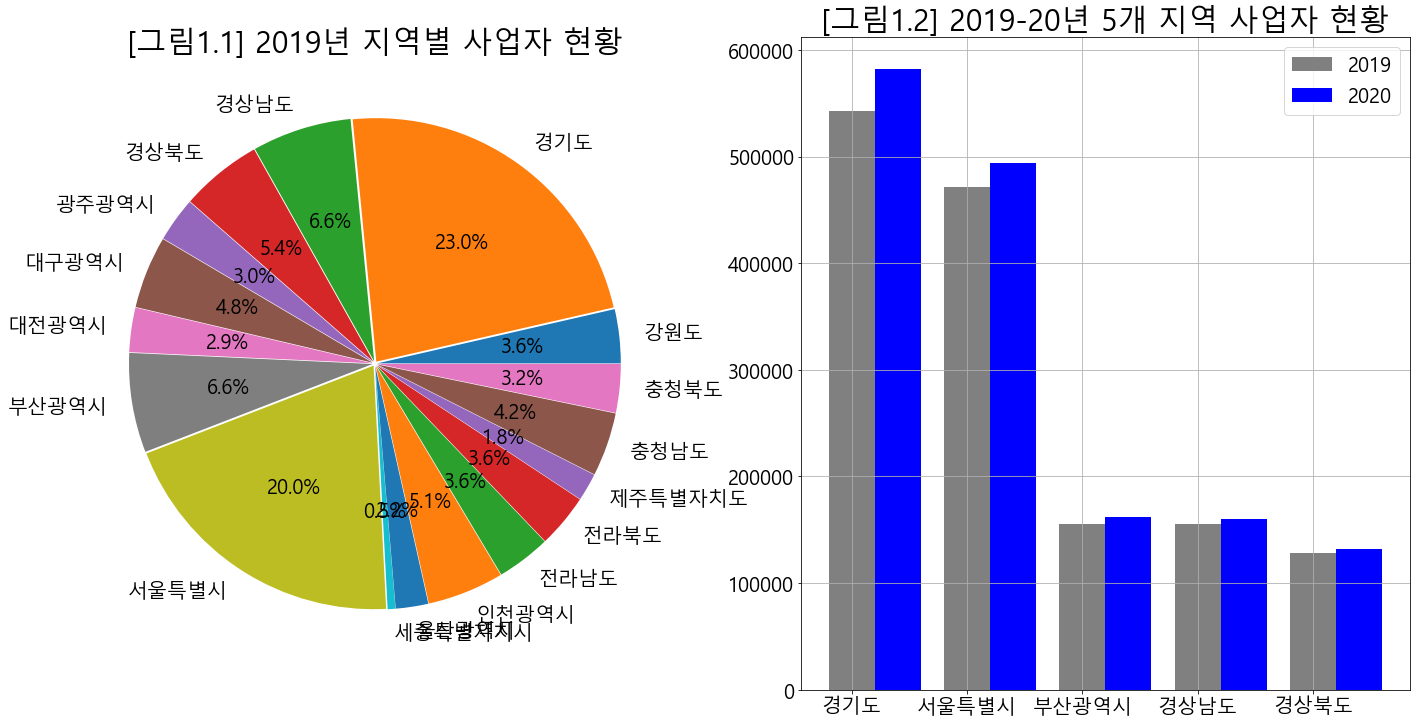

In [39]:
df_19 = data.loc[(slice(2019), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
df_20 = data.loc[(slice(2020,2020), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
df_19 = df_19.sort_index()
df_20 = df_20.sort_index()

In [40]:
idx = pd.IndexSlice

In [41]:
df_19 = df_19.sort_index()

In [42]:
df_19.index

MultiIndex([(2019,     '강원도'),
            (2019,     '경기도'),
            (2019,    '경상남도'),
            (2019,    '경상북도'),
            (2019,   '광주광역시'),
            (2019,   '대구광역시'),
            (2019,   '대전광역시'),
            (2019,   '부산광역시'),
            (2019,   '서울특별시'),
            (2019, '세종특별자치시'),
            (2019,   '울산광역시'),
            (2019,   '인천광역시'),
            (2019,    '전라남도'),
            (2019,    '전라북도'),
            (2019, '제주특별자치도'),
            (2019,    '충청남도'),
            (2019,    '충청북도'),
            (2019,      '합계')],
           names=['year', 'city'])

In [43]:
df_20.index

MultiIndex([(2020,     '강원도'),
            (2020,     '경기도'),
            (2020,    '경상남도'),
            (2020,    '경상북도'),
            (2020,   '광주광역시'),
            (2020,   '대구광역시'),
            (2020,   '대전광역시'),
            (2020,   '부산광역시'),
            (2020,   '서울특별시'),
            (2020, '세종특별자치시'),
            (2020,   '울산광역시'),
            (2020,   '인천광역시'),
            (2020,    '전라남도'),
            (2020,    '전라북도'),
            (2020, '제주특별자치도'),
            (2020,    '충청남도'),
            (2020,    '충청북도'),
            (2020,      '합계')],
           names=['year', 'city'])

In [44]:
df_19.index = df_19.index.droplevel()
df_19.columns = df_19.columns.droplevel()
df_20.index =df_20.index.droplevel()
df_20.columns = df_20.columns.droplevel()


In [45]:
df_19 = df_19.iloc[:-1]
df_20 = df_20.iloc[:-1]

In [46]:
#plt.rcParams.keys()

In [47]:
df_20

month        1       2       3       4       5       6       7       8   \
city                                                                      
강원도       85671   85777   85671   86288   86702   87269   87834   88082   
경기도      558878  561970  564220  568995  573325  579208  584928  589504   
경상남도     157493  157833  157677  158304  159124  160082  160861  161520   
경상북도     129486  129615  129542  130110  130822  131699  132196  132711   
광주광역시     70997   71137   71367   71610   71892   72330   72610   72783   
대구광역시    115230  115508  115633  116345  117073  117929  118589  119004   
대전광역시     70759   70893   70954   71282   71531   72008   72376   72543   
부산광역시    158114  158451  158710  159961  160868  161958  162888  163666   
서울특별시    480266  482174  481508  484468  487912  492161  496455  498716   
세종특별자치시   12889   13000   13108   13236   13340   13479   13667   13805   
울산광역시     51626   51785   51744   51957   52194   52559   52854   52965   
인천광역시    122585  123069  123300  124167  124990  125964  127035  128028   
전라남도      85418   85569   85631   86112   86527   87123   87635   87971   
전라북도      85075   85151   85296   85678   86014   86474   86864   87170   
제주특별자치도   44580   44741   44880   45076   45328   45713   46092   46337   
충청남도     101352  101725  101737  102336  102838  103432  104077  104524   
충청북도      77237   77311   77371   77770   78056   78588   79018   79270   

month        9       10      11      12  
city                                     
강원도       88513   88777   89078   89174  
경기도      595288  600608  605277  607611  
경상남도     162405  163113  163758  164113  
경상북도     133292  133861  134378  134420  
광주광역시     73292   73601   73822   73840  
대구광역시    119650  120146  120632  120587  
대전광역시     72927   73245   73569   73542  
부산광역시    164602  165454  166158  166264  
서울특별시    501875  504873  507899  508188  
세종특별자치시   13961   14113   14290   14380  
울산광역시     53212   53445   53671   53737  
인천광역시    129209  130124  131051  131544  
전라남도      88427   88843   89212   89239  
전라북도      87672   87841   88077   88047  
제주특별자치도   46606   46938   47202   47390  
충청남도     105065  105462  105936  106102  
충청북도      79819   80182   80495   80408

Text(0.5, 1.0, '2019년 지역별 사업자 현황')

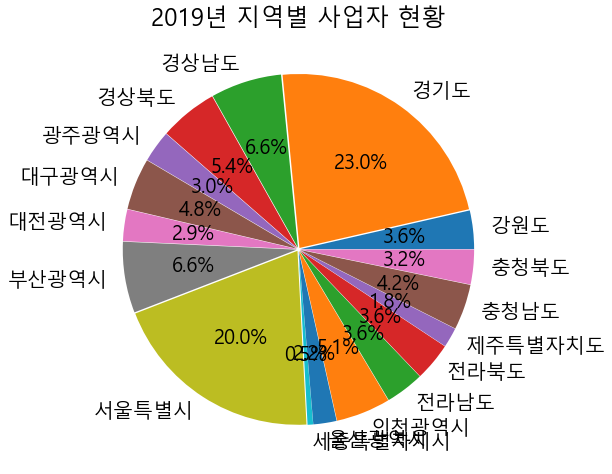

In [48]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df_19.index 
plt.pie(df_19.mean(axis =1), labels = labels, autopct='%.1f%%',  explode= [0.01]*len(labels))
plt.title("2019년 지역별 사업자 현황")

In [49]:
df = pd.DataFrame(df_19.mean(axis =1), index = df_19.index,columns=['val']).sort_values(by='val', ascending=False).head(5)
df2 = pd.DataFrame(df_20.mean(axis =1), index = df_20.index,columns=['val']).sort_values(by='val', ascending=False).head(5)

In [50]:
df['val'].values

array([542413.91666667, 471121.58333333, 155873.75      , 155717.58333333,
       127949.25      ])

In [51]:
df2

val
city                
경기도    582484.333333
서울특별시  493874.583333
부산광역시  162257.833333
경상남도   160523.583333
경상북도   131844.333333

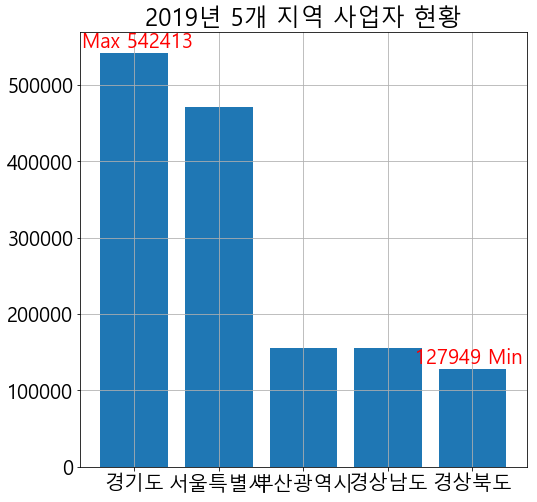

In [65]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df.index 


plt.bar(df.index,df['val'].values, width=0.8)
plt.title("2019년 5개 지역 사업자 현황")
x=df.index.tolist()
y=df.values.flatten().tolist()
dic = { y:x for x, y in zip(x, y) }
plt.text(dic[min(y)],min(y),
         str(int(min(y))) + ' Min ',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')
plt.text(dic[max(y)],max(y),
         ' Max '+ str(int(max(y))),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')
plt.grid(True)

In [67]:
df2

val
city                
경기도    582484.333333
서울특별시  493874.583333
부산광역시  162257.833333
경상남도   160523.583333
경상북도   131844.333333

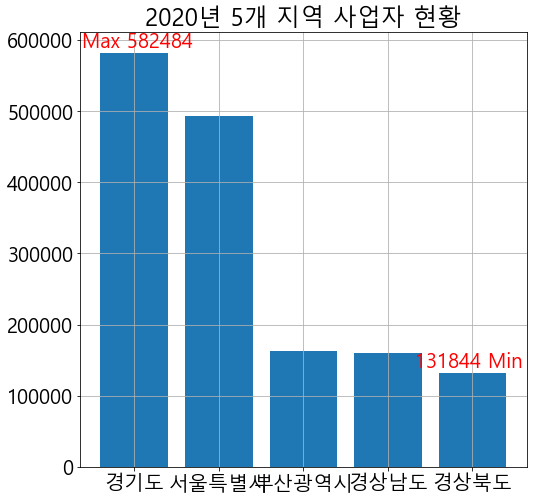

In [69]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df2.index 
plt.bar(df2.index,df2['val'].values, width=0.8)
plt.title("2020년 5개 지역 사업자 현황")
x=df2.index.tolist()
y=df2.values.flatten().tolist()
dic = { y:x for x, y in zip(x, y) }
plt.text(dic[min(y)],min(y),
         str(int(min(y))) + ' Min ',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')
plt.text(dic[max(y)],max(y),
         ' Max '+ str(int(max(y))),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')
plt.grid(True)

Text(경기도, 582484.3333333334, ' Max 582484')

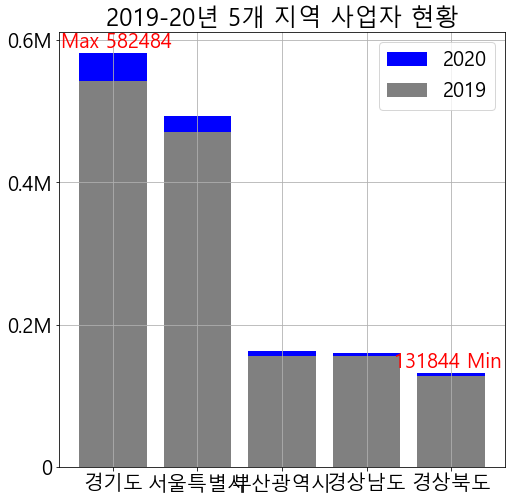

In [71]:
plt.bar(df2.index,df2['val'].values, width=0.8, color='blue', label='2020')
plt.bar(df.index,df['val'].values, width=0.8, color='gray', label='2019')
plt.title("2019-20년 5개 지역 사업자 현황")
plt.legend(loc='best')
plt.grid(True)
plt.yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))
plt.text(dic[min(y)],min(y),
         str(int(min(y))) + ' Min ',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')
plt.text(dic[max(y)],max(y),
         ' Max '+ str(int(max(y))),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')

([<matplotlib.axis.YTick at 0x21068758880>,
 [Text(0, 0, '0'), Text(0, 0, '0.2M'), Text(0, 0, '0.4M'), Text(0, 0, '0.6M')])

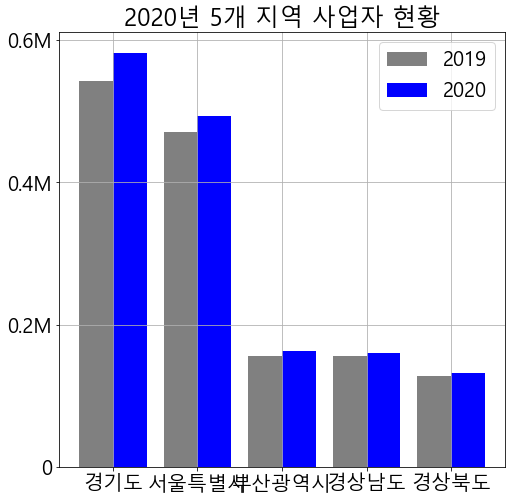

In [74]:
x=np.arange(len(df.index))
w=0.4
plt.bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
plt.bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
plt.title("2020년 5개 지역 사업자 현황")
plt.legend(loc='best')
plt.grid(True)
plt.xticks(x+w/2,df.index)
plt.yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))

Text(0.5, 1.0, '[그림1.2] 2019-20년 5개 지역 사업자 변화')

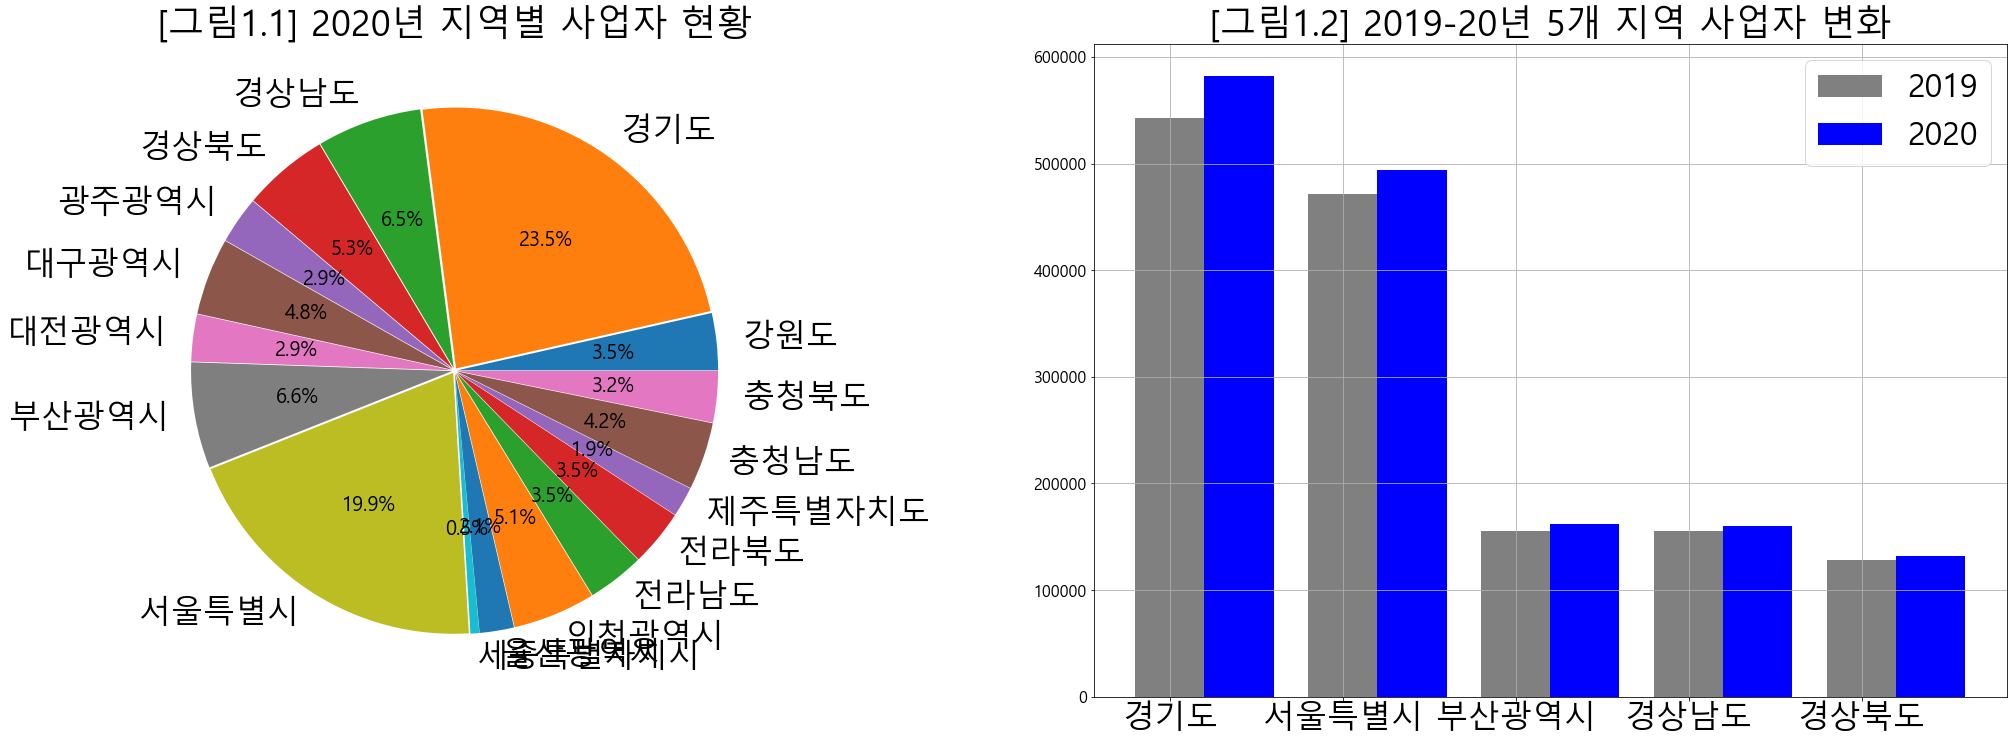

In [108]:
parameters = {'axes.labelsize':36,
          'axes.titlesize': 36,
             'xtick.labelsize':32,
           'ytick.labelsize':16, 
             'legend.fontsize':32}
plt.rcParams.update(parameters)


x=np.arange(len(df.index))
w=0.4
fig , axes = plt.subplots(1,2, figsize=(36,12))
axes[0].pie(df_20.mean(axis =1), labels = df_20.index , autopct='%.1f%%',  explode= [0.01]*len(df_20.index))
axes[0].set_title("[그림1.1] 2020년 지역별 사업자 현황", fontsize=36)
axes[1].bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
axes[1].bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
axes[1].legend(loc='best')
#axes[1].set_yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))
axes[1].grid(True)
axes[1].set_title("[그림1.2] 2019-20년 5개 지역 사업자 변화", fontsize=36)

## 2. 업종별 사업자 현황
* 업종 : 가구점, ... 미용사, 변리사, ...,합계 
    - 2019-20 100개 업종 사업자 현황 
![[그림2.1] 2019-20 업종별 사업자 현황](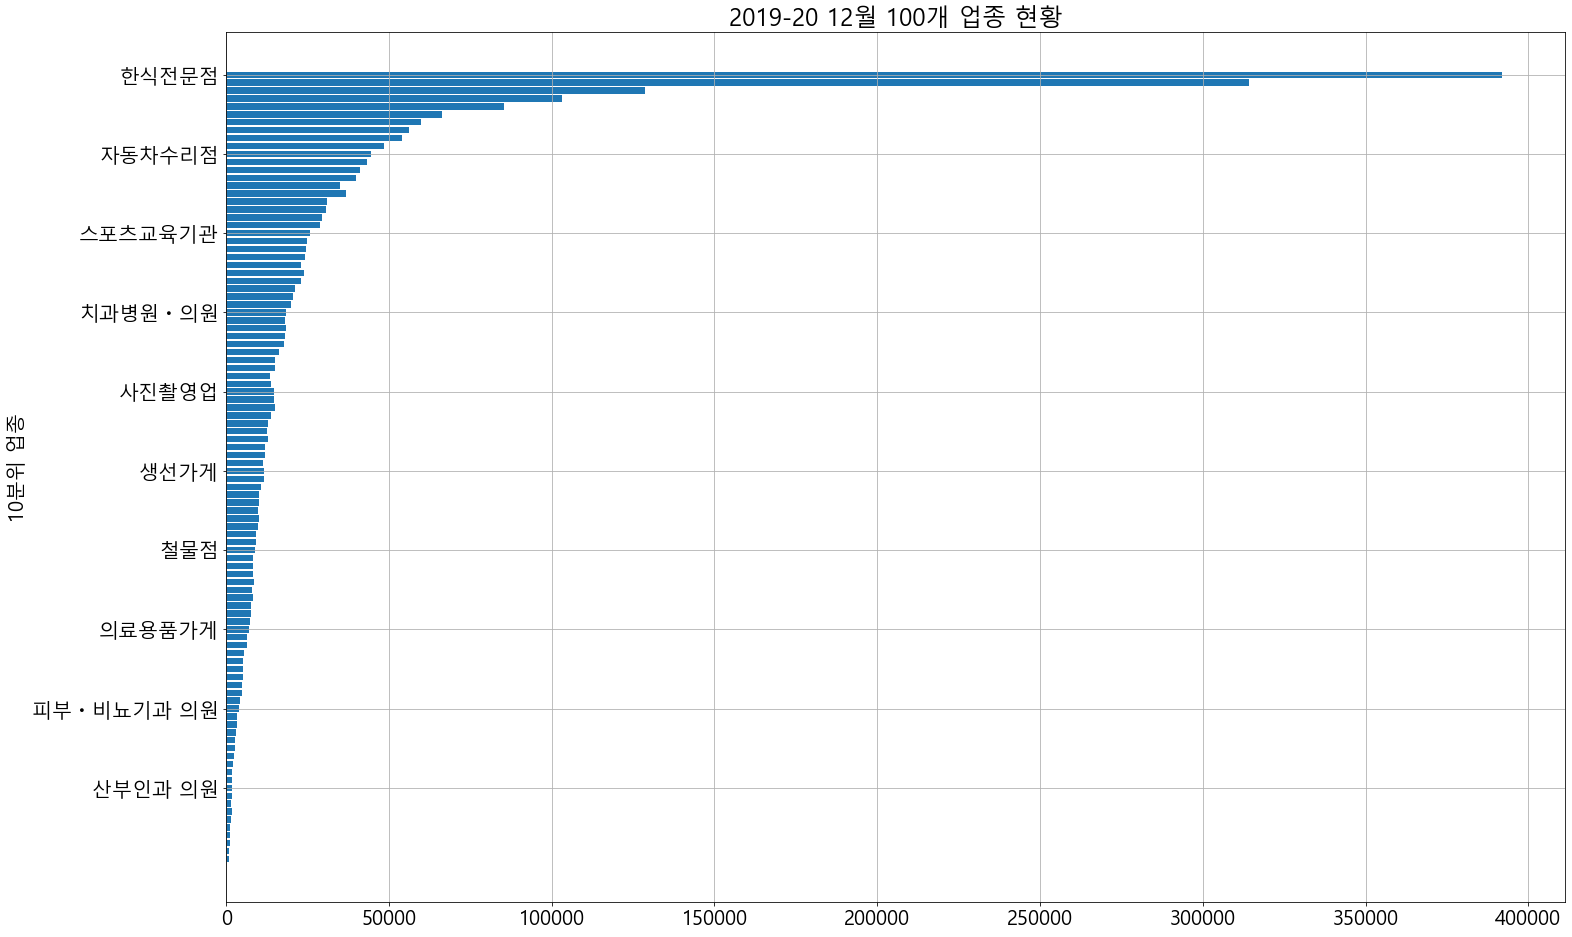) 
    - 1~40위 업종 현황
![[그림2.2] 1위~40위 ](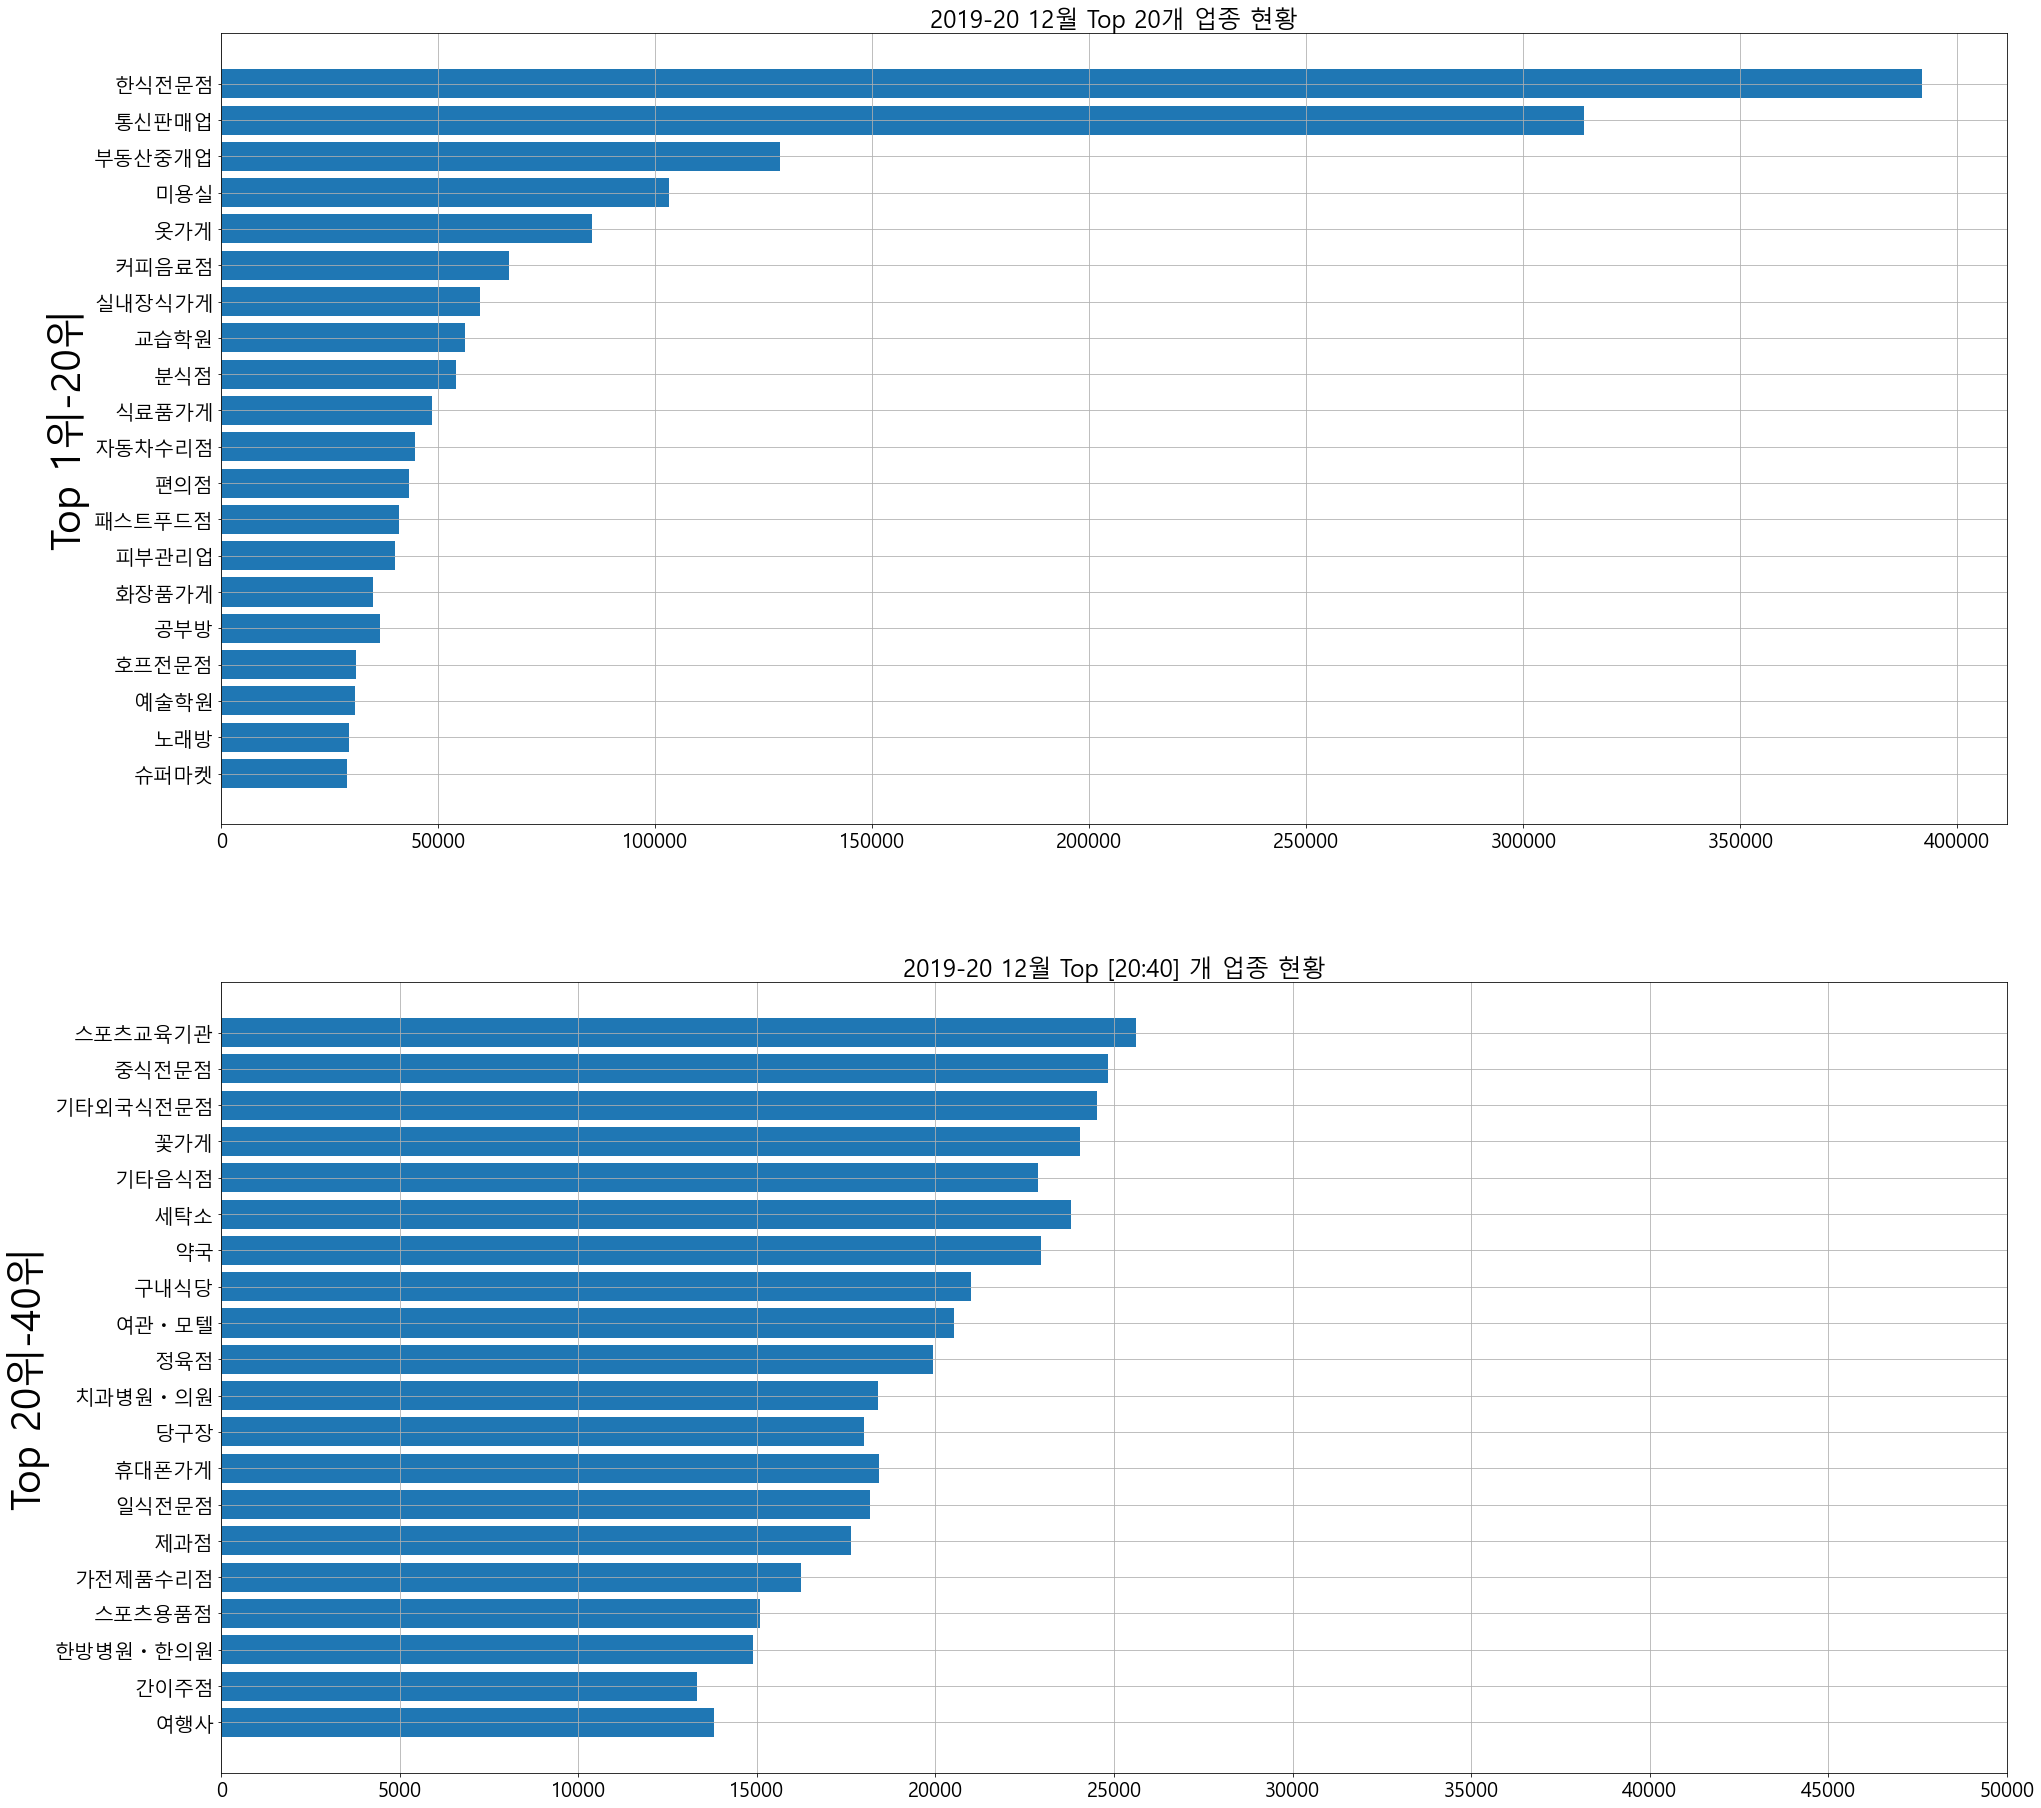%0A)

In [109]:
len(df_19.mean(axis =1))

17

In [110]:
#idx = pd.IndexSlice # 인덱스 객체 생성
#test.loc[idx[:,'강원도'],idx['LPG 충전소':]]

In [111]:
idx=pd.IndexSlice
data.stack().loc[idx[:2019,1,'합계'],:]
#df_19 = data.loc[(slice(2019), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
#df_20 = data.loc[(slice(2020,2020), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]

year  month  city         
2019  1      강원도   B. 업종전체     82677
                   가구점           300
                   가스충전소          93
                   가전제품수리점       465
                   가전제품판매점       444
                               ...  
      12     합계    한식전문점      386161
                   헬스클럽         7718
                   호프전문점       32992
                   화장품가게       34922
                   휴대폰가게       18109
Length: 21816, dtype: int64

In [112]:
data.columns[1:]

Index(['가구점', '가스충전소', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업', '감정평가사',
       '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공부방', '공인노무사', '공인회계사',
       '과일가게', '교습학원', '구내식당', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점',
       '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게', '당구장', '독서실', '동물병원', '목욕탕',
       '문구점', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원',
       '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업',
       '스포츠용품점', '시계ㆍ귀금속점', '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게',
       '실외골프연습장', '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업',
       '피시방', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게', '휴대폰가게'],
      dtyp

In [113]:
df_19 = data.loc[idx[2019,idx[:],'합계'],:][data.columns[1:]]
df_20 = data.loc[idx[2020,idx[:],'합계'],:][data.columns[1:]]

In [114]:
df_19 = pd.DataFrame(df_19.stack())
df_19.rename(columns = {0:"val"},inplace=True)
df_20 = pd.DataFrame(df_20.stack())
df_20.rename(columns = {0:"val"},inplace=True)

In [115]:
df_19.index

MultiIndex([(2019,  1, '합계',        '가구점'),
            (2019,  1, '합계',      '가스충전소'),
            (2019,  1, '합계',    '가전제품수리점'),
            (2019,  1, '합계',    '가전제품판매점'),
            (2019,  1, '합계',       '간이주점'),
            (2019,  1, '합계',     '간판광고물업'),
            (2019,  1, '합계',      '감정평가사'),
            (2019,  1, '합계',   '건강보조식품가게'),
            (2019,  1, '합계',      '건어물가게'),
            (2019,  1, '합계',        '건축사'),
            ...
            (2019, 12, '합계',        '편의점'),
            (2019, 12, '합계', '피부ㆍ비뇨기과 의원'),
            (2019, 12, '합계',      '피부관리업'),
            (2019, 12, '합계',        '피시방'),
            (2019, 12, '합계',   '한방병원ㆍ한의원'),
            (2019, 12, '합계',      '한식전문점'),
            (2019, 12, '합계',       '헬스클럽'),
            (2019, 12, '합계',      '호프전문점'),
            (2019, 12, '합계',      '화장품가게'),
            (2019, 12, '합계',      '휴대폰가게')],
           names=['year', 'month', 'city', None], length=1200)

In [116]:
df_20.columns

Index(['val'], dtype='object')

In [117]:
df_20.loc[idx[2020,12,'합계']]

val
가구점        7650
가스충전소      1611
가전제품수리점   16962
가전제품판매점   10186
간이주점      12219
...         ...
한식전문점    397465
헬스클럽       8569
호프전문점     29002
화장품가게     35004
휴대폰가게     18737

[100 rows x 1 columns]

In [118]:
df = df_19.loc[idx[2019,12,'합계']].sort_values(by='val', ascending =True)
df2= df_20.loc[idx[2020,12,'합계']].sort_values(by='val', ascending =True)

In [119]:
df

val
예식장        890
공인노무사      908
변리사       1029
기술사       1059
감정평가사     1169
...        ...
옷가게      86092
미용실     101771
부동산중개업  125057
통신판매업   271383
한식전문점   386161

[100 rows x 1 columns]

In [120]:
df['val'].values

array([   890,    908,   1029,   1059,   1169,   1480,   1596,   1604,
         1665,   1679,   1748,   1826,   2228,   2528,   2592,   2645,
         3051,   3276,   3410,   3916,   4080,   4778,   4855,   4925,
         4980,   5009,   5495,   6459,   6551,   7103,   7190,   7351,
         7486,   7718,   7830,   7980,   8000,   8152,   8287,   8814,
         9168,   9216,   9649,   9813,   9865,  10019,  10102,  10674,
        11273,  11334,  11406,  11791,  11833,  12523,  12620,  12976,
        13454,  13638,  13868,  14138,  14185,  14413,  14817,  14987,
        15534,  17161,  17955,  18109,  18111,  18256,  19654,  20939,
        21677,  22687,  23310,  23474,  23742,  23778,  24610,  24945,
        29289,  30291,  30846,  32992,  33880,  34922,  37874,  38956,
        41786,  44056,  48680,  53934,  55880,  56837,  61548,  86092,
       101771, 125057, 271383, 386161], dtype=int64)

In [121]:
df.index.values[-20:]

array(['슈퍼마켓', '노래방', '예술학원', '호프전문점', '공부방', '화장품가게', '피부관리업', '패스트푸드점',
       '편의점', '자동차수리점', '식료품가게', '분식점', '교습학원', '실내장식가게', '커피음료점', '옷가게',
       '미용실', '부동산중개업', '통신판매업', '한식전문점'], dtype=object)

In [125]:
df

2019
예식장        890
공인노무사      908
변리사       1029
기술사       1059
감정평가사     1169
...        ...
옷가게      86092
미용실     101771
부동산중개업  125057
통신판매업   271383
한식전문점   386161

[100 rows x 1 columns]

Text(0.5, 1.0, '2020(12월) Top 20개 업종 현황')

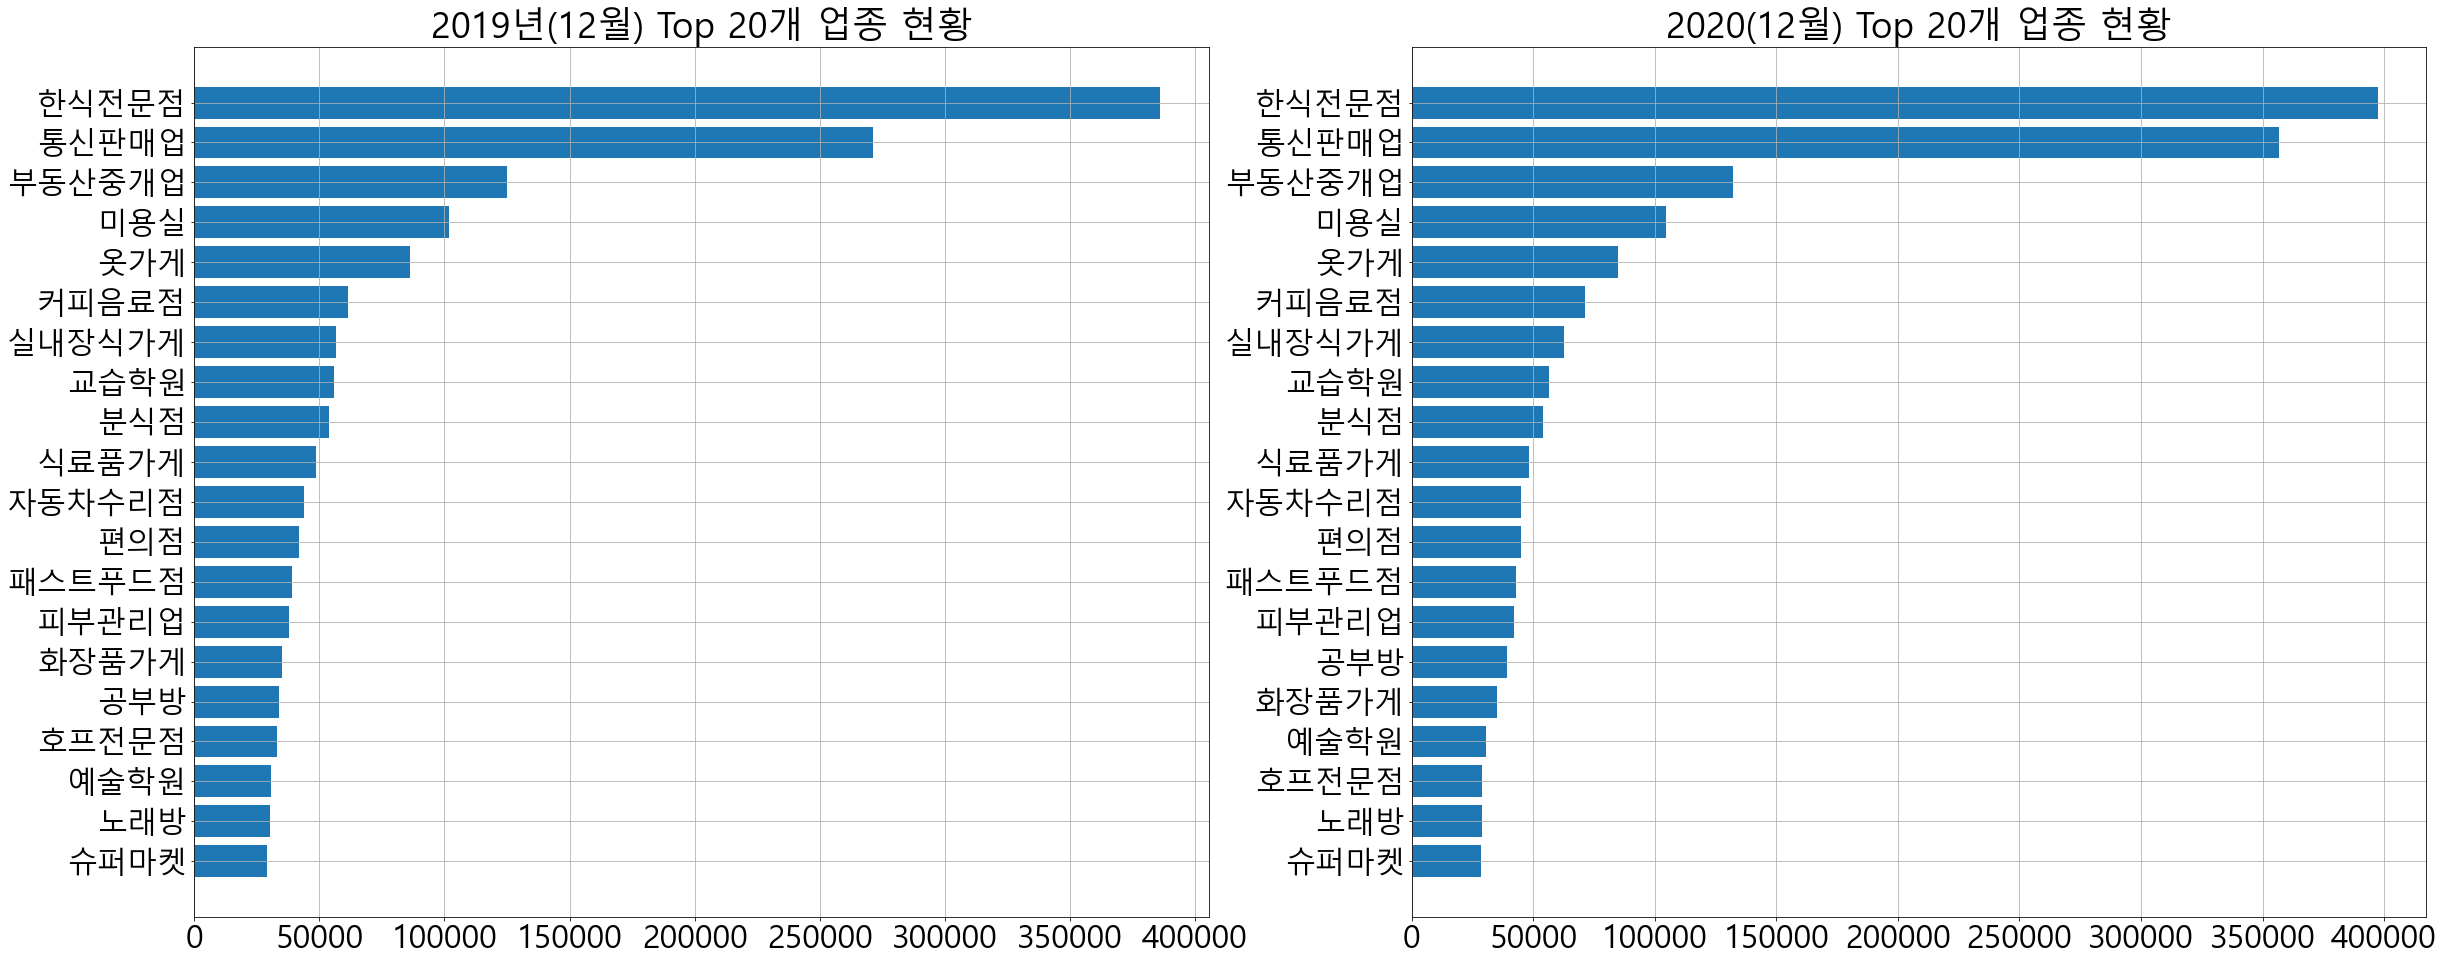

In [134]:
parameters = {'axes.labelsize':36,
          'axes.titlesize': 36,
             'xtick.labelsize':32,
           'ytick.labelsize':30, 
             'legend.fontsize':32}
plt.rcParams.update(parameters)


fig, axes = plt.subplots(1,2, figsize =(40,16))
axes[0].barh(df.index.values[-20:],df[2019].values[-20:])
axes[0].grid(True)
axes[0].set_title("2019년(12월) Top 20개 업종 현황")
axes[1].barh(df2.index.values[-20:],df2[2020].values[-20:])
axes[1].grid(True)
axes[1].set_title("2020(12월) Top 20개 업종 현황")

In [135]:
df.rename(columns={'val':2019}, inplace=True)
df2.rename(columns={'val':2020},inplace=True)
df_total = pd.concat([df,df2], axis=1)
df_total['total'] =df_total.mean(axis=1).astype(int)

In [136]:
tp20col=df_total['total'][-20:].index
tp40col=df_total['total'][-40:-20].index

In [137]:
tp20col

Index(['슈퍼마켓', '노래방', '예술학원', '호프전문점', '공부방', '화장품가게', '피부관리업', '패스트푸드점',
       '편의점', '자동차수리점', '식료품가게', '분식점', '교습학원', '실내장식가게', '커피음료점', '옷가게',
       '미용실', '부동산중개업', '통신판매업', '한식전문점'],
      dtype='object')

Text(0, 0.5, '10분위 업종')

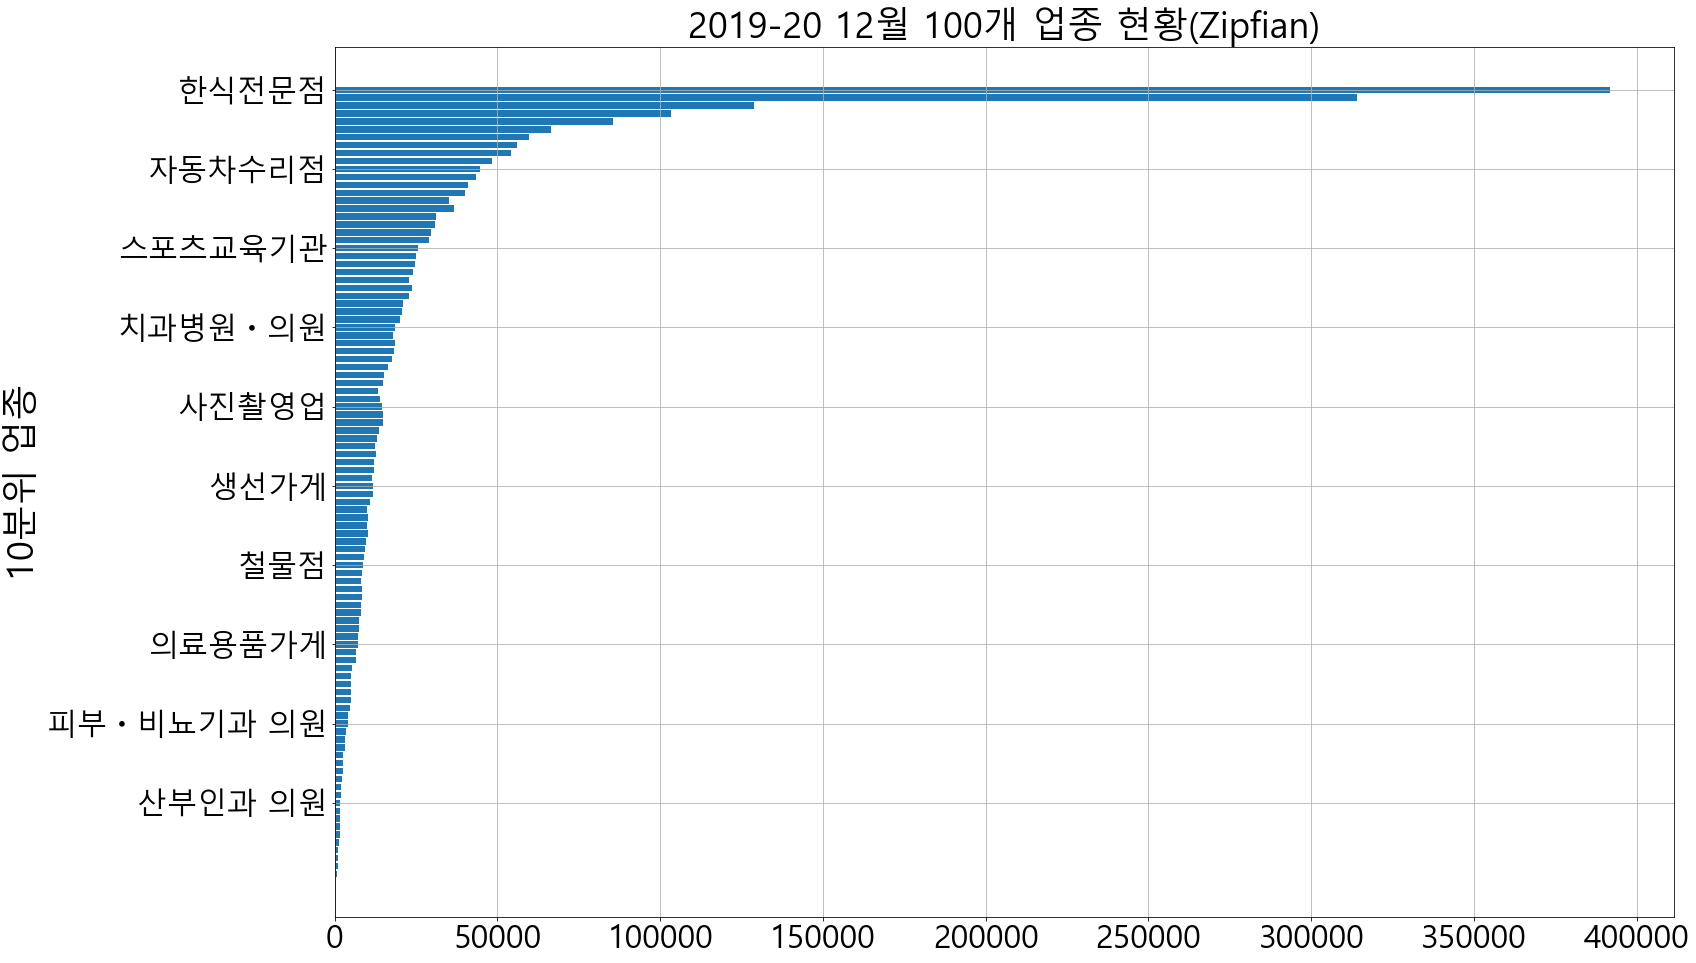

In [140]:
N=10
plt.figure(figsize=(24,16))
plt.rcParams["font.size"] = 20
plt.barh(df_total.index.values, df_total['total'].values)
plt.grid(True)
plt.title("2019-20 12월 100개 업종 현황(Seems Zipfian)")
plt.yticks(df_total.index[list(map(lambda x:x*N+9,range(int(len(df_total.index)/N))))].values)
plt.ylabel('10분위 업종')

Text(0.5, 1.0, '2019-20 12월 Top [20:40] 개 업종 현황')

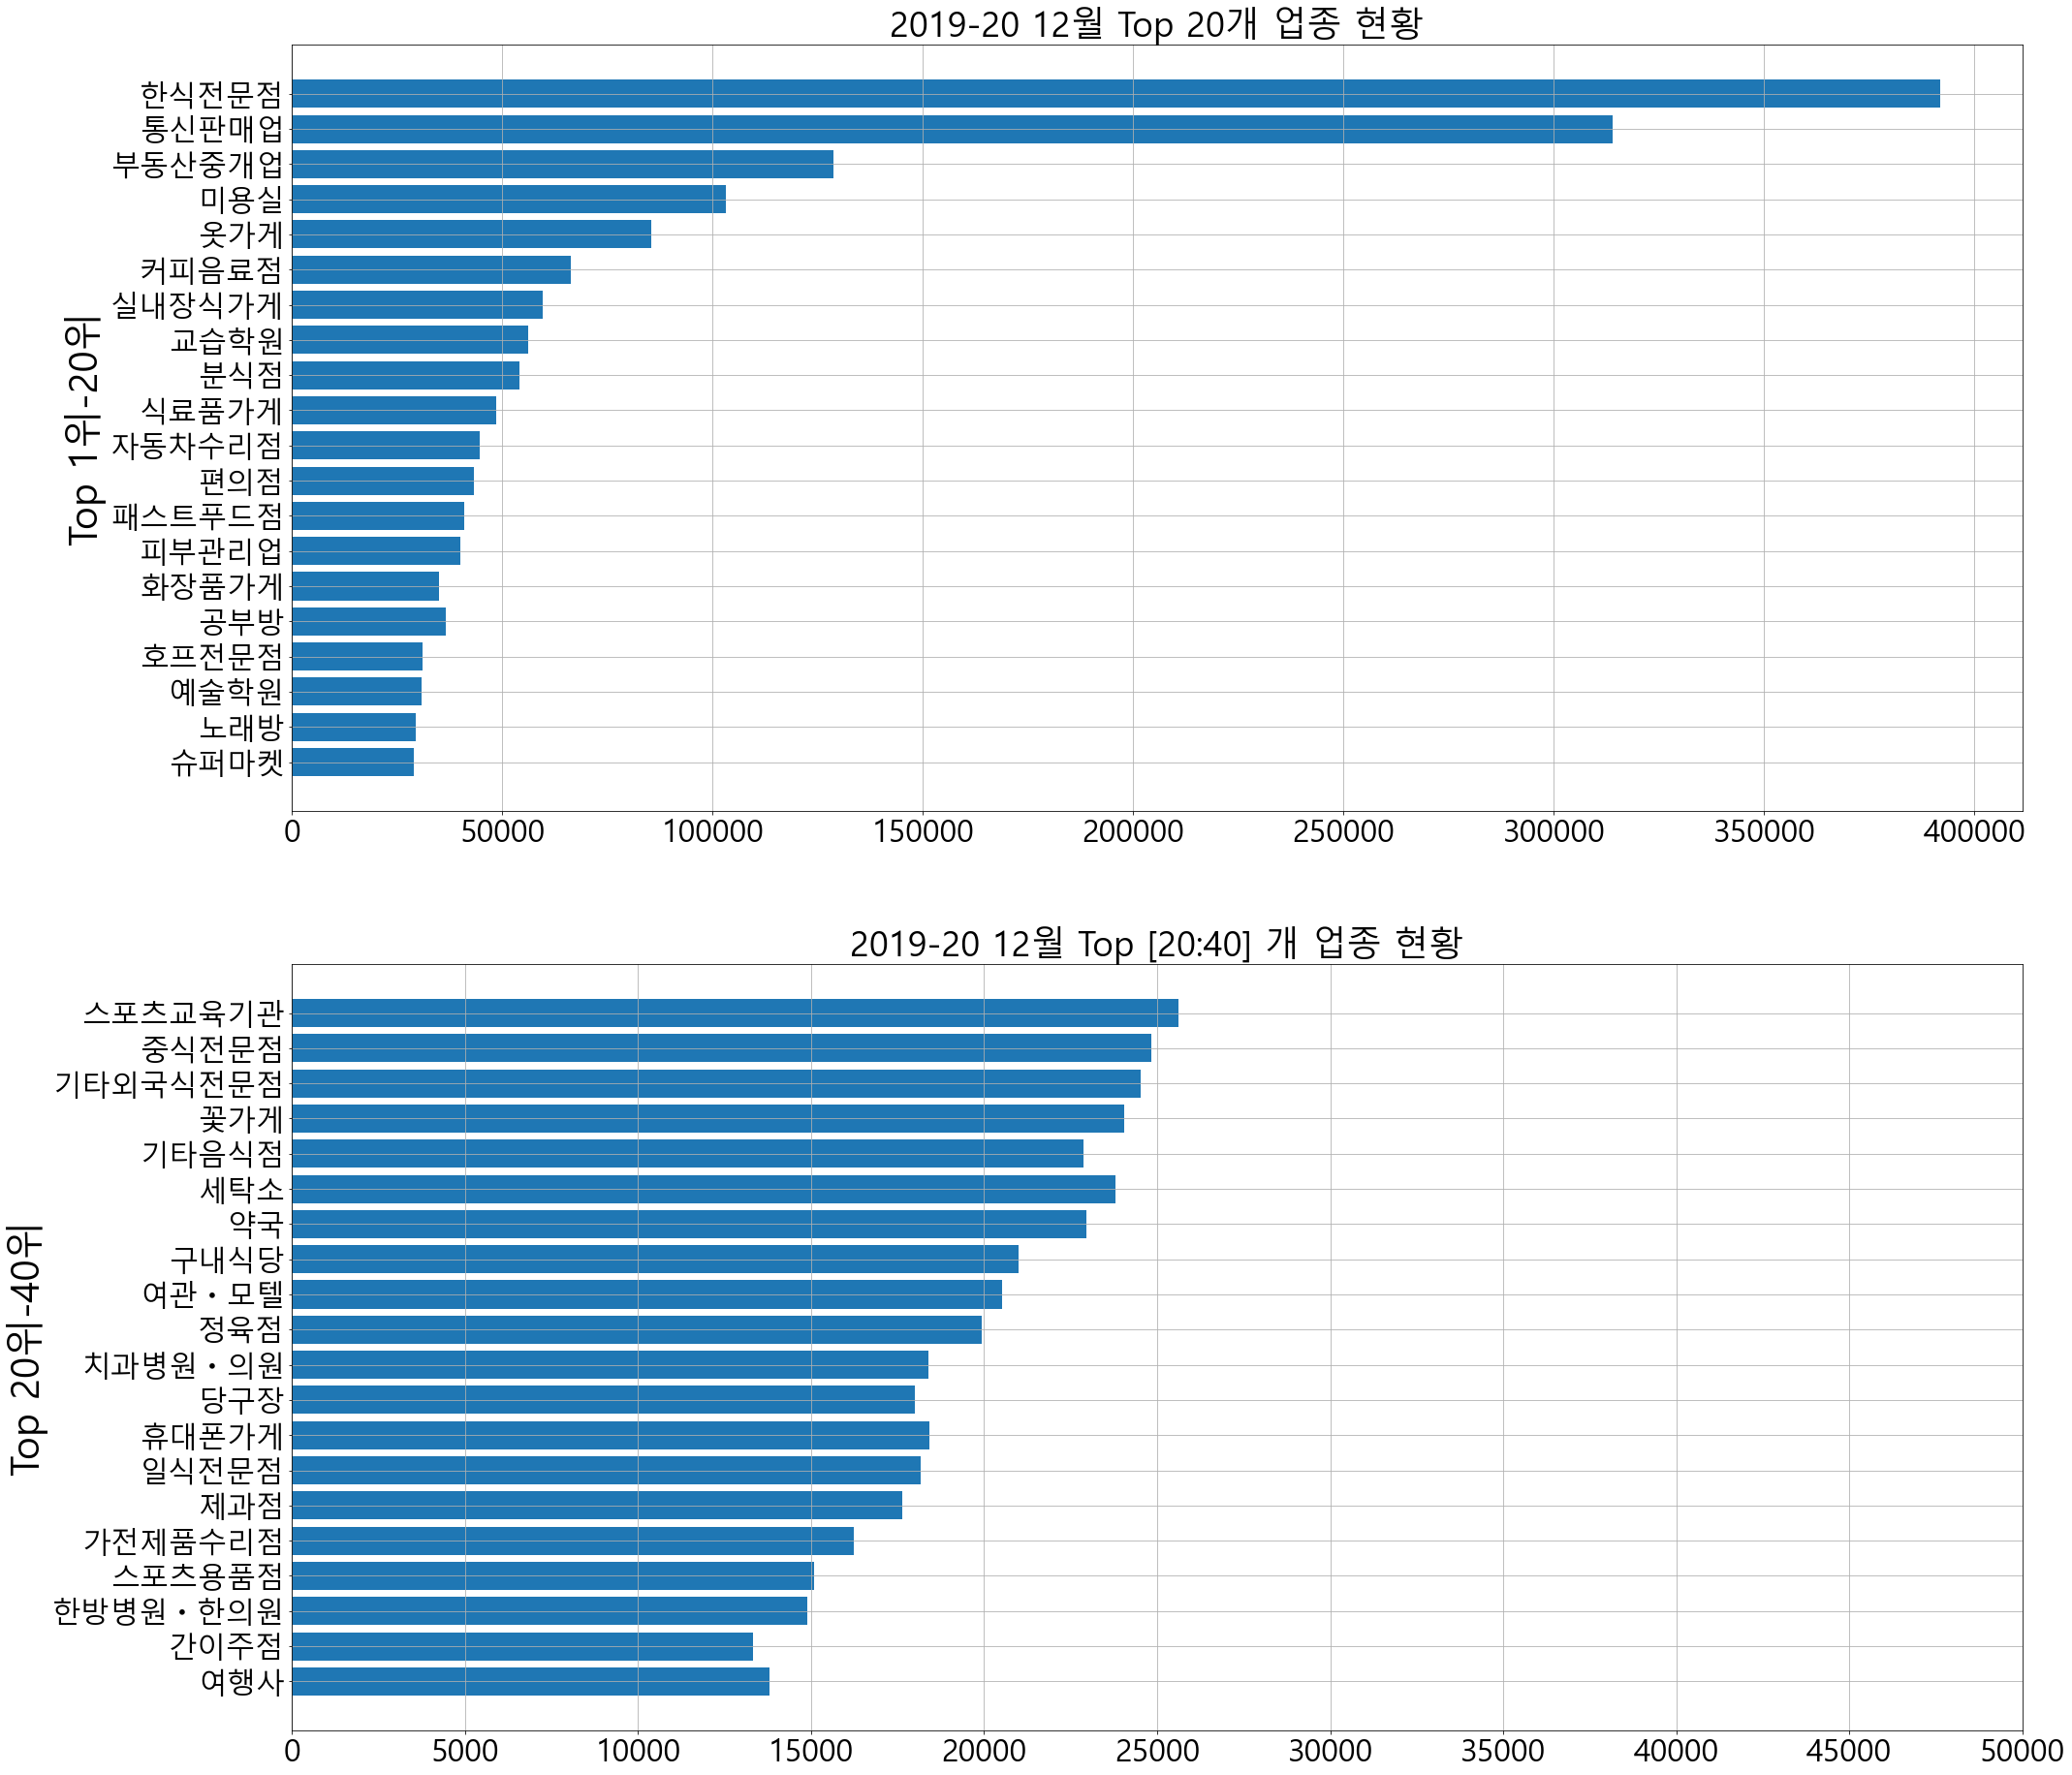

In [141]:
fig, axes = plt.subplots(2,1, figsize =(32,32))
axes[0].barh(df_total.index.values[-20:],df_total['total'].values[-20:])
axes[0].grid(True)
axes[0].set_ylabel("Top 1위-20위",fontsize=40)
axes[0].set_title("2019-20 12월 Top 20개 업종 현황")
axes[1].barh(df_total.index.values[-40:-20],df_total['total'].values[-40:-20])
axes[1].set_xticks(np.arange(0,55000,step = 5000))
axes[1].set_ylabel("Top 20위-40위",fontsize=40)
axes[1].grid(True)
axes[1].set_title("2019-20 12월 Top [20:40] 개 업종 현황")

In [142]:
df_total['total'] =df_total.mean(axis=1)
df_total['total'] =df_total['total'].astype(int)

In [143]:
df_total

2019    2020   total
예식장        890     828     859
공인노무사      908     993     950
변리사       1029    1054    1041
기술사       1059    1158    1108
감정평가사     1169    1234    1201
...        ...     ...     ...
옷가게      86092   84746   85419
미용실     101771  104713  103242
부동산중개업  125057  132291  128674
통신판매업   271383  356776  314079
한식전문점   386161  397465  391813

[100 rows x 3 columns]

In [144]:
df.index[-1]

'한식전문점'

In [145]:
int(len(df.index)/3)

33

In [146]:
N=10
list(map(lambda x:x*N+1,range(int(len(df.index)/N))))

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [147]:
N=10
df.index[list(map(lambda x:x*N+9,range(int(len(df.index)/N))))].values

array(['산부인과 의원', '피부ㆍ비뇨기과 의원', '의료용품가게', '철물점', '생선가게', '사진촬영업',
       '치과병원ㆍ의원', '스포츠교육기관', '자동차수리점', '한식전문점'], dtype=object)

Text(0, 0.5, '10분위 업종')

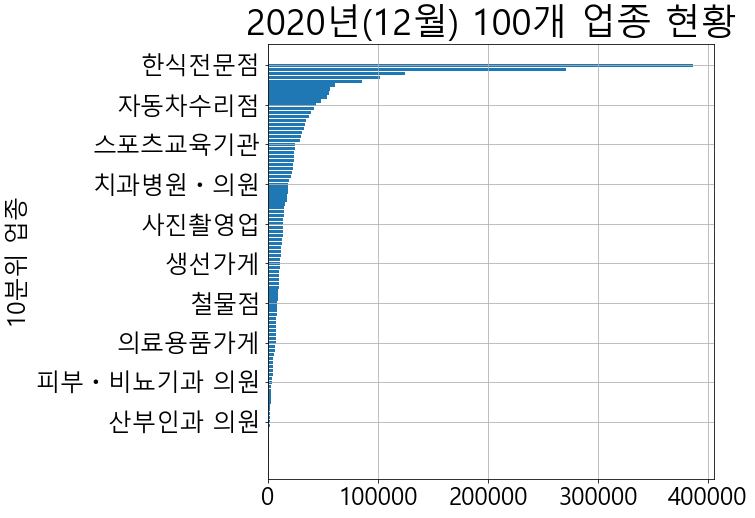

In [151]:
parameters = {'axes.labelsize':24,
          'axes.titlesize': 36,
             'xtick.labelsize':24,
           'ytick.labelsize':24, 
             'legend.fontsize':32}
plt.rcParams.update(parameters)

plt.barh(df.index.values,df[2019].values)
plt.grid(True)
plt.title("2020년(12월) 100개 업종 현황")
plt.yticks(df.index[list(map(lambda x:x*N+9,range(int(len(df.index)/N))))].values)
plt.ylabel('10분위 업종')

Text(0.5, 1.0, '[그림1.2] 2019-20년 5개 지역 사업자 변화')

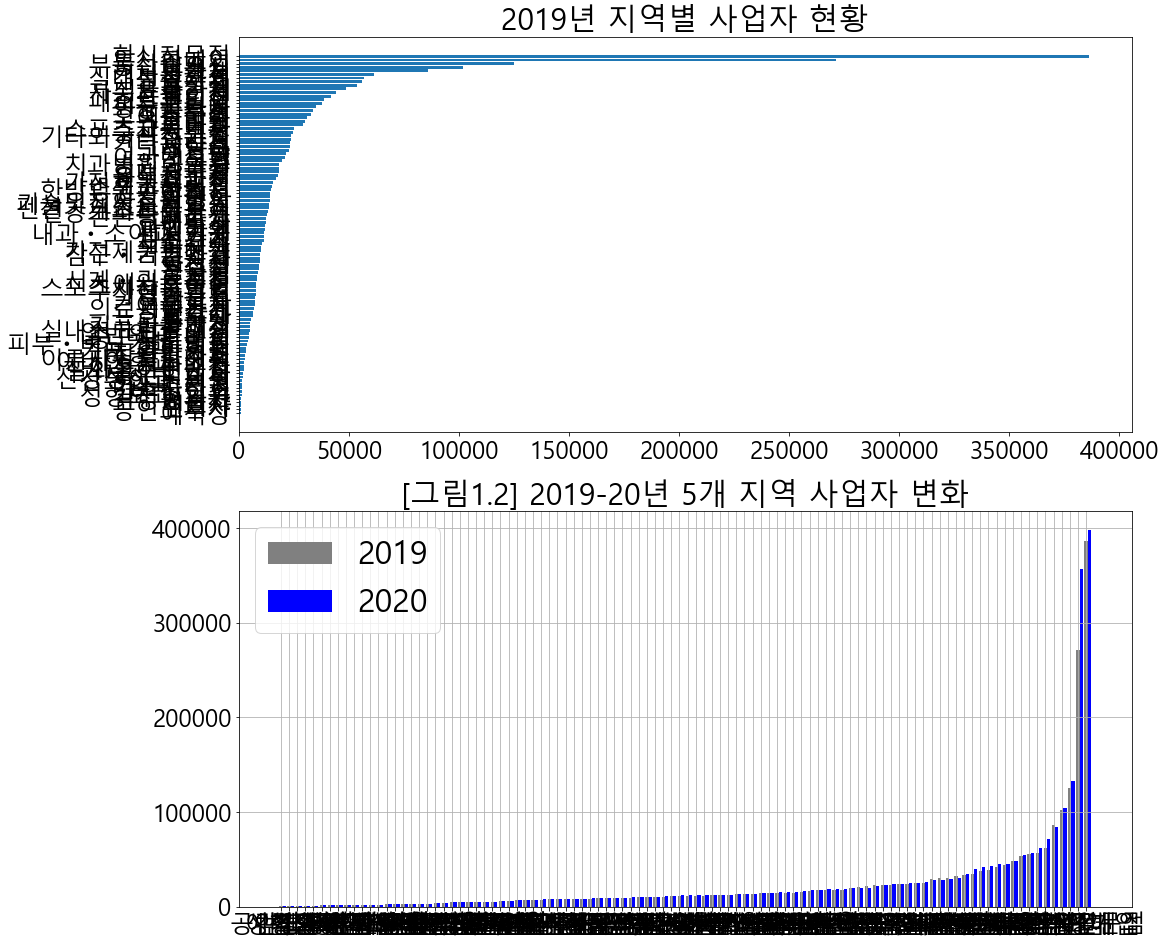

In [157]:
x=np.arange(len(df.index))
w=0.4
fig , axes = plt.subplots(2,1, figsize=(16,16))
axes[0].barh(df.index.values,df[2019].values)
axes[0].set_title("2019년 지역별 사업자 현황", fontsize=30)
axes[1].bar(df.index,df[2019].values, width=0.4, color='gray', label='2019')
axes[1].bar(x+w,df2[2020].values, width=0.4, color='blue', label='2020')
axes[1].legend(loc='best')
#axes[1].set_yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))
axes[1].grid(True)
axes[1].set_title("[그림1.2] 2019-20년 5개 지역 사업자 변화", fontsize=30)

## 3. 3. 지역별 주요 업종 비교
*  지역 : 강원도, 경기도, 서울특별시, ... ,제주특별자치도
* 업종 : 가구점, ... 미용사, 변리사, ...,합계 
    - 지역별 Top20 업종 사업자 현황 

In [158]:
data.columns[1:]

Index(['가구점', '가스충전소', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업', '감정평가사',
       '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공부방', '공인노무사', '공인회계사',
       '과일가게', '교습학원', '구내식당', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점',
       '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게', '당구장', '독서실', '동물병원', '목욕탕',
       '문구점', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원',
       '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업',
       '스포츠용품점', '시계ㆍ귀금속점', '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게',
       '실외골프연습장', '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업',
       '피시방', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게', '휴대폰가게'],
      dtyp

In [159]:
#?data.index.droplevel
df_19 = pd.DataFrame(data.loc[idx[[2019],12,idx[:'제주특별자치도']]][data.columns[1:]].stack())
df_20 =pd.DataFrame(data.loc[idx[[2020],12,idx[:'제주특별자치도']]][data.columns[1:]].stack())
df_19.rename(columns={0:2019},inplace=True)
df_20.rename(columns={0:2020},inplace=True)
df_19 = df_19.loc[idx[2019,12,idx[:]]]
df_20 = df_20.loc[idx[2020,12,idx[:]]]

In [160]:
#?data.index.droplevel
#df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False)
#plt.style.use('default') #'seaborn'
#df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).droplevel(level=0).plot.bar( figsize=(10,7))

In [163]:
#loc = df_19.groupby('city').sum().index

In [165]:
cols = df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).index.droplevel()
vals = df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).values

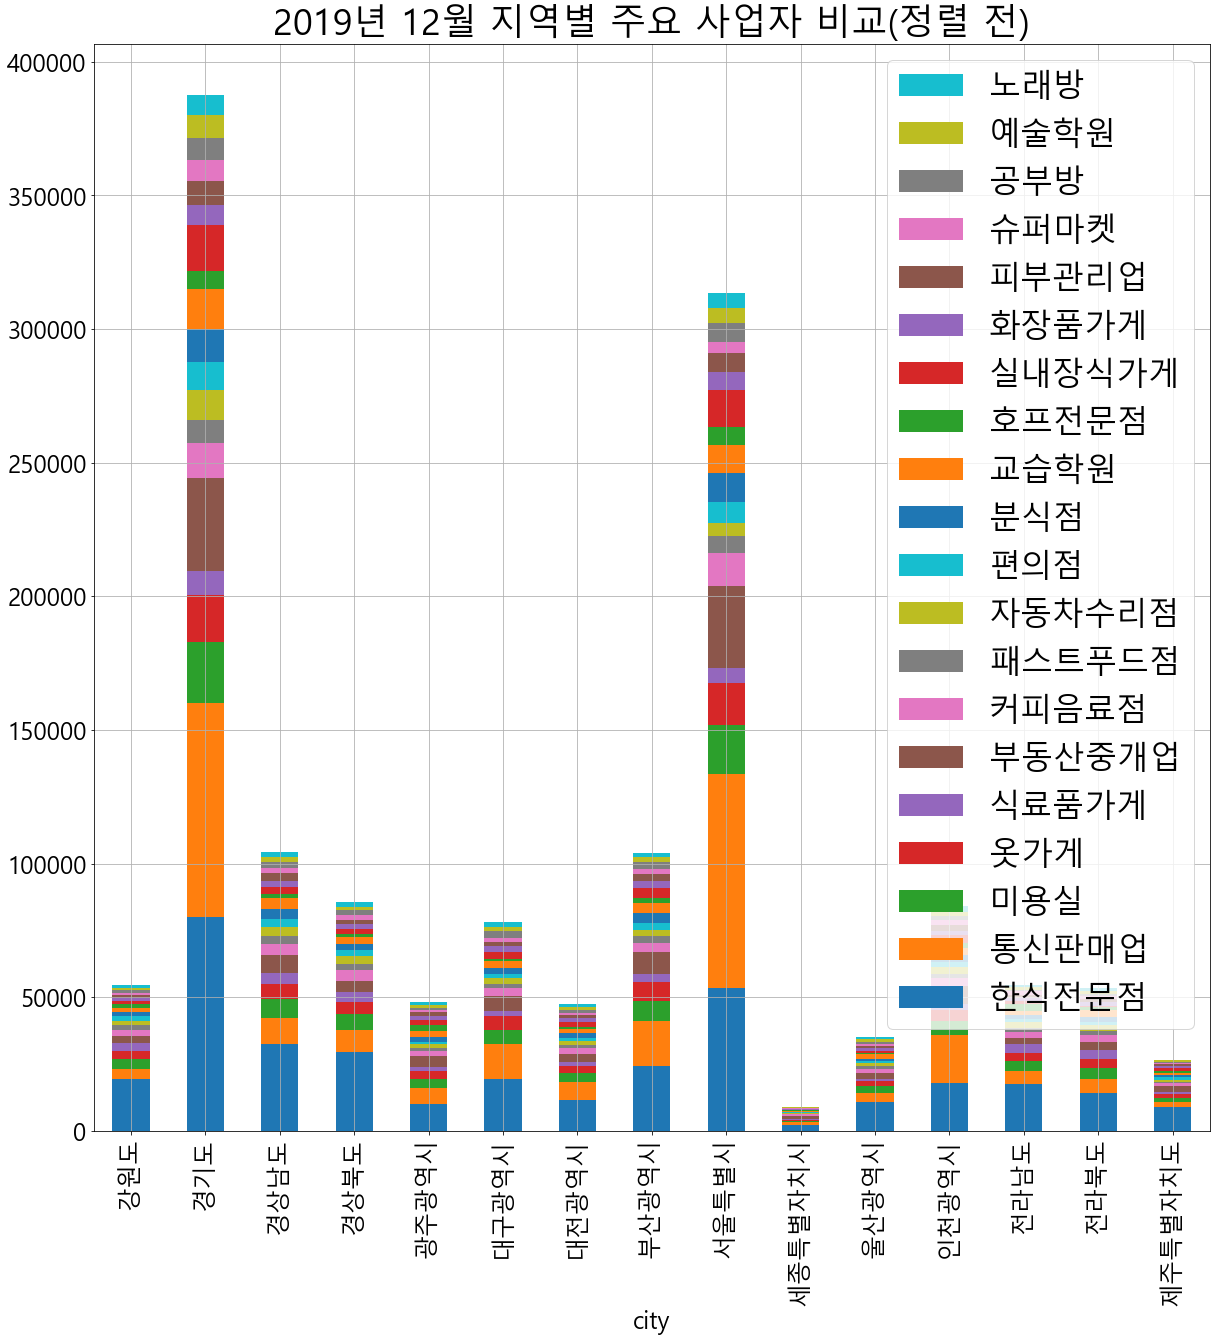

In [167]:
df = df_19.unstack()
df.columns = df.columns.droplevel(level=0)
kargs = {'title':'2019년 12월 지역별 주요 사업자 비교(정렬 전)', 
         'grid':True
        }
df[cols].plot.bar(stacked=True,figsize = (20,20), legend='reverse', **kargs)

In [169]:
df0 = pd.DataFrame(df.loc[idx[:]][cols].stack())
df0_sort = df0.groupby(level=[0]).sum().sort_values(by=0, ascending=False)
df0_sort

0
city           
경기도      387462
서울특별시    313594
경상남도     104235
부산광역시    104024
경상북도      85469
인천광역시     84293
대구광역시     77965
전라남도      54410
강원도       54372
전라북도      53314
광주광역시     48178
대전광역시     47518
울산광역시     34924
제주특별자치도   26637
세종특별자치시    9019

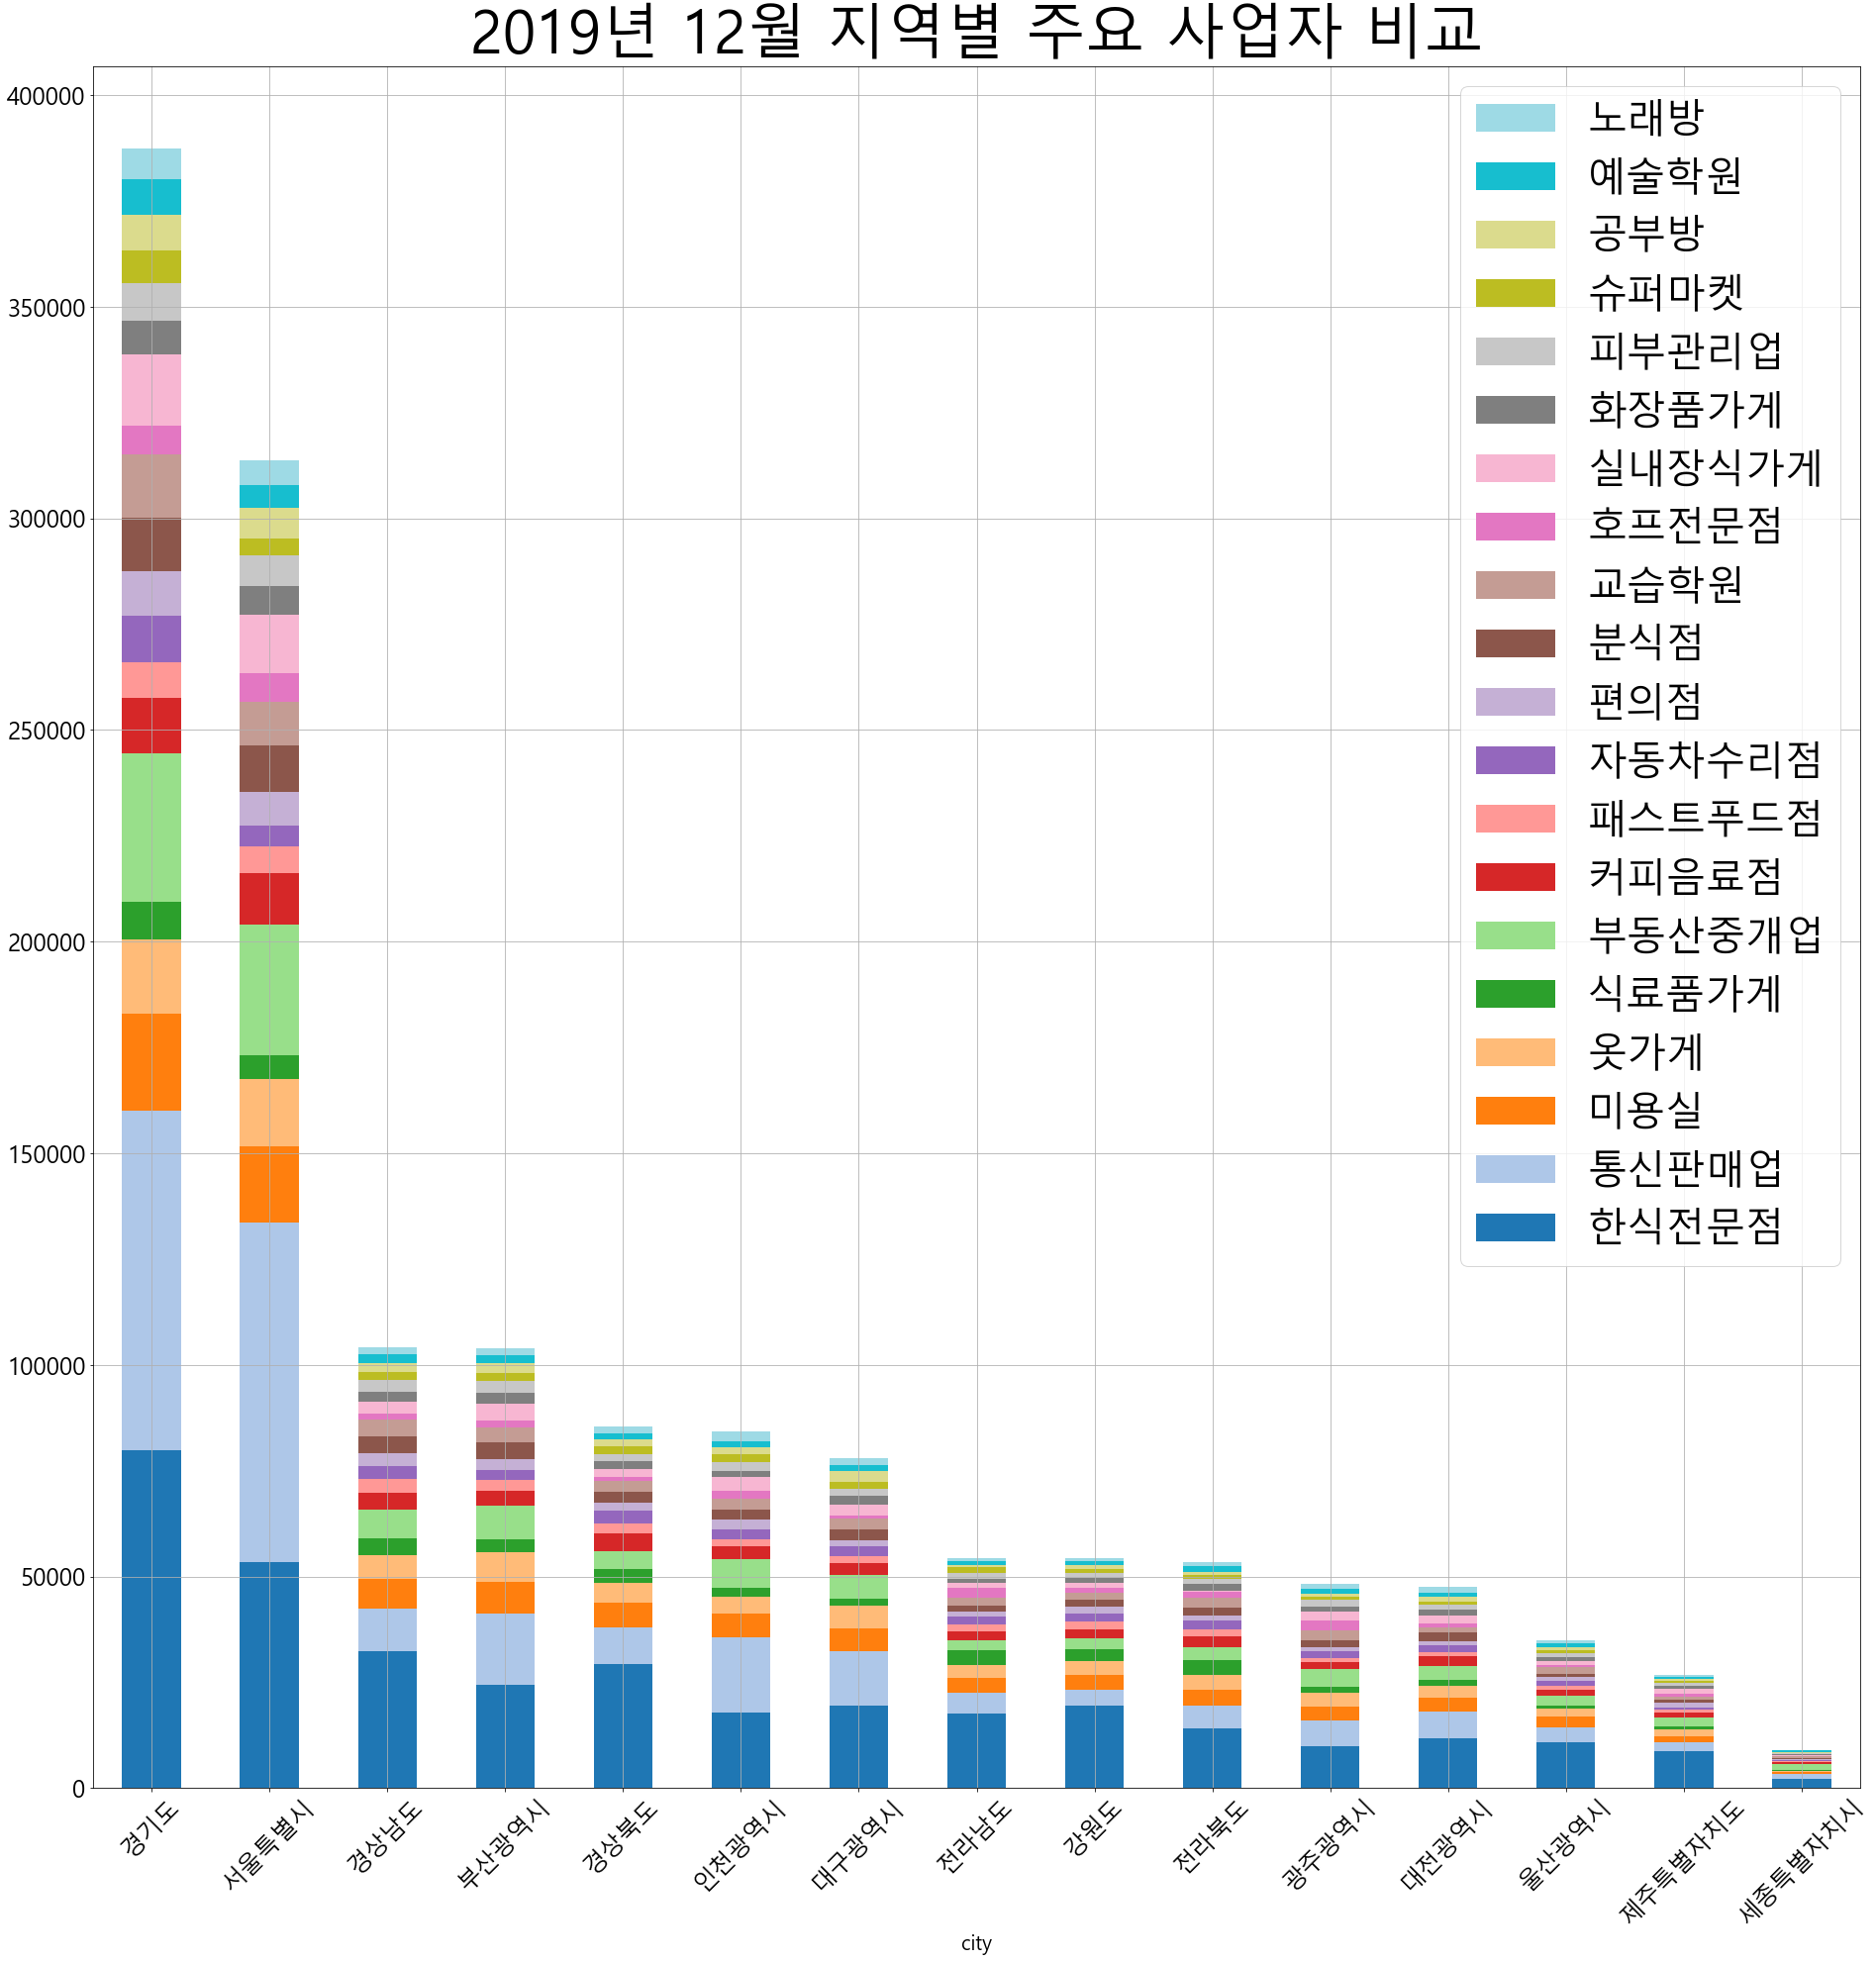

In [182]:
#cmp = plt.cm.get_cmap('jet')
parameters = {'axes.labelsize':20,
          'axes.titlesize': 60,
             'xtick.labelsize':50,
           'ytick.labelsize':20, 
             'legend.fontsize':40}
plt.rcParams.update(parameters)

kargs = {'title':'2019년 12월 지역별 주요 사업자 비교', 
         'grid':True,
         'legend':'reverse',
         'figsize':(32,32),
         'stacked':True,
         'colormap':'tab20',
         'rot':45,
         'sort_columns':True,
         'fontsize':24
         
        }
ax = df0[0].reindex(index=df0_sort.index, level=0).unstack().plot.bar(**kargs)

In [183]:
data.index

MultiIndex([(2019,  1,     '강원도'),
            (2019,  1,     '경기도'),
            (2019,  1,    '경상남도'),
            (2019,  1,    '경상북도'),
            (2019,  1,   '광주광역시'),
            (2019,  1,   '대구광역시'),
            (2019,  1,   '대전광역시'),
            (2019,  1,   '부산광역시'),
            (2019,  1,   '서울특별시'),
            (2019,  1, '세종특별자치시'),
            ...
            (2020, 12,   '서울특별시'),
            (2020, 12, '세종특별자치시'),
            (2020, 12,   '울산광역시'),
            (2020, 12,   '인천광역시'),
            (2020, 12,    '전라남도'),
            (2020, 12,    '전라북도'),
            (2020, 12, '제주특별자치도'),
            (2020, 12,    '충청남도'),
            (2020, 12,    '충청북도'),
            (2020, 12,      '합계')],
           names=['year', 'month', 'city'], length=432)

In [184]:
snsdata = data.loc[[2019,2020],slice(12,12),['경기도','서울특별시']][['한식전문점','통신판매업']]
#snsdata = pd.concat([snsdata,data.loc[2020,slice(12,12),['경기도','서울특별시']][['한식전문점','통신판매업']]],axis=0)
snsdata = pd.DataFrame(snsdata.stack().droplevel(level=1))
snsdata.index

MultiIndex([(2019,   '경기도', '한식전문점'),
            (2019,   '경기도', '통신판매업'),
            (2019, '서울특별시', '한식전문점'),
            (2019, '서울특별시', '통신판매업'),
            (2020,   '경기도', '한식전문점'),
            (2020,   '경기도', '통신판매업'),
            (2020, '서울특별시', '한식전문점'),
            (2020, '서울특별시', '통신판매업')],
           names=['year', 'city', None])

In [185]:
#seaborn with 경기도, 서울 특별시
groups = ('2019', '2020')
sexes = ('경기도', '서울특별시')
means = ('한식전문점', '통신판매업')
index = pd.MultiIndex.from_product([groups,sexes,means], names=['year','city','corp'])
index

MultiIndex([('2019',   '경기도', '한식전문점'),
            ('2019',   '경기도', '통신판매업'),
            ('2019', '서울특별시', '한식전문점'),
            ('2019', '서울특별시', '통신판매업'),
            ('2020',   '경기도', '한식전문점'),
            ('2020',   '경기도', '통신판매업'),
            ('2020', '서울특별시', '한식전문점'),
            ('2020', '서울특별시', '통신판매업')],
           names=['year', 'city', 'corp'])

In [186]:
snsdata.values

array([[ 79896],
       [ 80153],
       [ 53355],
       [ 80314],
       [ 83129],
       [109622],
       [ 54784],
       [103859]], dtype=int64)

In [187]:
snsdata.index.names = ['year','city','corp']

In [188]:
snsdata = pd.DataFrame(data={'val': snsdata.values.flatten()}, index=snsdata.index).reset_index()

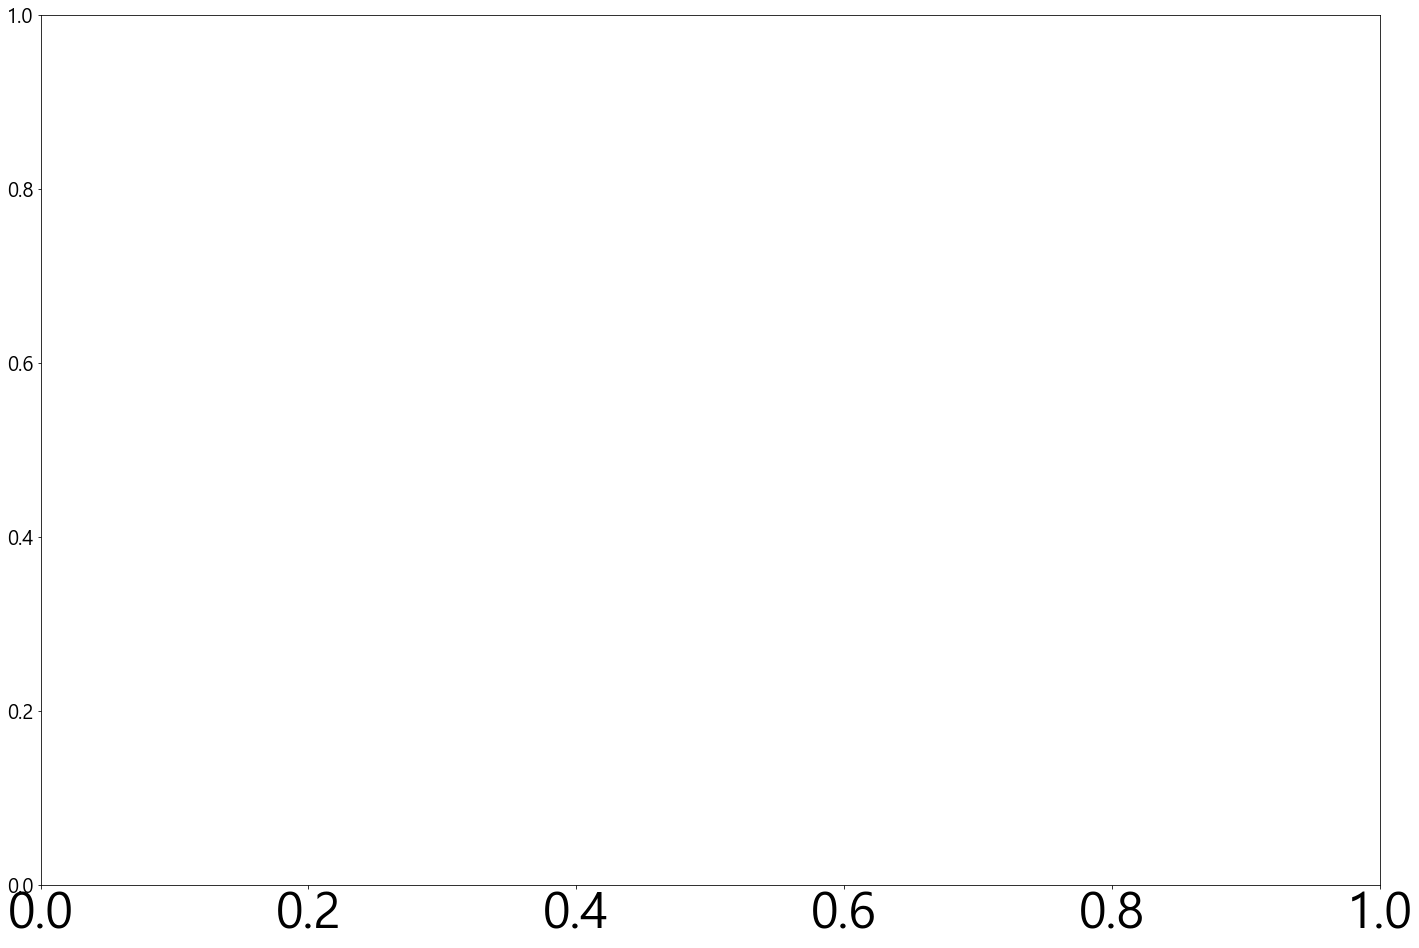

In [189]:
a4_dims=(24,16)
fig, ax = plt.subplots(figsize=a4_dims)

Text(0.5, 1.1, '2019-2020년(12월) 경기도-서울 주요 업종(한식전문점, 통신판매업) 비교')

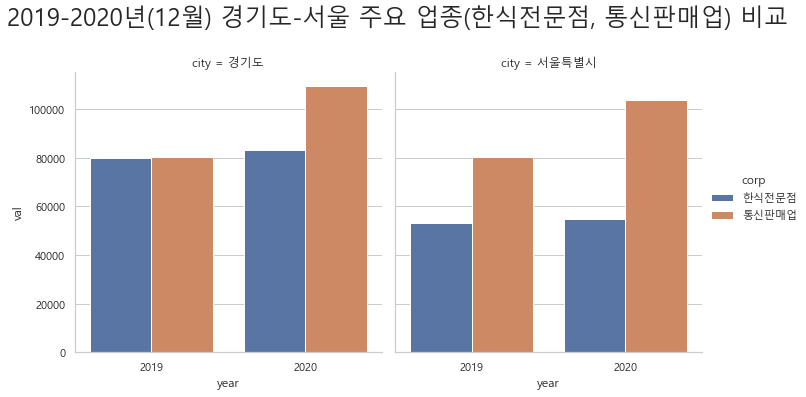

In [193]:
sns.set(font='Malgun Gothic',rc={"axes.unicode_minus":False},style='whitegrid')
#a4_dims=(11.7,8.27)
#fig, ax = plt.subplots(figsize=a4_dims)

fg = sns.catplot(x='year', y='val', hue='corp', col='city', data=snsdata, kind='bar',ax=ax)

#SEABORN TITLE :  fg.fig.suptitle
#seaborn title location fg.fig.suptitle(... y = 1.2)
fg.fig.suptitle('2019-2020년(12월) 경기도-서울 주요 업종(한식전문점, 통신판매업) 비교',fontsize=24, y=1.1)

#SEABORN LGEND fontsize, text
#plt.setp(fg.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(fg.get_legend().get_title(), fontsize='32') # for legend title

### 4. 코로나 전후의 사업자수 변화
* 국내 코로나 첫 확진자 : 2020년 2월 즈음

In [318]:
data.loc[idx[2019,1,]]

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점   간이주점  간판광고물업  감정평가사  \
city                                                                    
강원도        82677   300     93      465      444    439     505     29   
경기도       520472  1873    372     3694     1810   2997    3113    358   
경상남도      152758   564    151      790      727   1314     685     56   
경상북도      125481   461    163      489      693    409     641     19   
광주광역시      67965   214     41      393      339    188     443     32   
대구광역시     110847   371     44      653      518    310     777     55   
대전광역시      68001   214     38      478      298     73     394     29   
부산광역시     152670   512     58      813      622   1023     837     56   
서울특별시     458980  1015     76     2183     1495   5138    2704    240   
세종특별자치시    11313    20      4       47       37     18      31     12   
울산광역시      50134   180     30      281      195    108     256     20   
인천광역시     115817   292     70      958      353   1640     544     73   
전라남도       82774   267    125      456      576    259     459     18   
전라북도       82317   391    101      466      530    369     491     41   
제주특별자치도    41459   181     36      175      241    166     186     14   
충청남도       97599   308    128      556      514    722     453     35   
충청북도       74301   287     75      402      425    476     378     28   
합계       2295565  7450   1605    13299     9817  15649   12897   1115   

         건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업    피시방  한방병원ㆍ한의원  \
city                      ...                                              
강원도           496    667  ...   1589          58    951    420       357   
경기도          2496    797  ...   9558         793   7548   2413      3155   
경상남도          988    723  ...   2804         165   2399    678       807   
경상북도          886    658  ...   1808          98   1390    593       635   
광주광역시         397    167  ...   1010         126   1406    426       416   
대구광역시         590    162  ...   1441         202   1395    587       880   
대전광역시         439    113  ...   1068         109   1083    332       527   
부산광역시         801    507  ...   2346         325   2453    662      1143   
서울특별시        2080    752  ...   7803        1294   6690   1731      3679   
세종특별자치시        34     14  ...    231          14    140     42        75   
울산광역시         208    126  ...    843          76    695    297       287   
인천광역시         617    368  ...   2088         167   1880    539       679   
전라남도          499    888  ...   1071          72   1227    375       402   
전라북도          701    350  ...   1163          89   1043    448       538   
제주특별자치도       152    111  ...   1058          39    632    177       192   
충청남도         1201    630  ...   2074          95   1167    431       522   
충청북도          439    110  ...   1411          72    974    329       401   
합계          13024   7143  ...  39366        3794  33073  10480     14695   

          한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
city                                        
강원도       19271   205   1485   1070    588  
경기도       77957  1680   7127   7771   3901  
경상남도      31752   386   1539   2434   1292  
경상북도      29086   343   1068   1871   1086  
광주광역시      9558   216   2406   1118    588  
대구광역시     19565   355    587   2167   1005  
대전광역시     11507   224   1016   1220    680  
부산광역시     23703   490   1839   2496   1396  
서울특별시     52736  1704   7403   6811   2986  
세종특별자치시    1928    36    165    131     74  
울산광역시     10801   132    353    955    505  
인천광역시     17058   381   1824   1449    904  
전라남도      17262   162   2458   1057    619  
전라북도      13973   213   1377   1399    733  
제주특별자치도    8494   104    590    694    213  
충청남도      19065   264   1728   1287    845  
충청북도      15008   249   1812   1032    539  
합계       378724  7144  34777  34962  17954  

[18 rows x 101 columns]

In [319]:
['a'] + ['b','c']

['a', 'b', 'c']

In [320]:
df = pd.DataFrame(data[['B. 업종전체']+tp20col.tolist()])

In [322]:
df.rename(columns={'B. 업종전체':'total'}, inplace=True)
df.columns.names = ['owners']

In [323]:
df.index

MultiIndex([(2019,  1,     '강원도'),
            (2019,  1,     '경기도'),
            (2019,  1,    '경상남도'),
            (2019,  1,    '경상북도'),
            (2019,  1,   '광주광역시'),
            (2019,  1,   '대구광역시'),
            (2019,  1,   '대전광역시'),
            (2019,  1,   '부산광역시'),
            (2019,  1,   '서울특별시'),
            (2019,  1, '세종특별자치시'),
            ...
            (2020, 12,   '서울특별시'),
            (2020, 12, '세종특별자치시'),
            (2020, 12,   '울산광역시'),
            (2020, 12,   '인천광역시'),
            (2020, 12,    '전라남도'),
            (2020, 12,    '전라북도'),
            (2020, 12, '제주특별자치도'),
            (2020, 12,    '충청남도'),
            (2020, 12,    '충청북도'),
            (2020, 12,      '합계')],
           names=['year', 'month', 'city'], length=432)

In [324]:
df.loc[idx[[2019,2020],[2,8,12],'합계'],]

owners             total   슈퍼마켓    노래방   예술학원  호프전문점    공부방  화장품가게  피부관리업  \
year month city                                                             
2019 2     합계    2305692  30033  31110  30620  34627  30742  35067  33474   
     8     합계    2369932  29978  30626  30938  33897  32714  35165  36521   
     12    합계    2397281  29289  30291  30846  32992  33880  34922  37874   
2020 2     합계    2415709  29152  30163  30943  32472  34541  34935  38723   
     8     합계    2498599  28863  29288  30901  30825  38130  35092  40876   
     12    합계    2548586  28612  28758  30721  29002  39424  35004  42168   

owners           패스트푸드점    편의점  ...  식료품가게    분식점   교습학원  실내장식가게  커피음료점  \
year month city                 ...                                       
2019 2     합계     36523  39586  ...  49914  54065  55765   52846  53126   
     8     합계     38057  41367  ...  49630  53834  56047   55496  59105   
     12    합계     38956  41786  ...  48680  53934  55880   56837  61548   
2020 2     합계     39409  42246  ...  48296  54007  56089   57748  62933   
     8     합계     41623  44005  ...  48460  54057  56304   60547  68579   
     12    합계     42952  44858  ...  48259  54191  56379   62591  71233   

owners             옷가게     미용실  부동산중개업   통신판매업   한식전문점  
year month city                                         
2019 2     합계    86726   99073  122755  227482  379459  
     8     합계    86515  100989  124690  251758  384379  
     12    합계    86092  101771  125057  271383  386161  
2020 2     합계    85683  102307  127039  279249  387772  
     8     합계    85272  103880  130468  324724  393515  
     12    합계    84746  104713  132291  356776  397465  

[6 rows x 21 columns]

In [325]:
before= pd.concat([df.loc[idx[[2019],[1,5,10,12],'합계']],df.loc[idx[[2020],[1,2,3],'합계']]],axis=0)
after = df.loc[idx[[2020],idx[3:],'합계']]

In [326]:
before

owners             total   슈퍼마켓    노래방   예술학원  호프전문점    공부방  화장품가게  피부관리업  \
year month city                                                             
2019 1     합계    2295565  29965  31179  30501  34777  30403  34962  33073   
     5     합계    2337954  30115  30932  30810  34400  31670  35072  35054   
     10    합계    2389698  29637  30464  31008  33595  33451  35160  37313   
     12    합계    2397281  29289  30291  30846  32992  33880  34922  37874   
2020 1     합계    2407656  29226  30244  30954  32799  34286  34935  38312   
     2     합계    2415709  29152  30163  30943  32472  34541  34935  38723   
     3     합계    2418349  28984  29965  30947  31959  34847  34735  39029   

owners           패스트푸드점    편의점  ...  식료품가게    분식점   교습학원  실내장식가게  커피음료점  \
year month city                 ...                                       
2019 1     합계     36388  39366  ...  50004  54046  55710   52386  52374   
     5     합계     37384  40437  ...  49520  53976  55885   54285  56174   
     10    합계     38641  41638  ...  49291  54158  56122   56190  60545   
     12    합계     38956  41786  ...  48680  53934  55880   56837  61548   
2020 1     합계     39210  41978  ...  48396  54016  56102   57280  62278   
     2     합계     39409  42246  ...  48296  54007  56089   57748  62933   
     3     합계     39647  42465  ...  47952  53864  56183   58166  63537   

owners             옷가게     미용실  부동산중개업   통신판매업   한식전문점  
year month city                                         
2019 1     합계    86636   98822  122294  223126  378724  
     5     합계    86496  100086  123818  239332  382902  
     10    합계    86713  101511  124937  262691  386351  
     12    합계    86092  101771  125057  271383  386161  
2020 1     합계    85855  102117  126227  275378  387067  
     2     합계    85683  102307  127039  279249  387772  
     3     합계    84959  102438  127371  282079  387736  

[7 rows x 21 columns]

In [327]:
after

owners             total   슈퍼마켓    노래방   예술학원  호프전문점    공부방  화장품가게  피부관리업  \
year month city                                                             
2020 3     합계    2418349  28984  29965  30947  31959  34847  34735  39029   
     4     합계    2433695  28985  29928  30964  31702  35233  34813  39322   
     5     합계    2448536  28979  29806  30967  31476  35579  34886  39647   
     6     합계    2467976  28933  29687  30966  31271  37505  34987  40124   
     7     합계    2485979  28896  29503  30953  31176  37868  35024  40585   
     8     합계    2498599  28863  29288  30901  30825  38130  35092  40876   
     9     합계    2515815  28818  29251  30924  30553  38546  35106  41257   
     10    합계    2530626  28802  29070  30868  30264  38822  35135  41481   
     11    합계    2544505  28746  28884  30809  29872  39149  35189  41798   
     12    합계    2548586  28612  28758  30721  29002  39424  35004  42168   

owners           패스트푸드점    편의점  ...  식료품가게    분식점   교습학원  실내장식가게  커피음료점  \
year month city                 ...                                       
2020 3     합계     39647  42465  ...  47952  53864  56183   58166  63537   
     4     합계     39980  42743  ...  48066  53951  56221   58732  64442   
     5     합계     40331  42982  ...  48238  54053  56234   59198  65340   
     6     합계     40789  43331  ...  48407  54074  56305   59677  66499   
     7     합계     41260  43722  ...  48506  54147  56343   60171  67748   
     8     합계     41623  44005  ...  48460  54057  56304   60547  68579   
     9     합계     42004  44303  ...  48517  54339  56468   60911  69490   
     10    합계     42260  44535  ...  48501  54244  56500   61570  70185   
     11    합계     42642  44789  ...  48432  54226  56480   62123  70806   
     12    합계     42952  44858  ...  48259  54191  56379   62591  71233   

owners             옷가게     미용실  부동산중개업   통신판매업   한식전문점  
year month city                                         
2020 3     합계    84959  102438  127371  282079  387736  
     4     합계    85005  102686  127732  290521  388954  
     5     합계    85217  102997  128305  297469  390451  
     6     합계    85392  103390  129218  305995  391938  
     7     합계    85395  103697  130010  316004  392857  
     8     합계    85272  103880  130468  324724  393515  
     9     합계    85330  104205  131062  333239  395323  
     10    합계    85248  104308  131507  343859  395820  
     11    합계    85173  104459  131919  353110  396621  
     12    합계    84746  104713  132291  356776  397465  

[10 rows x 21 columns]

In [328]:
before.index

MultiIndex([(2019,  1, '합계'),
            (2019,  5, '합계'),
            (2019, 10, '합계'),
            (2019, 12, '합계'),
            (2020,  1, '합계'),
            (2020,  2, '합계'),
            (2020,  3, '합계')],
           names=['year', 'month', 'city'])

In [329]:
before.index = before.index.droplevel(level=2)
before.index

MultiIndex([(2019,  1),
            (2019,  5),
            (2019, 10),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3)],
           names=['year', 'month'])

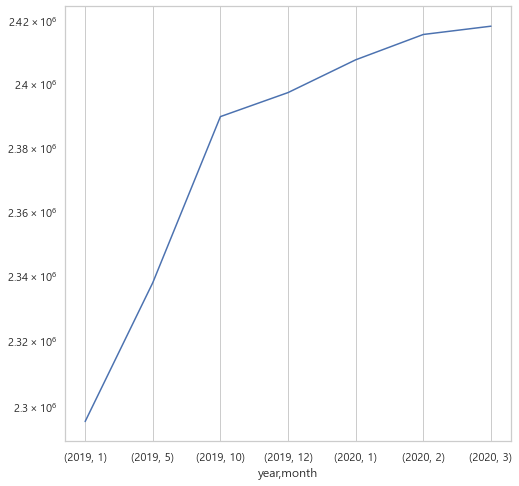

In [330]:
before['total'].plot(logy=True)

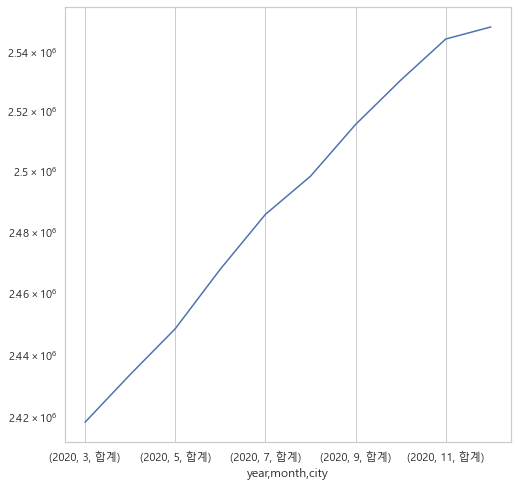

In [331]:
after['total'].plot(logy=True)

Text(0, 0.5, '단위 : 백 만(1M)')

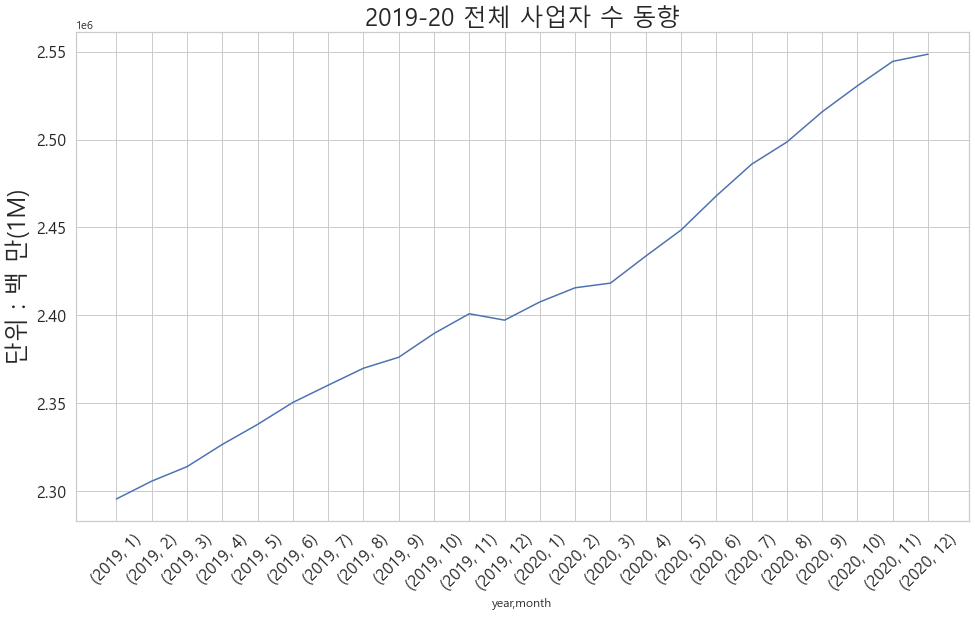

In [421]:
df_total = df.loc[idx[[2019,2020],:,'합계'],].droplevel(level=2)['total']
ax = df_total.plot(figsize =(16,9), fontsize=16)
ax.set_title('2019-20 전체 사업자 수 동향', fontsize =24)
ax.set_xticks(np.arange(0, len(df_total.index.values)))
ax.set_xticklabels(df_total.index.values, rotation=45)
ax.set_ylabel('단위 : 백 만(1M)', fontsize = 24)

### 5. 코로나 이후 감소한 업종
* 국내 첫 확진자는 2020년 1월 발생
* 업종 : 가구점, ... 미용사, 변리사, ...,합계 



In [596]:
data.loc[idx[2020,idx[1:12],idx[:'충청북도']]].droplevel(2)

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  감정평가사  \
year month                                                                
2020 1        85671   300     94      541      462   425     514     33   
     1       558878  1934    367     4578     1942  2808    3188    379   
     1       157493   536    158      910      737  1153     696     63   
     1       129486   472    163      561      695   384     662     21   
     1        70997   214     38      459      348   191     434     36   
...             ...   ...    ...      ...      ...   ...     ...    ...   
     12       89239   277    119      524      570   244     490     20   
     12       88047   411    111      573      530   272     511     39   
     12       47390   191     34      194      250   156     197     16   
     12      106102   299    130      705      532   544     479     38   
     12       80408   275     74      495      412   391     383     32   

            건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업   피시방  한방병원ㆍ한의원  \
year month                   ...                                             
2020 1           504    654  ...   1708          58   1118   426       366   
     1          2681    812  ...  10451         829   8999  2341      3229   
     1          1003    706  ...   2901         174   2825   654       817   
     1           899    654  ...   1962         102   1616   573       640   
     1           399    176  ...   1051         124   1621   400       412   
...              ...    ...  ...    ...         ...    ...   ...       ...   
     12          478    949  ...   1295          78   1574   377       398   
     12          734    360  ...   1335          97   1405   391       541   
     12          180    110  ...   1200          44    794   168       199   
     12         1272    635  ...   2383          99   1487   452       517   
     12          435    108  ...   1615          81   1256   359       406   

            한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month                                    
2020 1      19586   229   1361   1093    627  
     1      80175  1873   6790   7857   4071  
     1      32396   430   1406   2394   1315  
     1      29353   357   1026   1861   1063  
     1       9968   234   2265   1174    575  
...           ...   ...    ...    ...    ...  
     12     18001   192   2106   1059    586  
     12     14620   244   1124   1474    722  
     12      9068   136    605    664    244  
     12     20013   292   1391   1356    886  
     12     15764   276   1533    985    551  

[204 rows x 101 columns]

In [597]:
df_total= data.loc[idx[2020,idx[1:12],idx[:'충청북도']]].droplevel(2)

In [599]:
df_total['index'] = df_total.index
df_total= df_total.drop(columns=['B. 업종전체'])
df_total

가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  감정평가사  건강보조식품가게  \
year month                                                                 
2020 1       300     94      541      462   425     514     33       504   
     1      1934    367     4578     1942  2808    3188    379      2681   
     1       536    158      910      737  1153     696     63      1003   
     1       472    163      561      695   384     662     21       899   
     1       214     38      459      348   191     434     36       399   
...          ...    ...      ...      ...   ...     ...    ...       ...   
     12      277    119      524      570   244     490     20       478   
     12      411    111      573      530   272     511     39       734   
     12      191     34      194      250   156     197     16       180   
     12      299    130      705      532   544     479     38      1272   
     12      275     74      495      412   391     383     32       435   

            건어물가게   건축사  ...  피부ㆍ비뇨기과 의원  피부관리업   피시방  한방병원ㆍ한의원  한식전문점  헬스클럽  \
year month               ...                                                   
2020 1        654   337  ...          58   1118   426       366  19586   229   
     1        812  2108  ...         829   8999  2341      3229  80175  1873   
     1        706   521  ...         174   2825   654       817  32396   430   
     1        654   475  ...         102   1616   573       640  29353   357   
     1        176   239  ...         124   1621   400       412   9968   234   
...           ...   ...  ...         ...    ...   ...       ...    ...   ...   
     12       949   303  ...          78   1574   377       398  18001   192   
     12       360   378  ...          97   1405   391       541  14620   244   
     12       110   316  ...          44    794   168       199   9068   136   
     12       635   368  ...          99   1487   452       517  20013   292   
     12       108   308  ...          81   1256   359       406  15764   276   

            호프전문점  화장품가게  휴대폰가게       index  
year month                                   
2020 1       1361   1093    627   (2020, 1)  
     1       6790   7857   4071   (2020, 1)  
     1       1406   2394   1315   (2020, 1)  
     1       1026   1861   1063   (2020, 1)  
     1       2265   1174    575   (2020, 1)  
...           ...    ...    ...         ...  
     12      2106   1059    586  (2020, 12)  
     12      1124   1474    722  (2020, 12)  
     12       605    664    244  (2020, 12)  
     12      1391   1356    886  (2020, 12)  
     12      1533    985    551  (2020, 12)  

[204 rows x 101 columns]

In [600]:
df_total.loc[idx[2020,1]]['슈퍼마켓'].sum()

29226

In [779]:
cols = df_total.columns[:-1]
cols

Index(['가구점', '가스충전소', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업', '감정평가사',
       '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공부방', '공인노무사', '공인회계사',
       '과일가게', '교습학원', '구내식당', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점',
       '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게', '당구장', '독서실', '동물병원', '목욕탕',
       '문구점', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원',
       '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업',
       '스포츠용품점', '시계ㆍ귀금속점', '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게',
       '실외골프연습장', '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업',
       '피시방', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게', '휴대폰가게'],
      dtyp

In [780]:
#20top columns
cols = df_total.columns[:-1]
reduced = []
increased = []
print("[ 코로나 전, 후 감소한 업종(2020년 1월 대비 12월에 10%이상 감소/증가) ]")
for col in cols:
    if (  df_total.loc[idx[2020,1]][col].sum()*0.9 > df_total.loc[idx[2020,12]][col].sum()) : #reduced
        print(col)
        reduced.append(col)
    elif(df_total.loc[idx[2020,1]][col].sum() < df_total.loc[idx[2020,12]][col].sum()*0.9): #increased
        increased.append(col)

[ 코로나 전, 후 감소한 업종(2020년 1월 대비 12월에 10%이상 감소/증가) ]
간이주점
호프전문점


In [781]:
reduced, len(reduced)

(['간이주점', '호프전문점'], 2)

In [782]:
increased, len(increased)

(['공부방', '기술및직업훈련학원', '커피음료점', '통신판매업', '펜션ㆍ게스트하우스'], 5)

Text(0.5, 0.98, "2020년 1월 기준 10% 이상 감소한 두 업종 ['간이주점','호프전문점']")

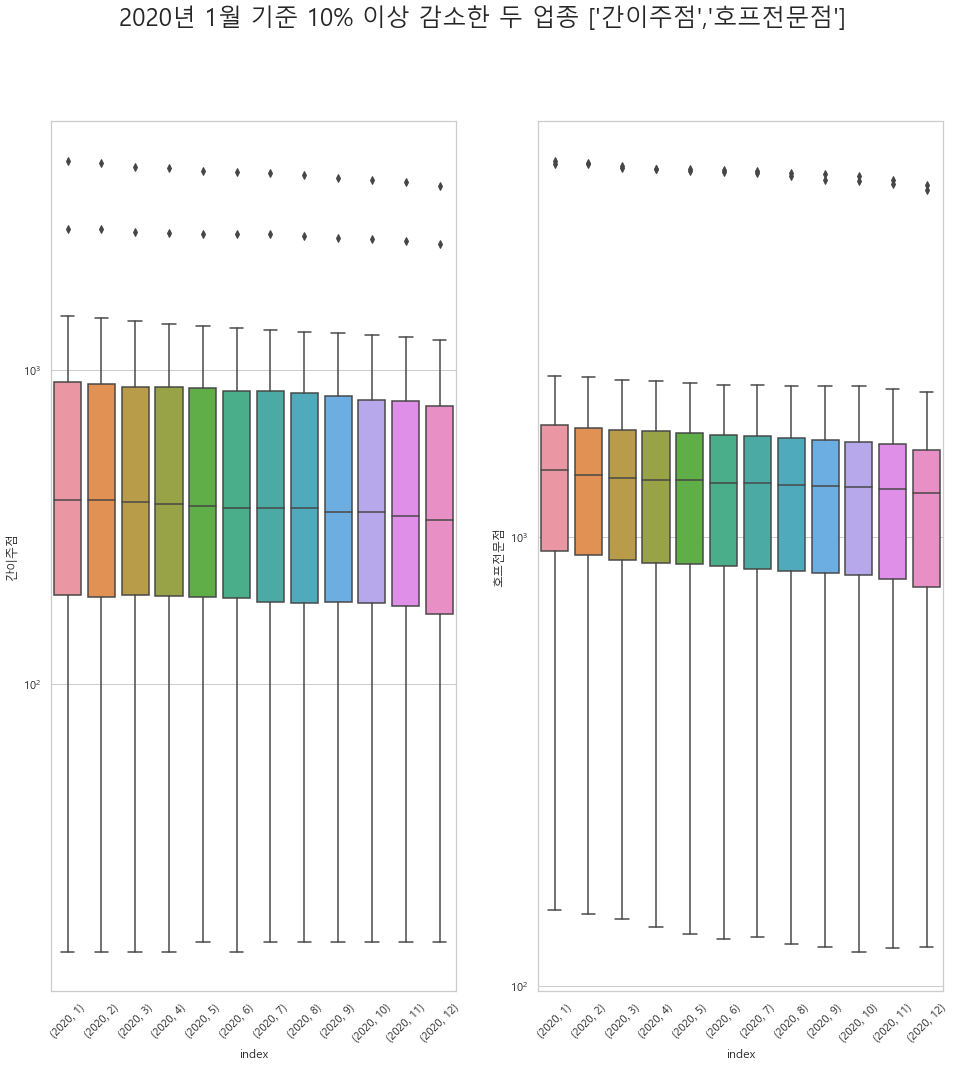

In [797]:
#5. 코로나 이후 감소한 업종 25개
#25
P=1
Q=2
fig, ax = plt.subplots(P,Q,figsize=(16,16))
for j in range(Q):
    g=sns.boxplot(data=df_total, x='index', y=reduced[j], ax= ax[j])
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    g.set_yscale('log')

fig.suptitle('2020년 1월 기준 10% 이상 감소한 두 업종 [\'간이주점\',\'호프전문점\']', fontsize=24)


In [753]:
dd = data.loc[idx[[2019,2020],idx[1:12],idx[:'충청북도']]]
dd = dd.reset_index(level=2)
dd['index']= dd.index
dd = dd[(dd['city'].values != ['경기도']) & (dd['city'].values != ['서울특별시'])]

In [756]:
dd

city  B. 업종전체  가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  \
year month                                                                 
2019 1          강원도    82677  300     93      465      444   439     505   
     1         경상남도   152758  564    151      790      727  1314     685   
     1         경상북도   125481  461    163      489      693   409     641   
     1        광주광역시    67965  214     41      393      339   188     443   
     1        대구광역시   110847  371     44      653      518   310     777   
...             ...      ...  ...    ...      ...      ...   ...     ...   
2020 12        전라남도    89239  277    119      524      570   244     490   
     12        전라북도    88047  411    111      573      530   272     511   
     12     제주특별자치도    47390  191     34      194      250   156     197   
     12        충청남도   106102  299    130      705      532   544     479   
     12        충청북도    80408  275     74      495      412   391     383   

            감정평가사  건강보조식품가게  ...  피부ㆍ비뇨기과 의원  피부관리업  피시방  한방병원ㆍ한의원  한식전문점  \
year month                   ...                                            
2019 1         29       496  ...          58    951  420       357  19271   
     1         56       988  ...         165   2399  678       807  31752   
     1         19       886  ...          98   1390  593       635  29086   
     1         32       397  ...         126   1406  426       416   9558   
     1         55       590  ...         202   1395  587       880  19565   
...           ...       ...  ...         ...    ...  ...       ...    ...   
2020 12        20       478  ...          78   1574  377       398  18001   
     12        39       734  ...          97   1405  391       541  14620   
     12        16       180  ...          44    794  168       199   9068   
     12        38      1272  ...          99   1487  452       517  20013   
     12        32       435  ...          81   1256  359       406  15764   

            헬스클럽  호프전문점  화장품가게  휴대폰가게       index  
year month                                         
2019 1       205   1485   1070    588   (2019, 1)  
     1       386   1539   2434   1292   (2019, 1)  
     1       343   1068   1871   1086   (2019, 1)  
     1       216   2406   1118    588   (2019, 1)  
     1       355    587   2167   1005   (2019, 1)  
...          ...    ...    ...    ...         ...  
2020 12      192   2106   1059    586  (2020, 12)  
     12      244   1124   1474    722  (2020, 12)  
     12      136    605    664    244  (2020, 12)  
     12      292   1391   1356    886  (2020, 12)  
     12      276   1533    985    551  (2020, 12)  

[360 rows x 103 columns]

In [757]:
dd = dd.reset_index()

IndexError: list index out of range

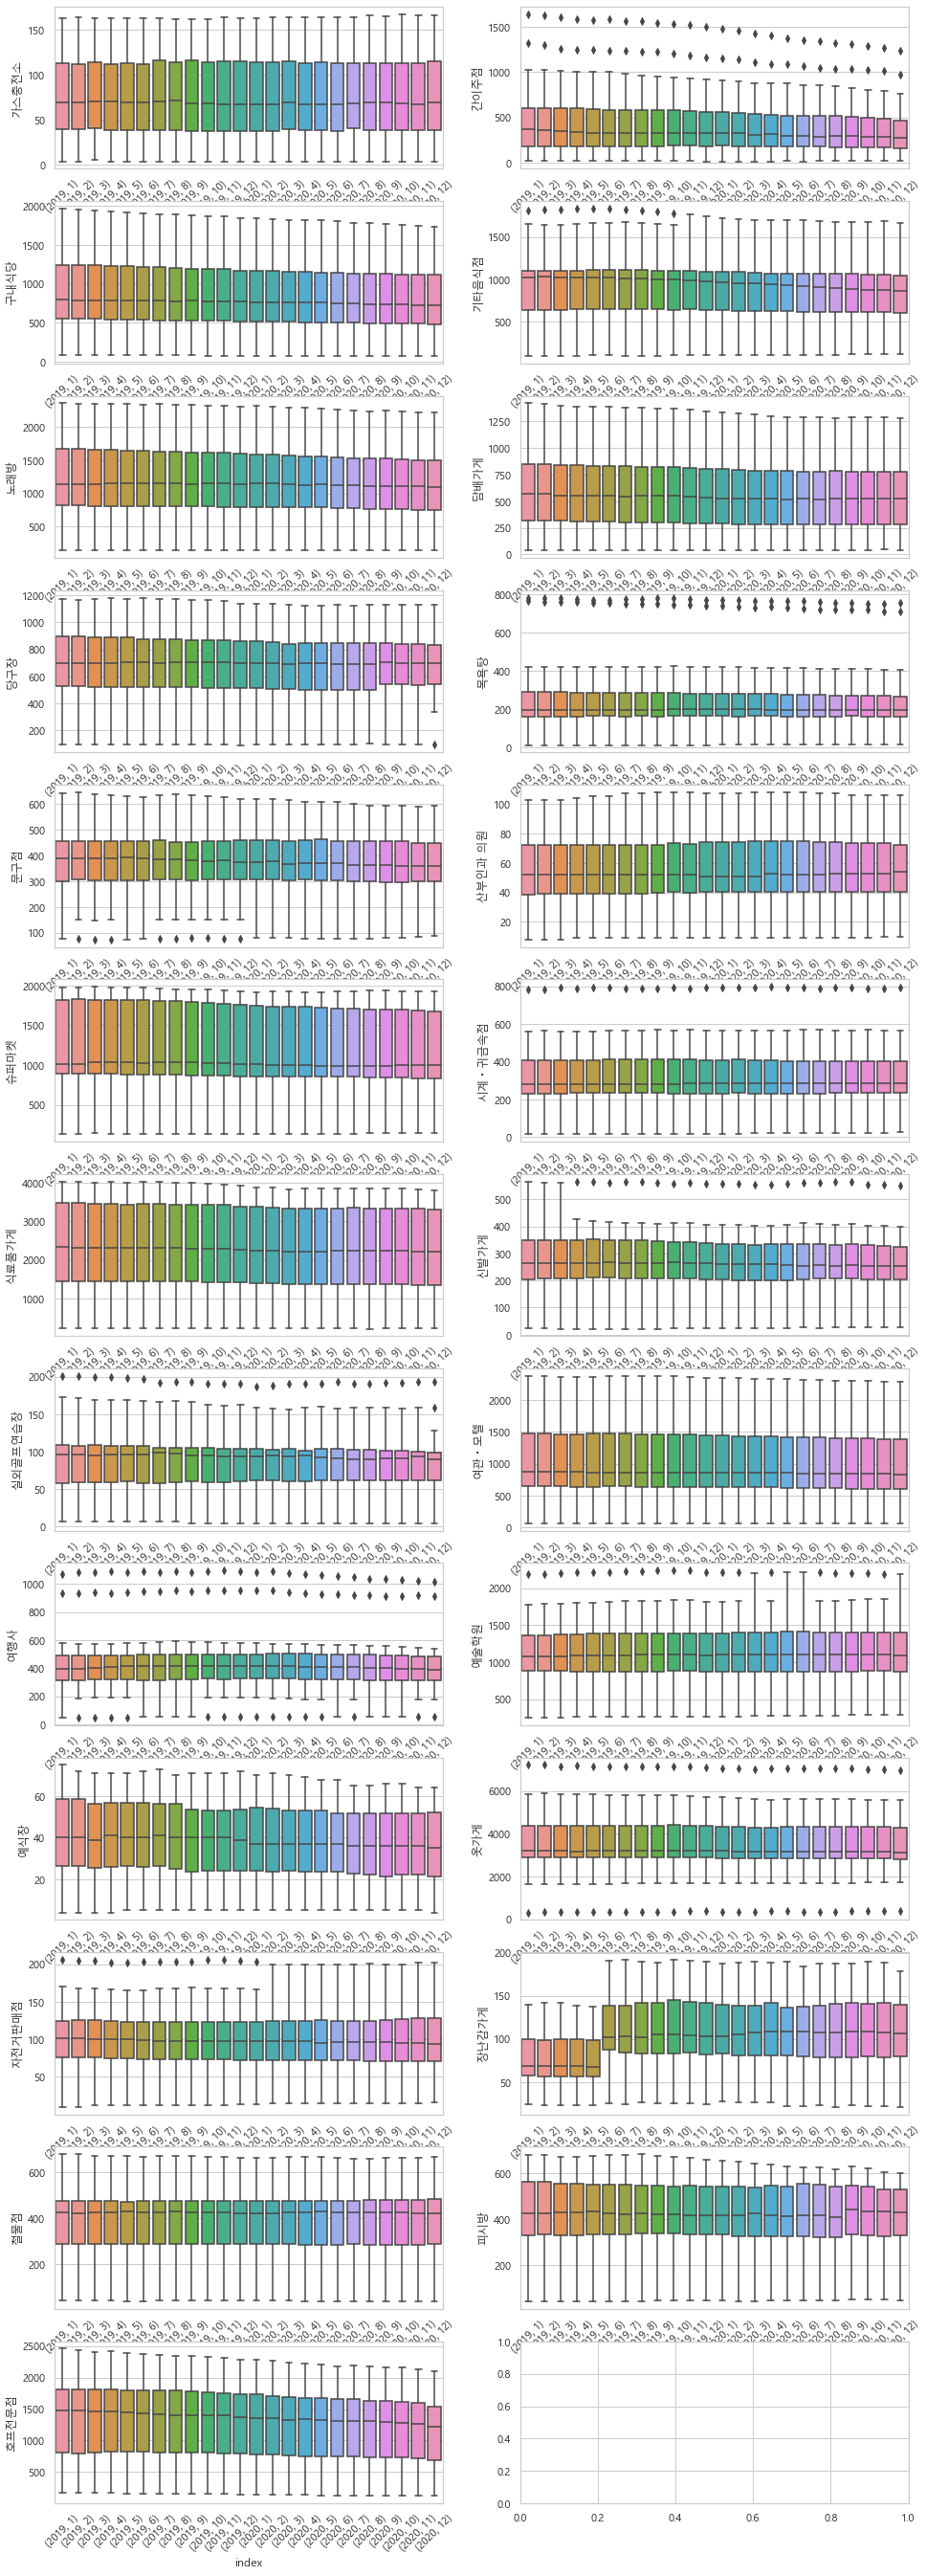

In [758]:
P=13
Q=2
fig, ax = plt.subplots(P,Q,figsize=(16,48))
for i in range(P):
    for j in range(Q):
        g=sns.boxplot(data=dd, x='index', y=reduced[i*Q+j], ax= ax[i][j])
        g.set_xticklabels(g.get_xticklabels(), rotation=45)
#간이 주점, 호프전문점, 노래방, 구내식당, 기타음식점 

IndexError: index 4 is out of bounds for axis 0 with size 4

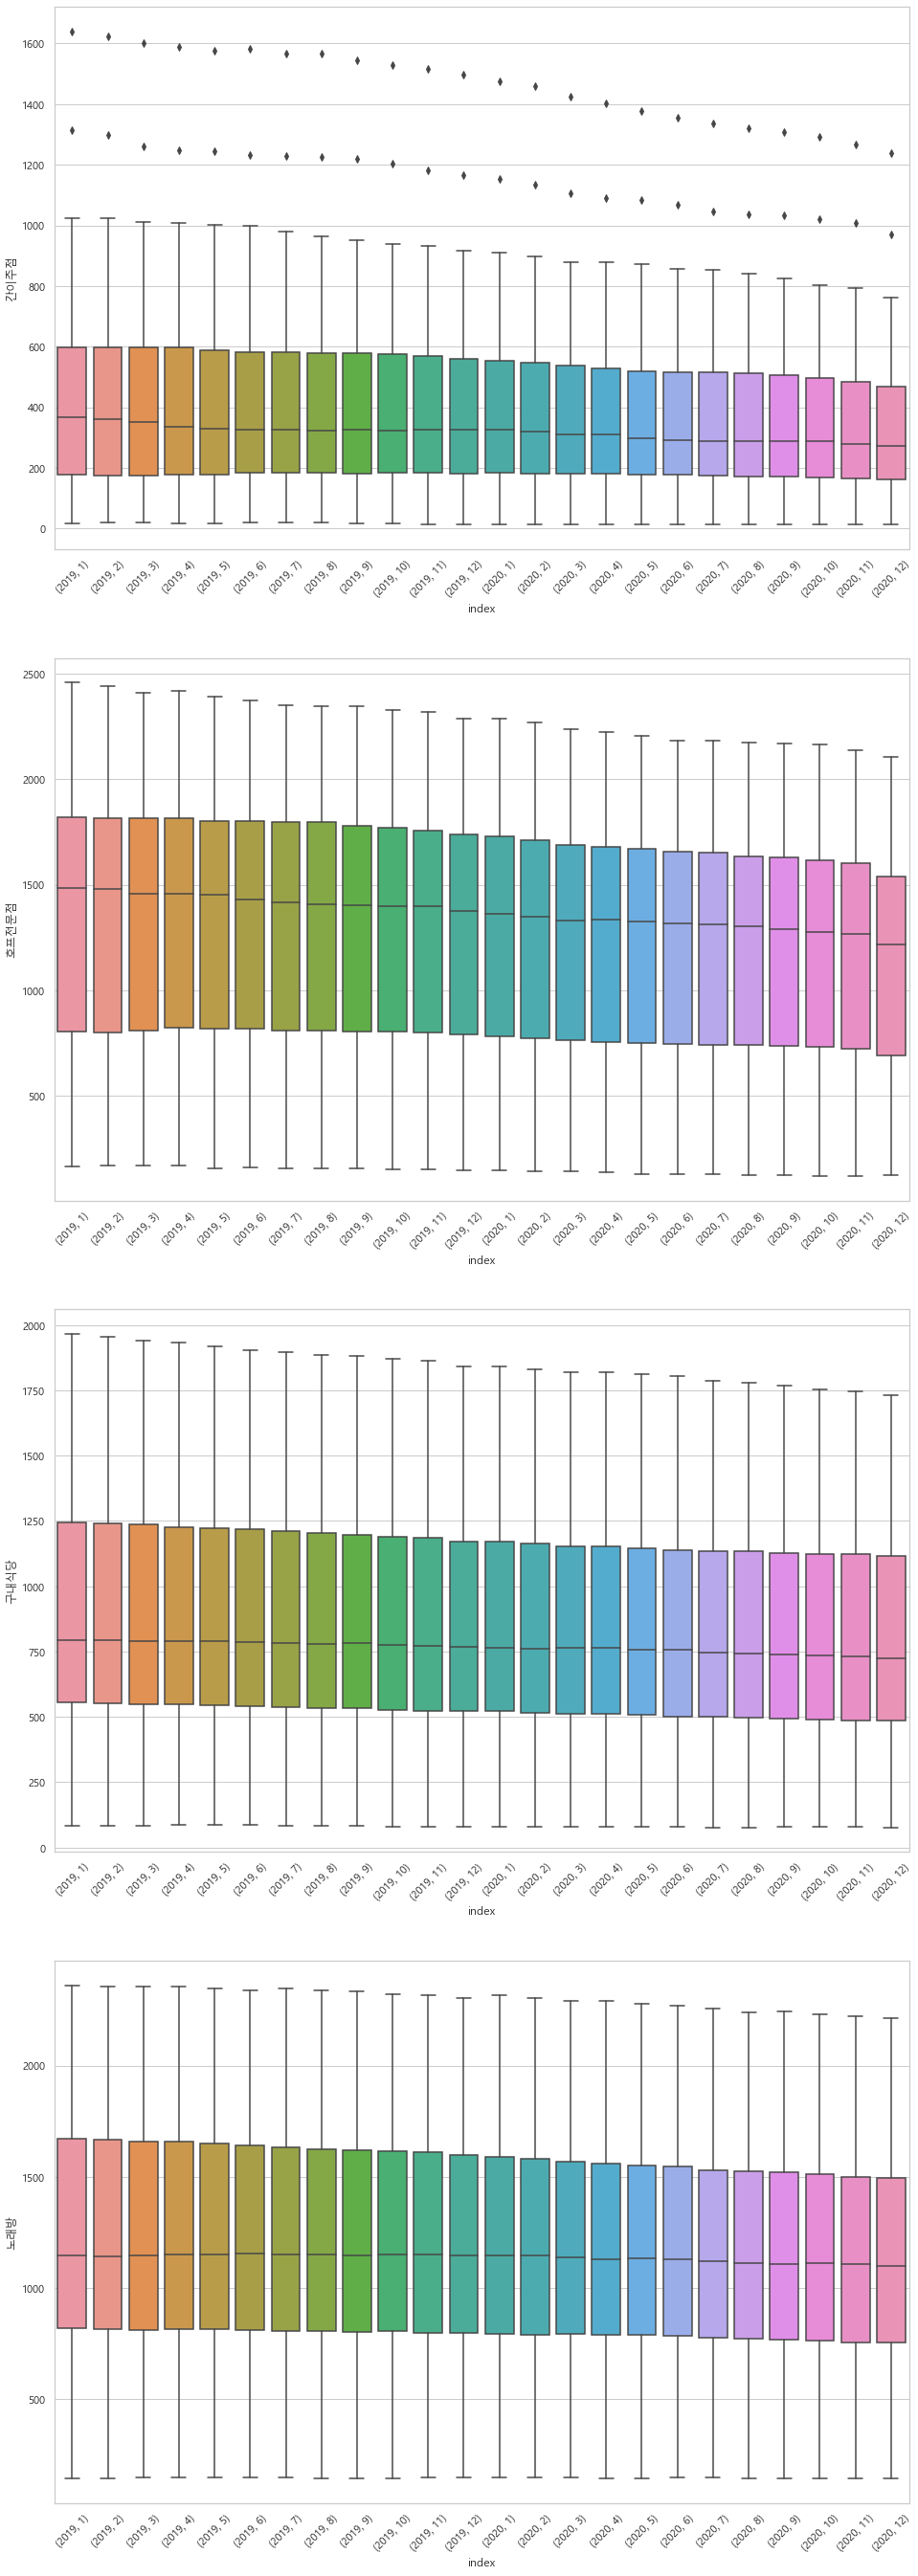

In [764]:
fig, ax = plt.subplots(4,1,figsize=(16,48))
serious_reduced = ['간이주점', '호프전문점', '구내식당', '노래방',  '기타음식점']

for j in range(len(serious_reduced)):
    g=sns.boxplot(data=dd, x='index', y=serious_reduced[j], ax= ax[j])
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [683]:
data.loc[idx[[2019,2020],idx[1:12],idx[:'충청북도']]]

TypeError: unsupported operand type(s) for -: 'slice' and 'tuple'

In [682]:
data.loc[idx[[2019,2020],idx[1:12],idx[:'충청북도']]]

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  \
year month city                                                            
2019 1     강원도        82677   300     93      465      444   439     505   
           경기도       520472  1873    372     3694     1810  2997    3113   
           경상남도      152758   564    151      790      727  1314     685   
           경상북도      125481   461    163      489      693   409     641   
           광주광역시      67965   214     41      393      339   188     443   
...                     ...   ...    ...      ...      ...   ...     ...   
2020 12    전라남도       89239   277    119      524      570   244     490   
           전라북도       88047   411    111      573      530   272     511   
           제주특별자치도    47390   191     34      194      250   156     197   
           충청남도      106102   299    130      705      532   544     479   
           충청북도       80408   275     74      495      412   391     383   

                    감정평가사  건강보조식품가게  건어물가게  ...   편의점  피부ㆍ비뇨기과 의원  피부관리업  \
year month city                             ...                            
2019 1     강원도         29       496    667  ...  1589          58    951   
           경기도        358      2496    797  ...  9558         793   7548   
           경상남도        56       988    723  ...  2804         165   2399   
           경상북도        19       886    658  ...  1808          98   1390   
           광주광역시       32       397    167  ...  1010         126   1406   
...                   ...       ...    ...  ...   ...         ...    ...   
2020 12    전라남도        20       478    949  ...  1295          78   1574   
           전라북도        39       734    360  ...  1335          97   1405   
           제주특별자치도     16       180    110  ...  1200          44    794   
           충청남도        38      1272    635  ...  2383          99   1487   
           충청북도        32       435    108  ...  1615          81   1256   

                     피시방  한방병원ㆍ한의원  한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month city                                                       
2019 1     강원도       420       357  19271   205   1485   1070    588  
           경기도      2413      3155  77957  1680   7127   7771   3901  
           경상남도      678       807  31752   386   1539   2434   1292  
           경상북도      593       635  29086   343   1068   1871   1086  
           광주광역시     426       416   9558   216   2406   1118    588  
...                  ...       ...    ...   ...    ...    ...    ...  
2020 12    전라남도      377       398  18001   192   2106   1059    586  
           전라북도      391       541  14620   244   1124   1474    722  
           제주특별자치도   168       199   9068   136    605    664    244  
           충청남도      452       517  20013   292   1391   1356    886  
           충청북도      359       406  15764   276   1533    985    551  

[408 rows x 101 columns]

[Text(0, 0, '(2020, 1)'),
 Text(0, 0, '(2020, 2)'),
 Text(0, 0, '(2020, 3)'),
 Text(0, 0, '(2020, 4)'),
 Text(0, 0, '(2020, 5)'),
 Text(0, 0, '(2020, 6)'),
 Text(0, 0, '(2020, 7)'),
 Text(0, 0, '(2020, 8)'),
 Text(0, 0, '(2020, 9)'),
 Text(0, 0, '(2020, 10)'),
 Text(0, 0, '(2020, 11)'),
 Text(0, 0, '(2020, 12)')]

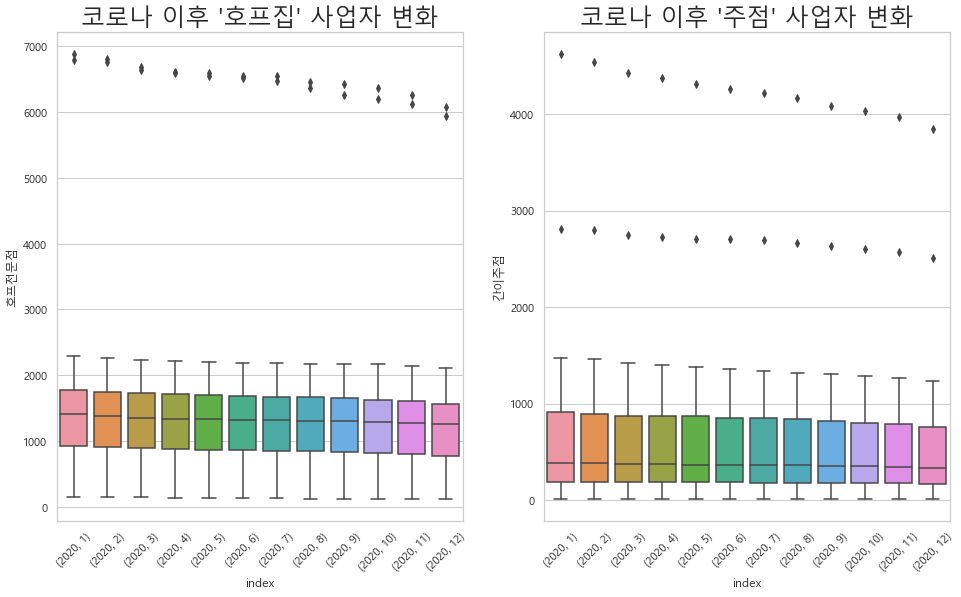

In [646]:
fig, ax=plt.subplots(1,2, figsize=(16,9))
g =sns.boxplot(data=df_total, x='index', y='호프전문점', ax= ax[0])
g.set_title('코로나 이후 \'호프집\' 사업자 변화', fontsize=24)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g= sns.boxplot(data=df_total, x='index', y='간이주점', ax= ax[1])
g.set_title('코로나 이후 \'주점\' 사업자 변화', fontsize=24)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

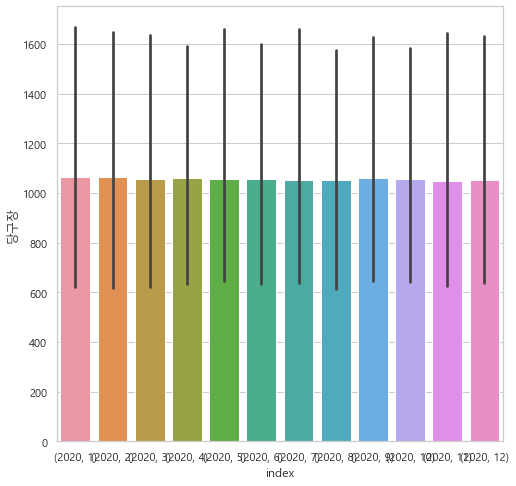

In [608]:
sns.barplot(data=df_total, x='index', y='당구장')

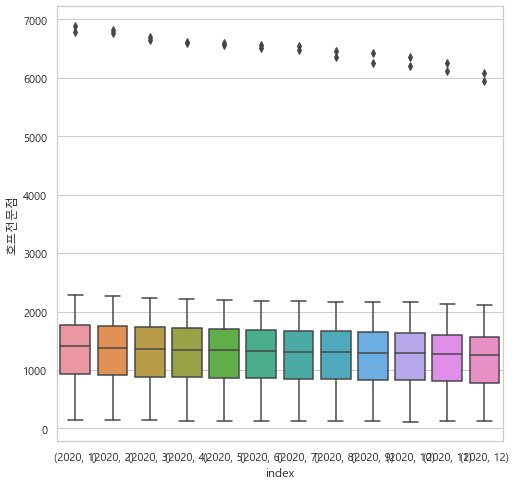

In [581]:
sns.boxplot(data=df_total, x='index', y='호프전문점')

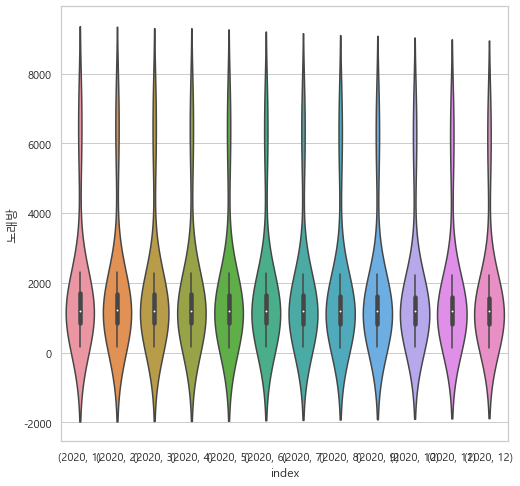

In [579]:
sns.violinplot(data=df_total, x='index', y='노래방')

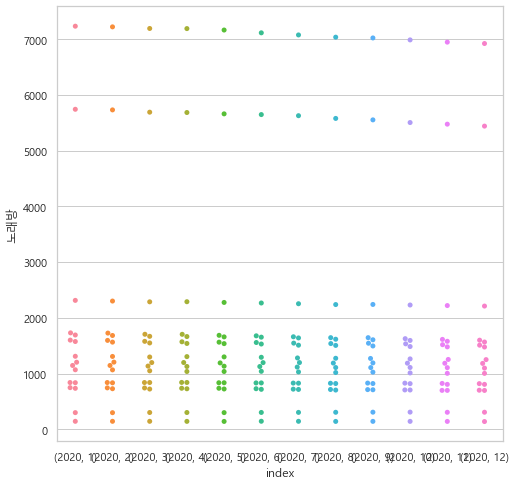

In [578]:
sns.swarmplot(data=df_total, x='index', y='노래방')

In [575]:
df_total = df.loc[idx[[2020], idx[1:12],],:].droplevel(2)


In [670]:
data.loc[idx[2020,idx[1:12],idx[:'충청북도']]].

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  \
year month city                                                            
2020 1     강원도        85671   300     94      541      462   425     514   
           경기도       558878  1934    367     4578     1942  2808    3188   
           경상남도      157493   536    158      910      737  1153     696   
           경상북도      129486   472    163      561      695   384     662   
           광주광역시      70997   214     38      459      348   191     434   
...                     ...   ...    ...      ...      ...   ...     ...   
     12    전라남도       89239   277    119      524      570   244     490   
           전라북도       88047   411    111      573      530   272     511   
           제주특별자치도    47390   191     34      194      250   156     197   
           충청남도      106102   299    130      705      532   544     479   
           충청북도       80408   275     74      495      412   391     383   

                    감정평가사  건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업  \
year month city                             ...                             
2020 1     강원도         33       504    654  ...   1708          58   1118   
           경기도        379      2681    812  ...  10451         829   8999   
           경상남도        63      1003    706  ...   2901         174   2825   
           경상북도        21       899    654  ...   1962         102   1616   
           광주광역시       36       399    176  ...   1051         124   1621   
...                   ...       ...    ...  ...    ...         ...    ...   
     12    전라남도        20       478    949  ...   1295          78   1574   
           전라북도        39       734    360  ...   1335          97   1405   
           제주특별자치도     16       180    110  ...   1200          44    794   
           충청남도        38      1272    635  ...   2383          99   1487   
           충청북도        32       435    108  ...   1615          81   1256   

                     피시방  한방병원ㆍ한의원  한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month city                                                       
2020 1     강원도       426       366  19586   229   1361   1093    627  
           경기도      2341      3229  80175  1873   6790   7857   4071  
           경상남도      654       817  32396   430   1406   2394   1315  
           경상북도      573       640  29353   357   1026   1861   1063  
           광주광역시     400       412   9968   234   2265   1174    575  
...                  ...       ...    ...   ...    ...    ...    ...  
     12    전라남도      377       398  18001   192   2106   1059    586  
           전라북도      391       541  14620   244   1124   1474    722  
           제주특별자치도   168       199   9068   136    605    664    244  
           충청남도      452       517  20013   292   1391   1356    886  
           충청북도      359       406  15764   276   1533    985    551  

[204 rows x 101 columns]

In [668]:
df_total

가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  감정평가사  건강보조식품가게  \
year month                                                                 
2020 1       300     94      541      462   425     514     33       504   
     1      1934    367     4578     1942  2808    3188    379      2681   
     1       536    158      910      737  1153     696     63      1003   
     1       472    163      561      695   384     662     21       899   
     1       214     38      459      348   191     434     36       399   
...          ...    ...      ...      ...   ...     ...    ...       ...   
     12      277    119      524      570   244     490     20       478   
     12      411    111      573      530   272     511     39       734   
     12      191     34      194      250   156     197     16       180   
     12      299    130      705      532   544     479     38      1272   
     12      275     74      495      412   391     383     32       435   

            건어물가게   건축사  ...  피부ㆍ비뇨기과 의원  피부관리업   피시방  한방병원ㆍ한의원  한식전문점  헬스클럽  \
year month               ...                                                   
2020 1        654   337  ...          58   1118   426       366  19586   229   
     1        812  2108  ...         829   8999  2341      3229  80175  1873   
     1        706   521  ...         174   2825   654       817  32396   430   
     1        654   475  ...         102   1616   573       640  29353   357   
     1        176   239  ...         124   1621   400       412   9968   234   
...           ...   ...  ...         ...    ...   ...       ...    ...   ...   
     12       949   303  ...          78   1574   377       398  18001   192   
     12       360   378  ...          97   1405   391       541  14620   244   
     12       110   316  ...          44    794   168       199   9068   136   
     12       635   368  ...          99   1487   452       517  20013   292   
     12       108   308  ...          81   1256   359       406  15764   276   

            호프전문점  화장품가게  휴대폰가게       index  
year month                                   
2020 1       1361   1093    627   (2020, 1)  
     1       6790   7857   4071   (2020, 1)  
     1       1406   2394   1315   (2020, 1)  
     1       1026   1861   1063   (2020, 1)  
     1       2265   1174    575   (2020, 1)  
...           ...    ...    ...         ...  
     12      2106   1059    586  (2020, 12)  
     12      1124   1474    722  (2020, 12)  
     12       605    664    244  (2020, 12)  
     12      1391   1356    886  (2020, 12)  
     12      1533    985    551  (2020, 12)  

[204 rows x 101 columns]

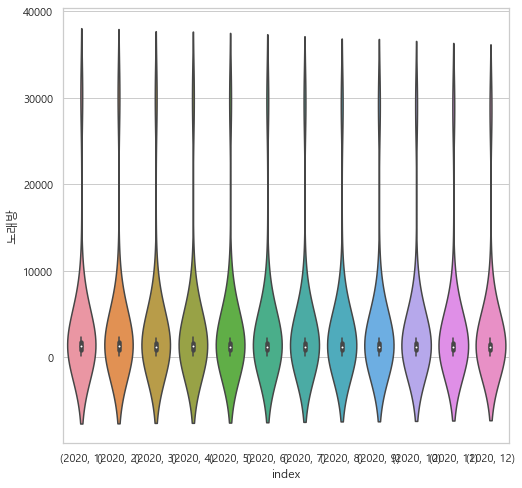

In [552]:
sns.violinplot(data=df_total, x='index', y='노래방')

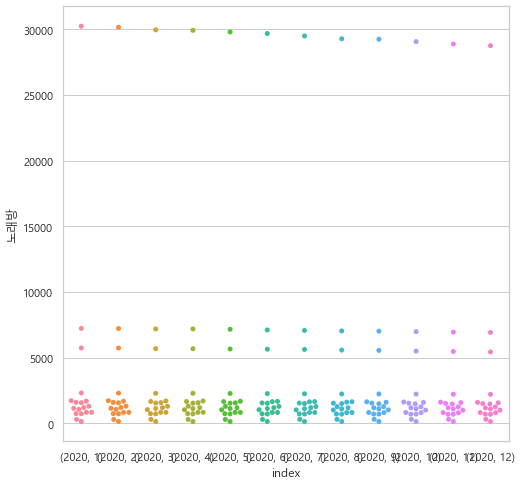

In [554]:
sns.swarmplot(data=df_total, x='index', y='노래방')

### 6. 코로나 이후 증가한 업종
* 코로나 발생은 2020년 초로 설정, 따라서 코로나 이후 증가/감소한 업종은 2020년 동향으로 해석 가능함


In [647]:
df_total

가구점  가스충전소  가전제품수리점  가전제품판매점  간이주점  간판광고물업  감정평가사  건강보조식품가게  \
year month                                                                 
2020 1       300     94      541      462   425     514     33       504   
     1      1934    367     4578     1942  2808    3188    379      2681   
     1       536    158      910      737  1153     696     63      1003   
     1       472    163      561      695   384     662     21       899   
     1       214     38      459      348   191     434     36       399   
...          ...    ...      ...      ...   ...     ...    ...       ...   
     12      277    119      524      570   244     490     20       478   
     12      411    111      573      530   272     511     39       734   
     12      191     34      194      250   156     197     16       180   
     12      299    130      705      532   544     479     38      1272   
     12      275     74      495      412   391     383     32       435   

            건어물가게   건축사  ...  피부ㆍ비뇨기과 의원  피부관리업   피시방  한방병원ㆍ한의원  한식전문점  헬스클럽  \
year month               ...                                                   
2020 1        654   337  ...          58   1118   426       366  19586   229   
     1        812  2108  ...         829   8999  2341      3229  80175  1873   
     1        706   521  ...         174   2825   654       817  32396   430   
     1        654   475  ...         102   1616   573       640  29353   357   
     1        176   239  ...         124   1621   400       412   9968   234   
...           ...   ...  ...         ...    ...   ...       ...    ...   ...   
     12       949   303  ...          78   1574   377       398  18001   192   
     12       360   378  ...          97   1405   391       541  14620   244   
     12       110   316  ...          44    794   168       199   9068   136   
     12       635   368  ...          99   1487   452       517  20013   292   
     12       108   308  ...          81   1256   359       406  15764   276   

            호프전문점  화장품가게  휴대폰가게       index  
year month                                   
2020 1       1361   1093    627   (2020, 1)  
     1       6790   7857   4071   (2020, 1)  
     1       1406   2394   1315   (2020, 1)  
     1       1026   1861   1063   (2020, 1)  
     1       2265   1174    575   (2020, 1)  
...           ...    ...    ...         ...  
     12      2106   1059    586  (2020, 12)  
     12      1124   1474    722  (2020, 12)  
     12       605    664    244  (2020, 12)  
     12      1391   1356    886  (2020, 12)  
     12      1533    985    551  (2020, 12)  

[204 rows x 101 columns]

In [766]:
#20top columns
#cols = df_total.columns[:-1]
#reduced = []
increased = []
print("[ 코로나 전, 후 증가한 업종 (1000개 이상)]")
for col in cols:
    if (df_total.loc[idx[2020,12]][col].sum() - df_total.loc[idx[2020,1]][col].sum()) > 100 : #increased
        print(col,df_total.loc[idx[2020,12]][col].sum() - df_total.loc[idx[2020,1]][col].sum(),'개')
        increased.append(col)
print(len(increased))
#평균적으로 사업자 수는 꾸준히 늘고 있어 1000개 이상 업종만 선별함

[ 코로나 전, 후 증가한 업종 (1000개 이상)]
가구점 165 개
가전제품수리점 1286 개
가전제품판매점 164 개
건강보조식품가게 493 개
건어물가게 205 개
건축사 581 개
공부방 5138 개
과일가게 494 개
교습학원 277 개
기술및직업훈련학원 1632 개
기타외국식전문점 1393 개
꽃가게 600 개
동물병원 149 개
미용실 2596 개
법무사 135 개
변호사 326 개
부동산중개업 6064 개
분식점 175 개
사진촬영업 824 개
생선가게 805 개
서점 167 개
세무사 441 개
세탁소 916 개
스포츠교육기관 1137 개
스포츠시설운영업 792 개
스포츠용품점 186 개
실내스크린골프점 414 개
실내장식가게 5311 개
애완용품점 543 개
약국 484 개
이발소 423 개
일반외과 의원 136 개
일식전문점 466 개
자동차수리점 987 개
정육점 546 개
제과점 929 개
주유소 230 개
주차장운영업 442 개
중식전문점 362 개
채소가게 964 개
치과병원ㆍ의원 232 개
커피음료점 8955 개
컴퓨터판매점 183 개
통신판매업 81398 개
패스트푸드점 3742 개
펜션ㆍ게스트하우스 2306 개
편의점 2880 개
피부ㆍ비뇨기과 의원 132 개
피부관리업 3856 개
한방병원ㆍ한의원 113 개
한식전문점 10398 개
헬스클럽 751 개
휴대폰가게 544 개
53


IndexError: list index out of range

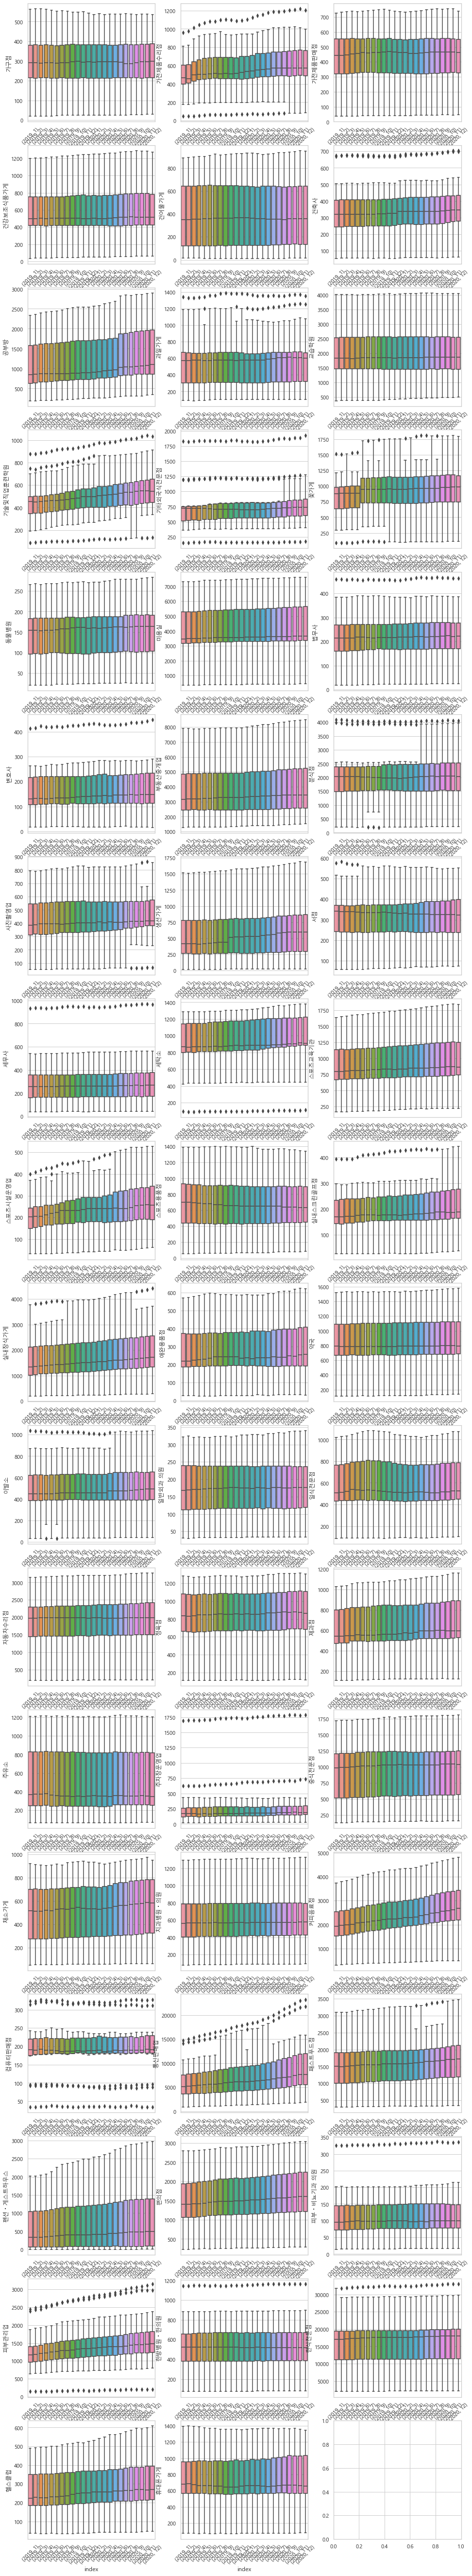

In [769]:
P=18
Q=3
fig, ax = plt.subplots(P,Q,figsize=(16,96))
for i in range(P):
    for j in range(Q):
        g=sns.boxplot(data=dd, x='index', y=increased[i*Q+j], ax= ax[i][j])
        g.set_xticklabels(g.get_xticklabels(), rotation=45)
#헬스 클럽, 편의점, 패스트푸드점, 기타외국식전문점

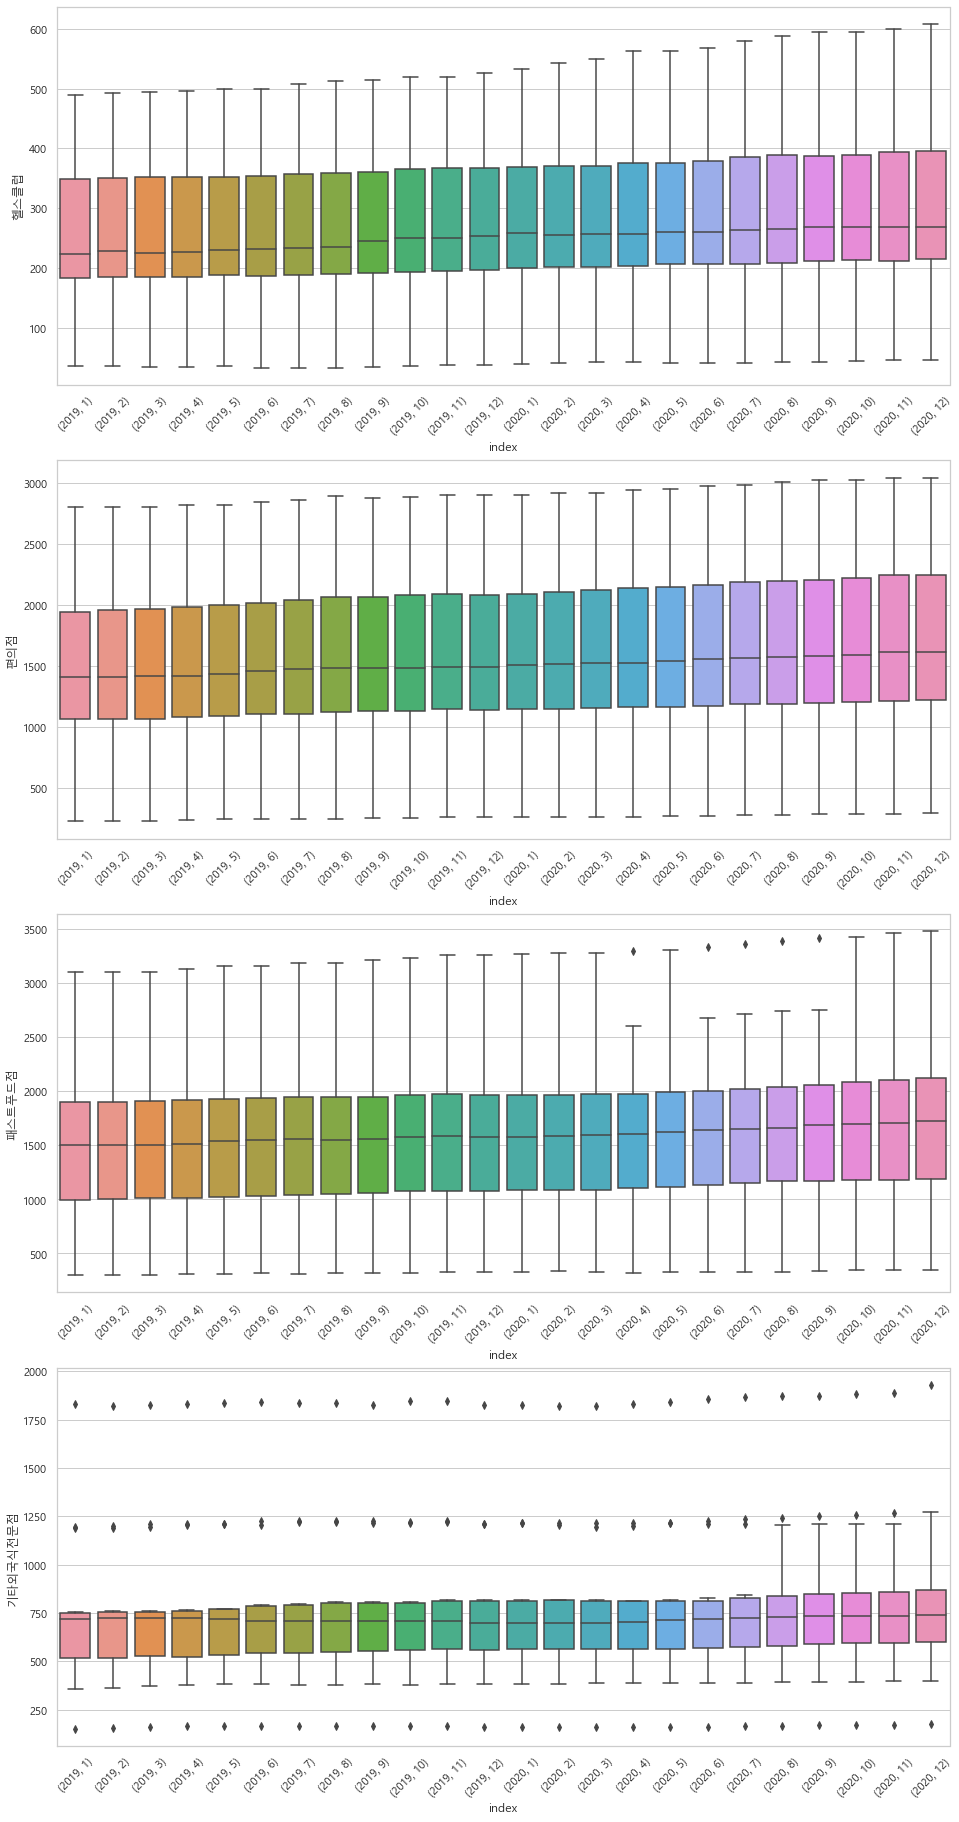

In [771]:
#헬스 클럽, 편의점, 패스트푸드점, 기타외국식전문점
serious_increase = ['헬스클럽', '편의점', '패스트푸드점', '기타외국식전문점']
fig, ax = plt.subplots(4,1, figsize=(16,32))
for j in range(len(serious_increase)):
    g=sns.boxplot(data=dd, x='index', y=serious_increase[j], ax= ax[j])
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

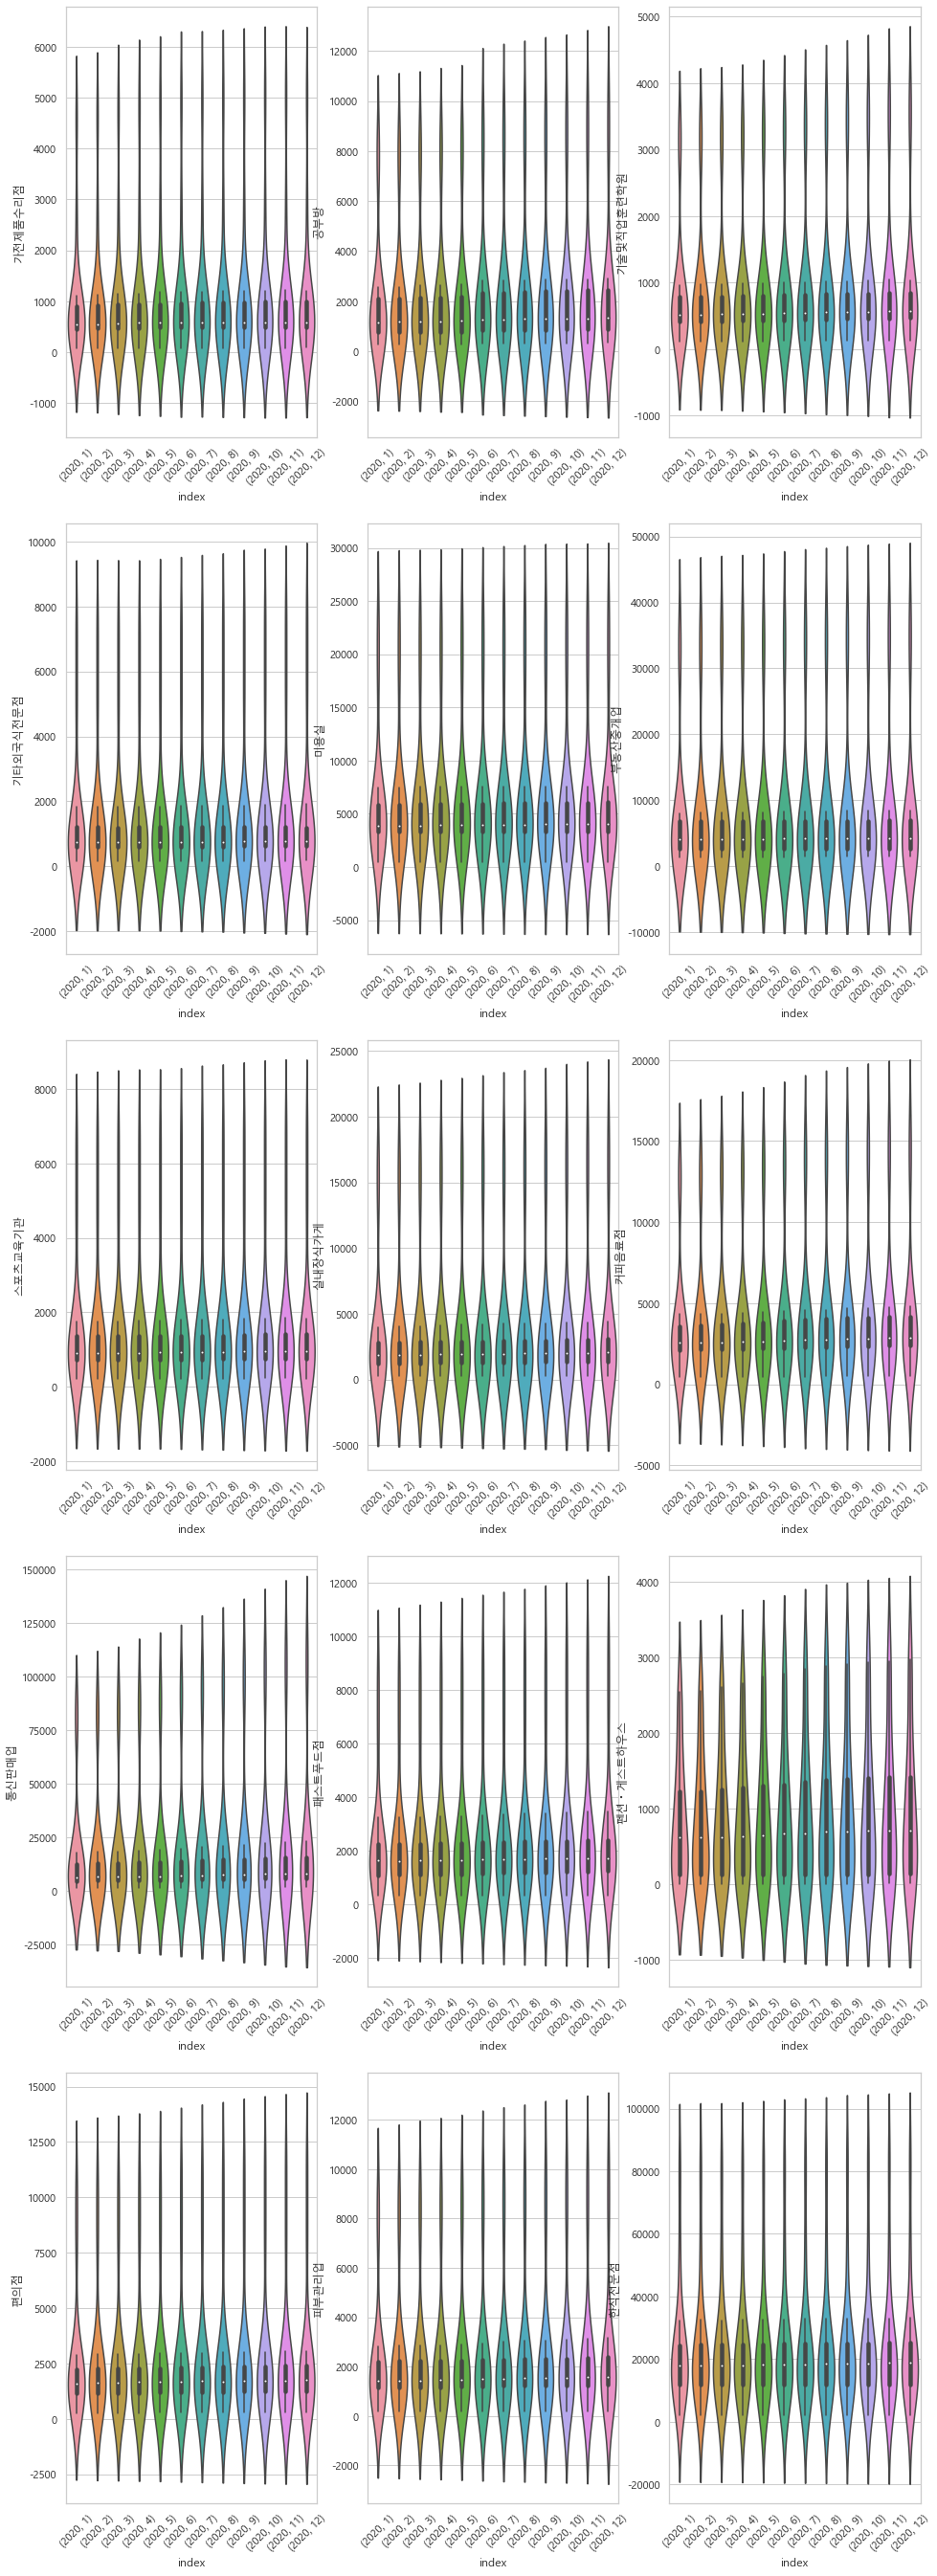

In [659]:
fig, ax = plt.subplots(P,Q,figsize=(16,48))
for i in range(P):
    for j in range(Q):
        g=sns.violinplot(data=df_total, x='index', y=increased[i*Q+j], ax= ax[i][j])
        g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [663]:
sortcol = tp20col[-4:]

[Text(0, 0, '(2020, 1)'),
 Text(0, 0, '(2020, 2)'),
 Text(0, 0, '(2020, 3)'),
 Text(0, 0, '(2020, 4)'),
 Text(0, 0, '(2020, 5)'),
 Text(0, 0, '(2020, 6)'),
 Text(0, 0, '(2020, 7)'),
 Text(0, 0, '(2020, 8)'),
 Text(0, 0, '(2020, 9)'),
 Text(0, 0, '(2020, 10)'),
 Text(0, 0, '(2020, 11)'),
 Text(0, 0, '(2020, 12)')]

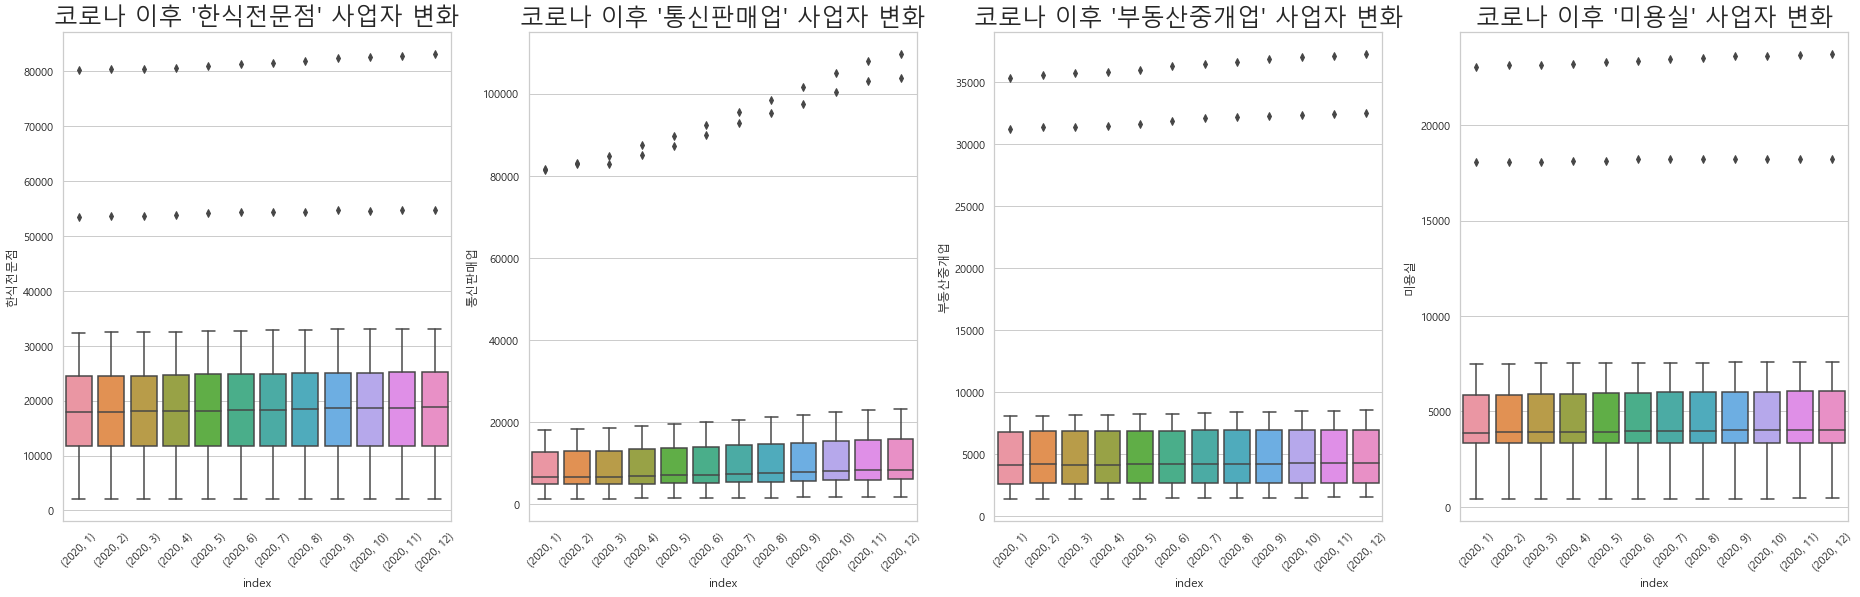

In [667]:
i = -1
fig, ax=plt.subplots(1,4, figsize=(32,9))
g =sns.boxplot(data=df_total, x='index', y=sortcol[i], ax= ax[0])
g.set_title('코로나 이후 \'{0}\' 사업자 변화'.format(sortcol[i]), fontsize=24)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
i-=1
g= sns.boxplot(data=df_total, x='index', y=sortcol[i], ax= ax[1])
g.set_title('코로나 이후 \'{0}\' 사업자 변화'.format(sortcol[i]), fontsize=24)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
i-=1
g =sns.boxplot(data=df_total, x='index', y=sortcol[i], ax= ax[2])
g.set_title('코로나 이후 \'{0}\' 사업자 변화'.format(sortcol[i]), fontsize=24)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
i-=1
g =sns.boxplot(data=df_total, x='index', y=sortcol[i], ax= ax[3])
g.set_title('코로나 이후 \'{0}\' 사업자 변화'.format(sortcol[i]), fontsize=24)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [403]:
(df_total.index.values)

array([(2019, 1), (2019, 2), (2019, 3), (2019, 4), (2019, 5), (2019, 6),
       (2019, 7), (2019, 8), (2019, 9), (2019, 10), (2019, 11),
       (2019, 12), (2020, 1), (2020, 2), (2020, 3), (2020, 4), (2020, 5),
       (2020, 6), (2020, 7), (2020, 8), (2020, 9), (2020, 10), (2020, 11),
       (2020, 12)], dtype=object)

In [395]:
df_total.index.values

array([(2019, 1), (2019, 2), (2019, 3), (2019, 4), (2019, 5), (2019, 6),
       (2019, 7), (2019, 8), (2019, 9), (2019, 10), (2019, 11),
       (2019, 12), (2020, 1), (2020, 2), (2020, 3), (2020, 4), (2020, 5),
       (2020, 6), (2020, 7), (2020, 8), (2020, 9), (2020, 10), (2020, 11),
       (2020, 12)], dtype=object)

In [385]:
list(map(lambda x: df_total.index.tolist()[x],range(0,len(df_total.index.tolist())) ))

[(2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6),
 (2019, 7),
 (2019, 8),
 (2019, 9),
 (2019, 10),
 (2019, 11),
 (2019, 12),
 (2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2020, 5),
 (2020, 6),
 (2020, 7),
 (2020, 8),
 (2020, 9),
 (2020, 10),
 (2020, 11),
 (2020, 12)]

In [356]:
?ax.set_xticks

In [371]:
df.loc[idx[[2019,2020],:,'합계'],].droplevel(level=2)['total'].index.values.tolist()

[(2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6),
 (2019, 7),
 (2019, 8),
 (2019, 9),
 (2019, 10),
 (2019, 11),
 (2019, 12),
 (2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2020, 5),
 (2020, 6),
 (2020, 7),
 (2020, 8),
 (2020, 9),
 (2020, 10),
 (2020, 11),
 (2020, 12)]

In [194]:
df0[0].reindex(index=df0_sort.index, level=0).unstack().sort_values(by='통신판매업')

한식전문점  통신판매업    미용실    옷가게  식료품가게  부동산중개업  커피음료점  패스트푸드점  자동차수리점  \
city                                                                        
세종특별자치시   2073   1280    408    368    231    1348    412     326     194   
제주특별자치도   8736   2053   1361   1674    824    1940   1217     632     593   
울산광역시    10881   3362   2613   1838    766    2287   1442     997    1091   
강원도      19552   3665   3567   3180   2840    2597   2191    1880    1790   
전라남도     17596   4835   3514   3048   3632    2207   2204    1517    2000   
전라북도     14172   5280   3878   3460   3392    3166   2516    1642    1980   
광주광역시     9918   6177   3247   3208   1454    4076   1642    1097    1500   
대전광역시    11661   6475   3325   2790   1378    3294   2242    1055    1427   
경상북도     29306   8561   5856   4654   3497    4100   4286    2261    3035   
경상남도     32367   9997   6996   5708   3913    6809   3952    3262    3195   
대구광역시    19544  12755   5435   5325   1634    5709   2880    1508    2250   
부산광역시    24418  16798   7464   7084   3050    7935   3524    2531    2353   
인천광역시    17846  17852   5439   4069   2099    6737   3005    1752    2330   
경기도      79896  80153  22962  17493   8890   34976  13097    8515   11121   
서울특별시    53355  80314  18000  15932   5452   30919  12165    6354    4946   

           편의점    분식점   교습학원  호프전문점  실내장식가게  화장품가게  피부관리업  슈퍼마켓   공부방  예술학원  \
city                                                                          
세종특별자치시    264    203    421    148     235    151    166   137   248   261   
제주특별자치도   1140    797    703    644    1217    685    719   415   549   439   
울산광역시      924    757   1664    342    1017    974    834   866   715   799   
강원도       1694   1627   1454   1375    1118   1103   1094  1017   894   887   
전라남도      1163   1474   1815   2289    1191   1047   1412  1203   664   861   
전라북도      1225   1973   2409   1346     261   1484   1227   992   755  1318   
광주광역시     1049   1563   2415   2286    1993   1175   1609   856   743  1105   
대전광역시     1148   1968   1269    940    1878   1250   1199   677  1327   905   
경상북도      1956   2475   2597   1029    1844   1855   1609  1841  1749  1371   
경상남도      2897   3931   4023   1416    2768   2408   2786  1922  2062  2216   
대구광역시     1591   2450   2639    575    2590   2121   1639  1679  2541  1394   
부산광역시     2465   4024   3525   1791    3976   2441   2729  1871  2487  1819   
인천광역시     2215   2561   2497   1738    3282   1430   2161  1826  1650  1499   
경기도      10407  12694  14882   6833   16869   7828   8901  7880  8296  8531   
서울특별시     7953  10898  10292   6917   13781   6631   7324  3912  7226  5465   

          노래방  
city           
세종특별자치시   145  
제주특별자치도   299  
울산광역시     755  
강원도       847  
전라남도      738  
전라북도      838  
광주광역시    1065  
대전광역시    1310  
경상북도     1587  
경상남도     1607  
대구광역시    1706  
부산광역시    1739  
인천광역시    2305  
경기도      7238  
서울특별시    5758

In [195]:
df1 = df0[0].reindex(index=df0_sort.index, level=0).unstack()

In [196]:
df1.columns.names = ['corp']

In [197]:
df1.loc[idx['경기도']].values

array([79896, 80153, 22962, 17493,  8890, 34976, 13097,  8515, 11121,
       10407, 12694, 14882,  6833, 16869,  7828,  8901,  7880,  8296,
        8531,  7238], dtype=int64)

<BarContainer object of 20 artists>

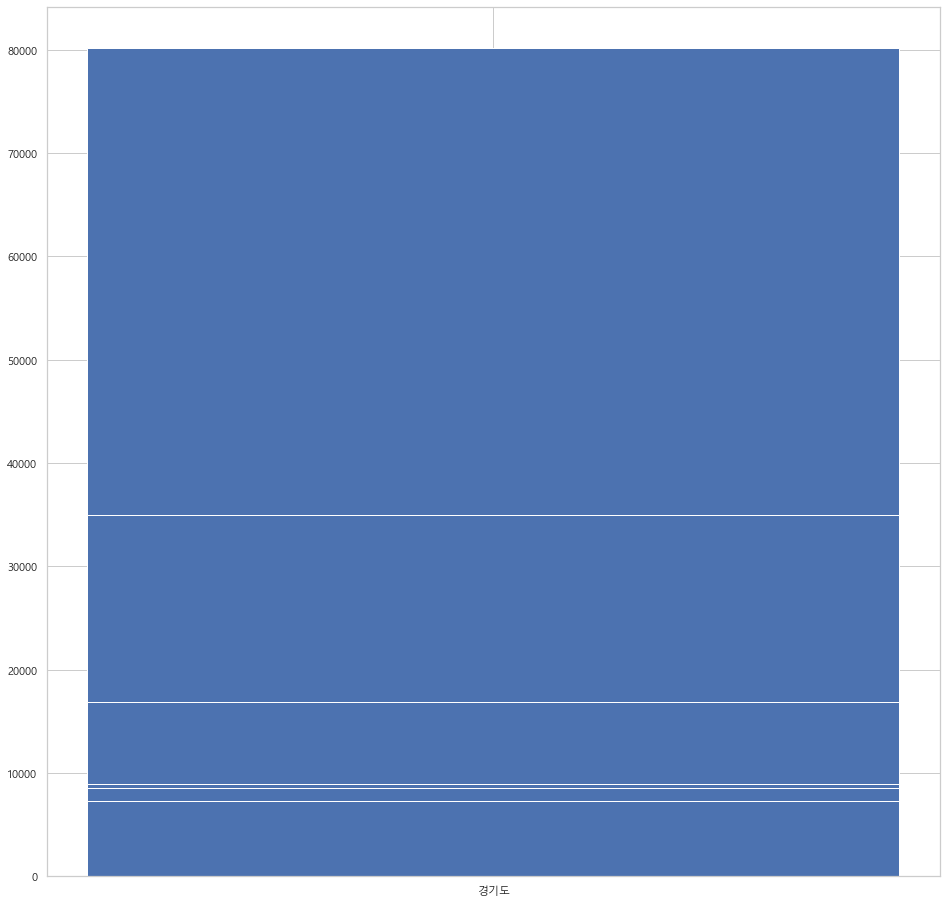

In [198]:
fig = plt.figure(figsize=(16,16))
plt.bar('경기도',df1.loc[idx['경기도']].values, )

In [199]:
?arr

Object `arr` not found.


In [ ]:
for i in range(df)
    df0.sort_values(by=0)

In [ ]:
for i in range(len(cols)):
    df_19.loc[idx[cols[0],tp20col],:].sort_values(by=2019,ascending=False).unstack()

In [ ]:
df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).unstack().plot.bar(stacked=True, legend = 'reverse')

In [ ]:
    df = df_19.loc[idx['강원도',tp20col],:].sort_values(by=2019,ascending=False).unstack()
    df.columns = df.columns.droplevel()
    df.plot.bar(stacked=True, legend = 'reverse')

In [ ]:
plt.bar(cols[0],vals[0])

In [ ]:
vals.flatten()[:k-2]

In [ ]:
for k in range(1,len(cols)):
    plt.bar('강원도',vals.flatten()[k], stacked=True)

In [ ]:
for i in range(len(loc))
    df_19.loc[idx[len(i),tp20col],:].sort_values(by=2019,ascending=False)

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
plt.bar(df_19.loc['강원도'])

In [ ]:
plt.

In [ ]:
ax = bx
bx +=10
df_19[idx[2019,12,]:][df_19.columns[1:]].sort_values(by=)

In [ ]:
df_19[idx[2019, ]]

In [ ]:
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']*17

In [ ]:
colors

In [ ]:
#PIE

In [ ]:
#Bar

-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------

-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
------------------------------------------------------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------